## i (a)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = np.genfromtxt("./boston.csv", dtype=np.float32, delimiter=",", names=True)

In [5]:
x1 = np.array([i[0] for i in data])
x2 = np.array([i[1] for i in data])
x3 = np.array([i[2] for i in data])
x4 = np.array([i[3] for i in data])
x5 = np.array([i[4] for i in data])
x6 = np.array([i[5] for i in data])
x7 = np.array([i[6] for i in data])
x8 = np.array([i[7] for i in data])
x9 = np.array([i[8] for i in data])
x10 = np.array([i[9] for i in data])
x11 = np.array([i[10] for i in data])
x12 = np.array([i[11] for i in data])
x13 = np.array([i[12] for i in data])
y = np.array([i[13] for i in data])

In [6]:
x1 = (x1 - x1.mean())/np.std(x1)

In [7]:
x2 = (x2 - x2.mean())/np.std(x2)
x3 = (x3 - x3.mean())/np.std(x3)
x4 = (x4 - x4.mean())/np.std(x4)
x5 = (x5 - x5.mean())/np.std(x5)
x6 = (x6 - x6.mean())/np.std(x6)
x7 = (x7 - x7.mean())/np.std(x7)
x8 = (x8 - x8.mean())/np.std(x8)
x9 = (x9 - x9.mean())/np.std(x9)
x10 = (x10 - x10.mean())/np.std(x10)
x11 = (x11 - x11.mean())/np.std(x11)
x12 = (x12 - x12.mean())/np.std(x12)
x13 = (x13 - x13.mean())/np.std(x13)
y = (y - y.mean())/np.std(y)

# Generate 5-fold sample indices for dataset

In [8]:
m = len(data)
np.random.seed(6754)

In [9]:
full_range = np.array([i for i in range(m)])
validation_choose_set = [i for i in range(m)]

In [10]:
validation_sample1 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample1)
validation_sample2 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample2)
validation_sample3 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample3)
validation_sample4 = np.random.choice(validation_choose_set, size=int(m/5))
validation_choose_set = np.setdiff1d(validation_choose_set, validation_sample4)

In [11]:
validation_sample5 = validation_choose_set[:]

In [12]:
X = np.column_stack((np.ones(len(x1)), x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13))

In [13]:
def test_train_split(X, y, sample):
    RANGE = len(X)
    train_sample = np.setdiff1d(np.array([i for i in range(RANGE)]), sample)
    test_sample = sample[:]
    X_train = X[train_sample]
    X_test = X[test_sample]
    y_train = y[train_sample]
    y_test = y[test_sample]
    return X_train, X_test, y_train, y_test

In [14]:
def input_func(X, y, theta, j):   
    temp = np.zeros(len(X))
    for i in range(len(theta)):
        temp += theta[i]*X[:,i]
        
    return np.matmul((temp - y), X[:,j])

In [15]:
def linear_regression(X_train, y_train, X_test, y_test, learning_rate=0.01):
    
    #init
    n = len(X_train[0])
    theta = np.array([1.5 for i in range(n)])
    number_of_iterations = 0
    train_error = []
    valid_error = []
    y_hat = np.zeros((len(y), 1))
    err = 1000000
    
    #Gradient Descent
    while True:
#         print ("=========="*10)
#         print ("Iteration: ", number_of_iterations)

        prev_theta = theta[:]

#         print ("Previous theta : ", prev_theta)
        number_of_iterations += 1

        # Updating all thetas simultaneously
        for i in range(n):
            theta[i] = theta[i] - (learning_rate/100.0)*input_func(X_train, y_train, theta, i)


#         print("New theta_0 :", theta)

        # Training Error
        y_hat = np.matmul(X_train, theta)
        new_err = np.linalg.norm(y_hat-y_train)
        train_error.append(new_err)
#         print ("Training Error: ", new_err)


        # Validation error
        y_hat_v = np.matmul(X_test, theta)
        err_valid = np.linalg.norm(y_hat_v-y_test)
        valid_error.append(err_valid)

        if (err-new_err) <= 0.000001:
            return train_error, valid_error, theta

        err = new_err

In [16]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample1)
learning_rate = 0.01
train_error1, valid_error1, theta1 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Text(0.5,1,'First Sample')

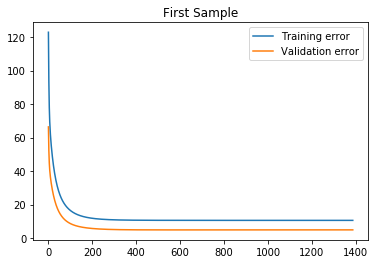

In [17]:
plt.plot([i for i in range(len(train_error1))], train_error1, label='Training error')
plt.plot([i for i in range(len(valid_error1))], valid_error1, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('First Sample')

In [18]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample2)
learning_rate = 0.01
train_error2, valid_error2, theta2 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Text(0.5,1,'Second Sample')

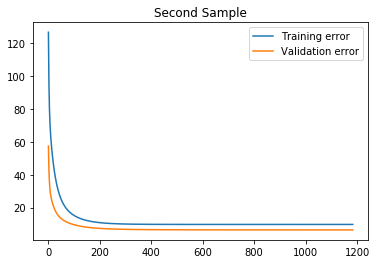

In [19]:
plt.plot([i for i in range(len(train_error2))], train_error2, label='Training error')
plt.plot([i for i in range(len(valid_error2))], valid_error2, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Second Sample')

In [20]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample3)
learning_rate = 0.01
train_error3, valid_error3, theta3 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Text(0.5,1,'Third Sample')

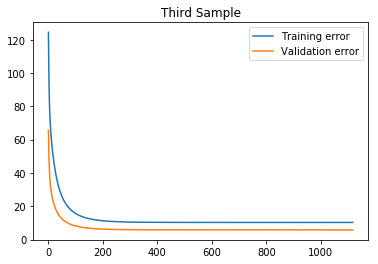

In [21]:
plt.plot([i for i in range(len(train_error3))], train_error3, label='Training error')
plt.plot([i for i in range(len(valid_error3))], valid_error3, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Third Sample')

In [22]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample4)
learning_rate = 0.01
train_error4, valid_error4, theta4 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Text(0.5,1,'Fourth Sample')

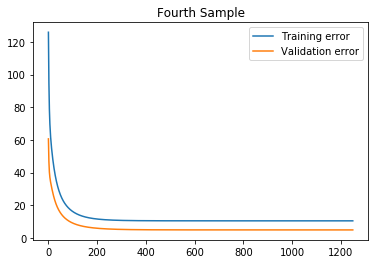

In [23]:
plt.plot([i for i in range(len(train_error4))], train_error4, label='Training error')
plt.plot([i for i in range(len(valid_error4))], valid_error4, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Fourth Sample')

In [24]:
X_train, X_test, y_train, y_test = test_train_split(X, y, validation_sample5)
learning_rate = 0.01
train_error5, valid_error5, theta5 = linear_regression(X_train, y_train, X_test, y_test, learning_rate)

Text(0.5,1,'Fifth Sample')

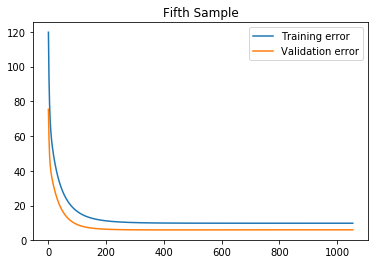

In [25]:
plt.plot([i for i in range(len(train_error5))], train_error5, label='Training error')
plt.plot([i for i in range(len(valid_error5))], valid_error5, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Fifth Sample')

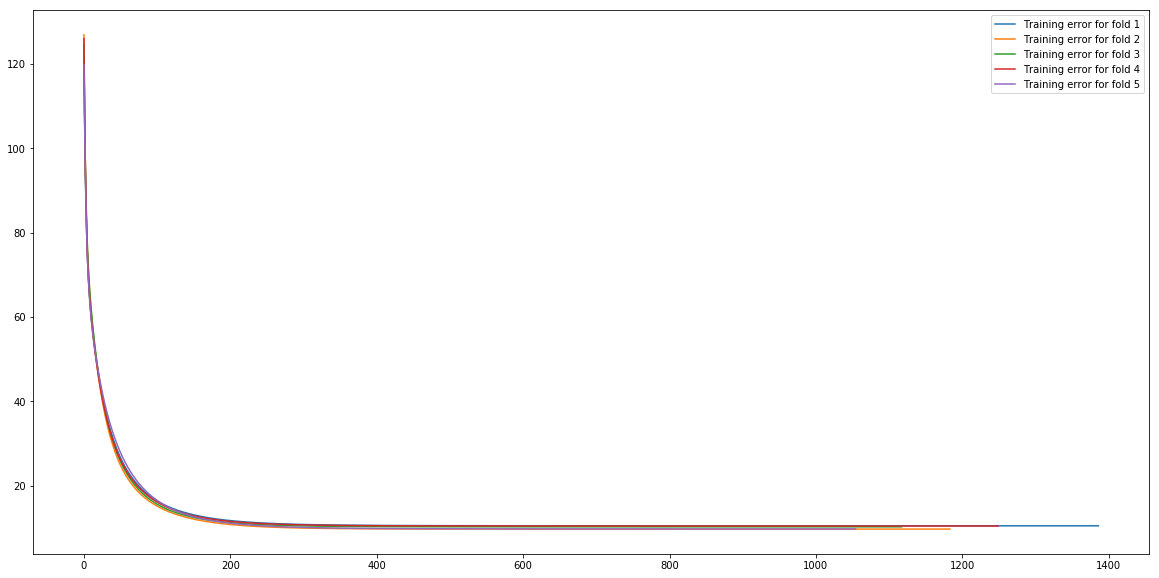

In [26]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(len(train_error1))], train_error1, label='Training error for fold 1')
plt.plot([i for i in range(len(train_error2))], train_error2, label='Training error for fold 2')
plt.plot([i for i in range(len(train_error3))], train_error3, label='Training error for fold 3')
plt.plot([i for i in range(len(train_error4))], train_error4, label='Training error for fold 4')
plt.plot([i for i in range(len(train_error5))], train_error5, label='Training error for fold 5')
plt.gca().legend(('Training error for fold 1','Training error for fold 2', 'Training error for fold 3', 'Training error for fold 4', 'Training error for fold 5'))

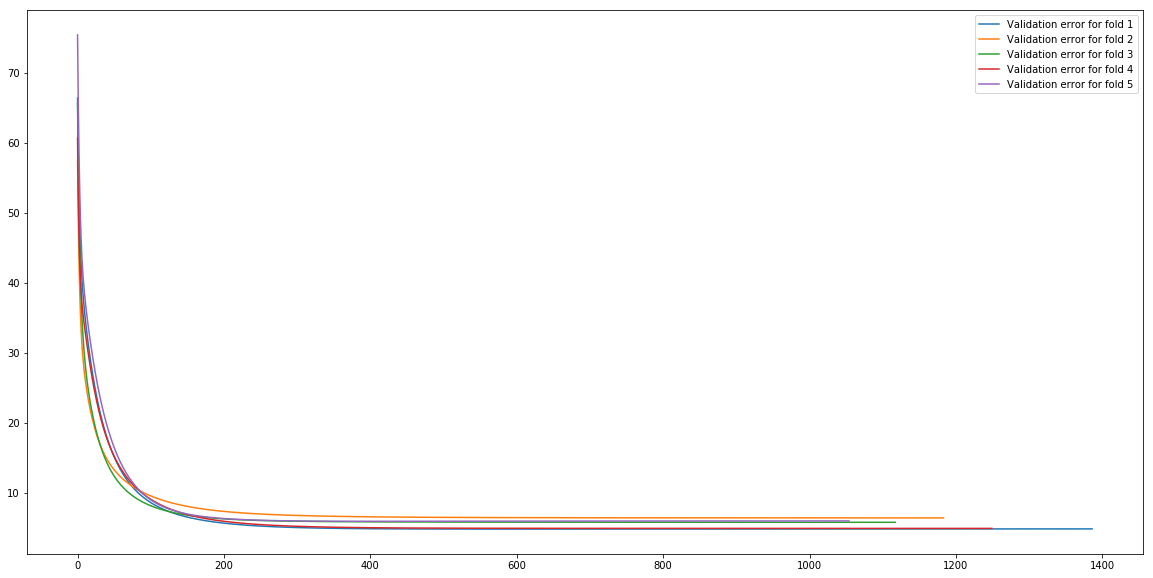

In [27]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(len(valid_error1))], valid_error1, label='Validation error for fold 1')
plt.plot([i for i in range(len(valid_error2))], valid_error2, label='Validation error for fold 2')
plt.plot([i for i in range(len(valid_error3))], valid_error3, label='Validation error for fold 3')
plt.plot([i for i in range(len(valid_error4))], valid_error4, label='Validation error for fold 4')
plt.plot([i for i in range(len(valid_error5))], valid_error5, label='Validation error for fold 5')
plt.gca().legend(('Validation error for fold 1','Validation error for fold 2', 'Validation error for fold 3', 'Validation error for fold 4', 'Validation error for fold 5'))

In [28]:
train_error1 = np.array(train_error1)
valid_error1 = np.array(valid_error1)
train_error2 = np.array(train_error2)
valid_error2 = np.array(valid_error2)
train_error3 = np.array(train_error3)
valid_error3 = np.array(valid_error3)
train_error4 = np.array(train_error4)
valid_error4 = np.array(valid_error4)
train_error5 = np.array(train_error5)
valid_error5 = np.array(valid_error5)

In [29]:
train_error1[:len(train_error5)]

array([122.94026751, 105.72319786,  93.32559661, ...,  10.54419961,
        10.54419378,  10.54418798])

In [30]:
all_error = np.column_stack((train_error1[:len(train_error5)], train_error2[:len(train_error5)], train_error3[:len(train_error5)], train_error4[:len(train_error5)], train_error5[:len(train_error5)]))
all_error

array([[122.94026751, 126.7905731 , 124.46514624, 125.92503011,
        119.7576396 ],
       [105.72319786, 108.86001182, 107.53699428, 107.94307821,
        104.88188603],
       [ 93.32559661,  96.07645233,  95.42887472,  94.94594096,
         93.5025306 ],
       ...,
       [ 10.54419961,   9.7687038 ,  10.29698482,  10.49351307,
          9.8029347 ],
       [ 10.54419378,   9.76870189,  10.29698337,  10.49351013,
          9.8029337 ],
       [ 10.54418798,   9.76869998,  10.29698194,  10.49350721,
          9.8029327 ]])

In [31]:
mean_all = np.mean(all_error, axis=1)
mean_all

array([123.97573131, 106.98903364,  94.65587904, ...,  10.1812672 ,
        10.18126457,  10.18126196])

In [32]:
std_all = np.std(all_error, axis=1)
std_all

array([2.48302679, 1.46652191, 1.07699124, ..., 0.33345225, 0.33345103,
       0.33344982])

In [33]:
K = np.array([1, 2, 3, 4, 5])
mean_train = np.array([train_error1.mean(), train_error2.mean(), train_error3.mean(), train_error4.mean(), train_error5.mean()])
std_train = np.array([train_error1.std(), train_error2.std(), train_error3.std(), train_error4.std(), train_error5.std()])

In [34]:
train_error1[0:len(train_error5)-1]

array([122.94026751, 105.72319786,  93.32559661, ...,  10.54420548,
        10.54419961,  10.54419378])

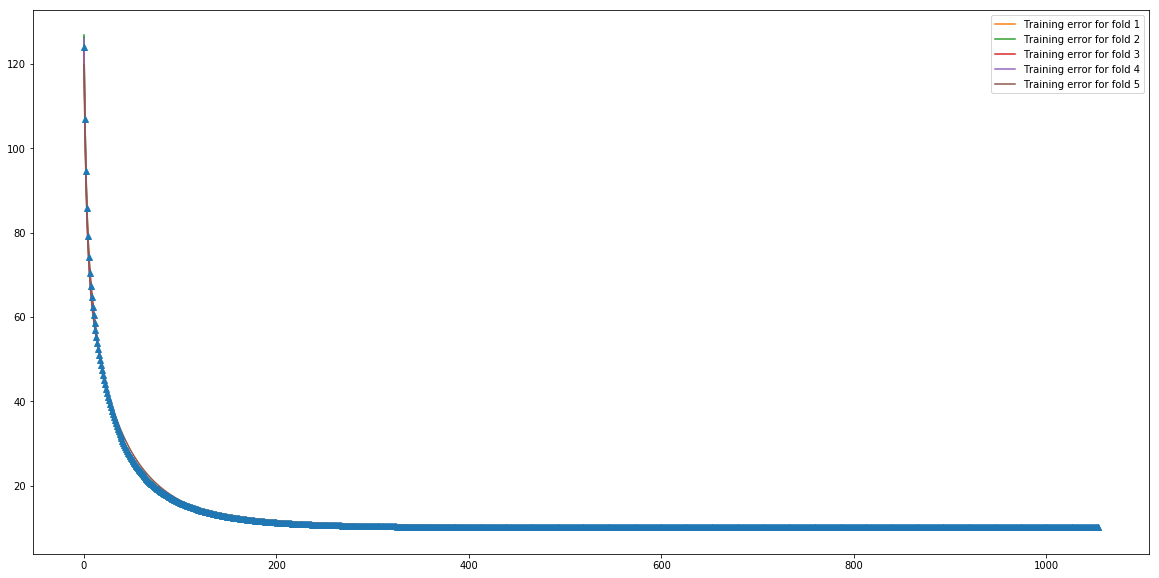

In [35]:
plt.figure(figsize=(20,10))
k = np.array([i for i in range(len(train_error5))])
plt.errorbar(k, mean_all, std_all, linestyle='None', marker='^')
plt.plot([i for i in range(len(train_error5))], train_error1[0:len(train_error5)], label='Training error for fold 1')
plt.plot([i for i in range(len(train_error5))], train_error2[0:len(train_error5)], label='Training error for fold 2')
plt.plot([i for i in range(len(train_error5))], train_error3[0:len(train_error5)], label='Training error for fold 3')
plt.plot([i for i in range(len(train_error5))], train_error4[0:len(train_error5)], label='Training error for fold 4')
plt.plot([i for i in range(len(train_error5))], train_error5[0:len(train_error5)], label='Training error for fold 5')
plt.gca().legend(('Training error for fold 1','Training error for fold 2', 'Training error for fold 3', 'Training error for fold 4', 'Training error for fold 5'))

In [36]:
print ("Training set Errors")
print("Set 1: ", train_error1[-1])
print("Set 2: ", train_error2[-1])
print("Set 3: ", train_error3[-1])
print("Set 4: ", train_error4[-1])
print("Set 5: ", train_error5[-1])

Training set Errors
Set 1:  10.543287196990073
Set 2:  9.768519875852144
Set 3:  10.296906395904898
Set 4:  10.493159718610537
Set 5:  9.802932698452418


In [41]:
print ("Validation set Errors")
print("Set 1: ", valid_error1[-1])
print("Set 2: ", valid_error2[-1])
print("Set 3: ", valid_error3[-1])
print("Set 4: ", valid_error4[-1])
print("Set 5: ", valid_error5[-1])

Validation set Errors
Set 1:  4.866811545875467
Set 2:  6.4361281136640915
Set 3:  5.808193421934928
Set 4:  4.937856078760548
Set 5:  6.005633803721842


In [38]:
print("Training Sample")
for i in K:
    print("For fold ", i, ": Error: ", mean_train[i-1], " +- ", std_train[i-1])

Training Sample
For fold  1 : Error:  12.539570722812117  +-  8.192757918495628
For fold  2 : Error:  12.050615342692192  +-  9.01252314154413
For fold  3 : Error:  12.711166563214755  +-  9.236884205767833
For fold  4 : Error:  12.660239178959982  +-  8.629419921965344
For fold  5 : Error:  12.593084233984607  +-  9.509616492600818


In [39]:
mean_valid = np.array([valid_error1.mean(), valid_error2.mean(), valid_error3.mean(), valid_error4.mean(),valid_error5.mean()])
std_valid = np.array([valid_error1.std(), valid_error2.std(), valid_error3.std(), valid_error4.std(), valid_error5.std()])

In [40]:
print("Validation Sample")
for i in K:
    print("For fold: ", i, " ", mean_valid[i-1], " +- ", std_valid[i-1])

Validation Sample
For fold:  1   6.091921896977775  +-  4.922644576608693
For fold:  2   7.5303973330175  +-  3.7470884962066378
For fold:  3   6.914391875917295  +-  4.3825340163947875
For fold:  4   6.312757020518233  +-  4.802564956627723
For fold:  5   7.561540588564827  +-  5.988886875996788


## ii   Validation set with lowest error is sample 1

In [76]:
test_set = validation_sample1

In [77]:
remaining_sample = np.setdiff1d(np.array([i for i in range(len(X))]), test_set)

In [44]:
validation_sample = np.random.choice(remaining_sample, size=int(len(remaining_sample)/5))

In [45]:
def test_train_split2(X, y, sample, remaining_sample):
    RANGE = len(X)
    train_sample = np.setdiff1d(remaining_sample, sample)
    test_sample = sample[:]
    X_train = X[train_sample]
    X_test = X[test_sample]
    y_train = y[train_sample]
    y_test = y[test_sample]
    return X_train, X_test, y_train, y_test

In [46]:
X_train, X_test, y_train, y_test = test_train_split2(X, y, validation_sample, remaining_sample)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
from sklearn.model_selection import learning_curve

In [48]:
model_reg = linear_model.Ridge(normalize=True, tol=0.000001)

In [49]:
parameters = {'alpha': np.array([(i/100.0) for i in range(1, 2001)])}

In [50]:
train_gridcv  = GridSearchCV(model_reg, parameters, cv=5, verbose=10, scoring=make_scorer(mean_squared_error))

In [51]:
train_gridcv.fit(X[remaining_sample], y[remaining_sample])

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=0.15603644111043952, total=   0.3s
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=0.28973915819515184, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............. alpha=0.01, score=0.4260293568697937, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............. alpha=0.01, score=1.0764563910333864, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=0.49366807234472093, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] ............. alpha=0.02, score=0.1500480194996975, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] ......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] ............ alpha=0.13, score=0.26494433953356283, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] .............. alpha=0.13, score=0.433876906971852, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] ............. alpha=0.13, score=0.9763725936126103, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] ............. alpha=0.13, score=0.3610765223554218, total=   0.0s
[CV] alpha=0.14 ......................................................
[CV] ............ alpha=0.14, score=0.11942378043879406, total=   0.0s
[CV] alpha=0.14 ......................................................
[CV] ............. alpha=0.14, score=0.2661454661457375, total=   0.0s
[CV] alpha=0.14 ......................................................
[CV] ............. alpha=0.14, score=0.4357642823055898, total=   0.0s
[CV] alpha=0.14 ......................................................
[CV] .

[CV] ............ alpha=0.36, score=0.30171938956363153, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ............. alpha=0.36, score=0.4856761380660863, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ............. alpha=0.36, score=0.9112310962558215, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ............ alpha=0.36, score=0.28682132346040407, total=   0.0s
[CV] alpha=0.37 ......................................................
[CV] ............ alpha=0.37, score=0.12238742288263989, total=   0.0s
[CV] alpha=0.37 ......................................................
[CV] ............. alpha=0.37, score=0.3033883964104936, total=   0.0s
[CV] alpha=0.37 ......................................................
[CV] ............ alpha=0.37, score=0.48807544562501687, total=   0.0s
[CV] alpha=0.37 ......................................................
[CV] .

[CV] ............ alpha=0.48, score=0.32136680491462816, total=   0.0s
[CV] alpha=0.48 ......................................................
[CV] ............. alpha=0.48, score=0.5144245569116822, total=   0.0s
[CV] alpha=0.48 ......................................................
[CV] ............. alpha=0.48, score=0.8977073072289551, total=   0.0s
[CV] alpha=0.48 ......................................................
[CV] ............. alpha=0.48, score=0.2688981235103156, total=   0.0s
[CV] alpha=0.49 ......................................................
[CV] ............ alpha=0.49, score=0.13004808864539333, total=   0.0s
[CV] alpha=0.49 ......................................................
[CV] ............. alpha=0.49, score=0.3229623528931948, total=   0.0s
[CV] alpha=0.49 ......................................................
[CV] ............. alpha=0.49, score=0.5168051656909128, total=   0.0s
[CV] alpha=0.49 ......................................................
[CV] .

[CV] ............ alpha=0.68, score=0.25175344019551277, total=   0.0s
[CV] alpha=0.69 ......................................................
[CV] ............ alpha=0.69, score=0.14370536827179753, total=   0.0s
[CV] alpha=0.69 ......................................................
[CV] ............ alpha=0.69, score=0.35338982977160804, total=   0.0s
[CV] alpha=0.69 ......................................................
[CV] ............. alpha=0.69, score=0.5633828873526927, total=   0.0s
[CV] alpha=0.69 ......................................................
[CV] ............. alpha=0.69, score=0.8861122886054612, total=   0.0s
[CV] alpha=0.69 ......................................................
[CV] ............. alpha=0.69, score=0.2511767390830668, total=   0.0s
[CV] alpha=0.7 .......................................................
[CV] ............. alpha=0.7, score=0.14437186693742232, total=   0.0s
[CV] alpha=0.7 .......................................................
[CV] .

[CV] ............. alpha=0.92, score=0.2427091267309586, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] ............ alpha=0.93, score=0.15871950549446492, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] ............. alpha=0.93, score=0.3862383968669083, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] ............. alpha=0.93, score=0.6159791220460794, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] ............. alpha=0.93, score=0.8817954484519425, total=   0.0s
[CV] alpha=0.93 ......................................................
[CV] ............ alpha=0.93, score=0.24250863478730328, total=   0.0s
[CV] alpha=0.94 ......................................................
[CV] ............ alpha=0.94, score=0.15929605331389368, total=   0.0s
[CV] alpha=0.94 ......................................................
[CV] .

[CV] ............ alpha=1.05, score=0.16536894100713126, total=   0.0s
[CV] alpha=1.05 ......................................................
[CV] ............ alpha=1.05, score=0.40127818227768597, total=   0.0s
[CV] alpha=1.05 ......................................................
[CV] ............. alpha=1.05, score=0.6408209792793297, total=   0.0s
[CV] alpha=1.05 ......................................................
[CV] ............. alpha=1.05, score=0.8814517981124159, total=   0.0s
[CV] alpha=1.05 ......................................................
[CV] ............. alpha=1.05, score=0.2409109043510608, total=   0.0s
[CV] alpha=1.06 ......................................................
[CV] .............. alpha=1.06, score=0.165896785512146, total=   0.0s
[CV] alpha=1.06 ......................................................
[CV] ............ alpha=1.06, score=0.40249271331595426, total=   0.0s
[CV] alpha=1.06 ......................................................
[CV] .

[CV] ............. alpha=1.27, score=0.6839078919240583, total=   0.0s
[CV] alpha=1.27 ......................................................
[CV] ............. alpha=1.27, score=0.8825573083260054, total=   0.0s
[CV] alpha=1.27 ......................................................
[CV] ............ alpha=1.27, score=0.24100909078765292, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] ............ alpha=1.28, score=0.17653924838088775, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] ............. alpha=1.28, score=0.4278106512854292, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] ............. alpha=1.28, score=0.6857934971947763, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] ............. alpha=1.28, score=0.8826456585798998, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] .

[CV] ............. alpha=1.39, score=0.2422674311560443, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] ............. alpha=1.4, score=0.18161979541265377, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] .............. alpha=1.4, score=0.4405737303017044, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] .............. alpha=1.4, score=0.7079475527242719, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] .............. alpha=1.4, score=0.8838932393058266, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] .............. alpha=1.4, score=0.2424026983255514, total=   0.0s
[CV] alpha=1.41 ......................................................
[CV] ............. alpha=1.41, score=0.1820220786298931, total=   0.0s
[CV] alpha=1.41 ......................................................
[CV] .

[CV] ............. alpha=1.52, score=0.4526708046288776, total=   0.0s
[CV] alpha=1.52 ......................................................
[CV] ............. alpha=1.52, score=0.7292577037803695, total=   0.0s
[CV] alpha=1.52 ......................................................
[CV] ............. alpha=1.52, score=0.8854209989512642, total=   0.0s
[CV] alpha=1.52 ......................................................
[CV] .............. alpha=1.52, score=0.244339101073365, total=   0.0s
[CV] alpha=1.53 ......................................................
[CV] .............. alpha=1.53, score=0.186613539096995, total=   0.0s
[CV] alpha=1.53 ......................................................
[CV] ............ alpha=1.53, score=0.45365048968806765, total=   0.0s
[CV] alpha=1.53 ......................................................
[CV] ............. alpha=1.53, score=0.7309968099813468, total=   0.0s
[CV] alpha=1.53 ......................................................
[CV] .

[CV] ............. alpha=1.74, score=0.2491198650956373, total=   0.0s
[CV] alpha=1.75 ......................................................
[CV] ............ alpha=1.75, score=0.19400956557588409, total=   0.0s
[CV] alpha=1.75 ......................................................
[CV] ............. alpha=1.75, score=0.4741810210626029, total=   0.0s
[CV] alpha=1.75 ......................................................
[CV] ............. alpha=1.75, score=0.7679001593776386, total=   0.0s
[CV] alpha=1.75 ......................................................
[CV] ............. alpha=1.75, score=0.8888813294114445, total=   0.0s
[CV] alpha=1.75 ......................................................
[CV] ............. alpha=1.75, score=0.2493680642825722, total=   0.0s
[CV] alpha=1.76 ......................................................
[CV] ............. alpha=1.76, score=0.1943175156196707, total=   0.0s
[CV] alpha=1.76 ......................................................
[CV] .

[CV] .............. alpha=1.87, score=0.484616232559575, total=   0.0s
[CV] alpha=1.87 ......................................................
[CV] ............. alpha=1.87, score=0.7869921990976676, total=   0.0s
[CV] alpha=1.87 ......................................................
[CV] ............. alpha=1.87, score=0.8908755928650427, total=   0.0s
[CV] alpha=1.87 ......................................................
[CV] ............ alpha=1.87, score=0.25251849291647394, total=   0.0s
[CV] alpha=1.88 ......................................................
[CV] ............ alpha=1.88, score=0.19784112590635886, total=   0.0s
[CV] alpha=1.88 ......................................................
[CV] ............ alpha=1.88, score=0.48546333162933547, total=   0.0s
[CV] alpha=1.88 ......................................................
[CV] ............. alpha=1.88, score=0.7885519204206727, total=   0.0s
[CV] alpha=1.88 ......................................................
[CV] .

[CV] ............ alpha=1.99, score=0.20081230530501587, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............. alpha=1.99, score=0.4945644752176059, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............. alpha=1.99, score=0.8054028959884499, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............. alpha=1.99, score=0.8929574838606356, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............ alpha=1.99, score=0.25594668266732445, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ............. alpha=2.0, score=0.20107102446280326, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] .............. alpha=2.0, score=0.4953726694365936, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] .

[CV] ............ alpha=2.11, score=0.20380026637519152, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............. alpha=2.11, score=0.5040618099501601, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............. alpha=2.11, score=0.8231694079239767, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............. alpha=2.11, score=0.8951046184071244, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............. alpha=2.11, score=0.2596035751127902, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ............ alpha=2.12, score=0.20403818974753352, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ............. alpha=2.12, score=0.5048339493878662, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] .

[CV] ............ alpha=2.23, score=0.20655090854675873, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] ............. alpha=2.23, score=0.5131409616552418, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] ............. alpha=2.23, score=0.8403266842538916, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] ............. alpha=2.23, score=0.8972999582676048, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] .............. alpha=2.23, score=0.263448914353759, total=   0.0s
[CV] alpha=2.24 ......................................................
[CV] ............ alpha=2.24, score=0.20677021320482436, total=   0.0s
[CV] alpha=2.24 ......................................................
[CV] ............. alpha=2.24, score=0.5138796327737748, total=   0.0s
[CV] alpha=2.24 ......................................................
[CV] .

[CV] ............. alpha=2.35, score=0.2090889815121869, total=   0.0s
[CV] alpha=2.35 ......................................................
[CV] ............. alpha=2.35, score=0.5218316340607293, total=   0.0s
[CV] alpha=2.35 ......................................................
[CV] ............. alpha=2.35, score=0.8569074750618688, total=   0.0s
[CV] alpha=2.35 ......................................................
[CV] ............. alpha=2.35, score=0.8995303951165925, total=   0.0s
[CV] alpha=2.35 ......................................................
[CV] ............. alpha=2.35, score=0.2674493497681037, total=   0.0s
[CV] alpha=2.36 ......................................................
[CV] .............. alpha=2.36, score=0.209291599240665, total=   0.0s
[CV] alpha=2.36 ......................................................
[CV] ............. alpha=2.36, score=0.5225391852843585, total=   0.0s
[CV] alpha=2.36 ......................................................
[CV] .

[CV] ............ alpha=2.58, score=0.21343746915594833, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ............. alpha=2.58, score=0.5374993084517585, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ............. alpha=2.58, score=0.8871859912519893, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ............. alpha=2.58, score=0.9038681677334729, total=   0.0s
[CV] alpha=2.58 ......................................................
[CV] ............. alpha=2.58, score=0.2754523827315649, total=   0.0s
[CV] alpha=2.59 ......................................................
[CV] ............. alpha=2.59, score=0.2136127233071171, total=   0.0s
[CV] alpha=2.59 ......................................................
[CV] ............. alpha=2.59, score=0.5381530140347407, total=   0.0s
[CV] alpha=2.59 ......................................................
[CV] .

[CV] .............. alpha=2.7, score=0.9061503447642354, total=   0.0s
[CV] alpha=2.7 .......................................................
[CV] ............. alpha=2.7, score=0.27976142173216817, total=   0.0s
[CV] alpha=2.71 ......................................................
[CV] ............ alpha=2.71, score=0.21563508971599288, total=   0.0s
[CV] alpha=2.71 ......................................................
[CV] ............. alpha=2.71, score=0.5458305885364896, total=   0.0s
[CV] alpha=2.71 ......................................................
[CV] ............. alpha=2.71, score=0.9034870463231186, total=   0.0s
[CV] alpha=2.71 ......................................................
[CV] ............. alpha=2.71, score=0.9063408561390095, total=   0.0s
[CV] alpha=2.71 ......................................................
[CV] ............ alpha=2.71, score=0.28012380806931386, total=   0.0s
[CV] alpha=2.72 ......................................................
[CV] .

[CV] .............. alpha=2.82, score=0.908438433300114, total=   0.0s
[CV] alpha=2.82 ......................................................
[CV] ............ alpha=2.82, score=0.28413874033440395, total=   0.0s
[CV] alpha=2.83 ......................................................
[CV] ............ alpha=2.83, score=0.21751882516597387, total=   0.0s
[CV] alpha=2.83 ......................................................
[CV] .............. alpha=2.83, score=0.553213894744068, total=   0.0s
[CV] alpha=2.83 ......................................................
[CV] ............. alpha=2.83, score=0.9180483060147698, total=   0.0s
[CV] alpha=2.83 ......................................................
[CV] ............. alpha=2.83, score=0.9086292380914576, total=   0.0s
[CV] alpha=2.83 ......................................................
[CV] ............ alpha=2.83, score=0.28450612263762926, total=   0.0s
[CV] alpha=2.84 ......................................................
[CV] .

[CV] ............ alpha=2.95, score=0.21927750036668994, total=   0.0s
[CV] alpha=2.95 ......................................................
[CV] ............. alpha=2.95, score=0.5603215283836549, total=   0.0s
[CV] alpha=2.95 ......................................................
[CV] ............. alpha=2.95, score=0.9321670098655671, total=   0.0s
[CV] alpha=2.95 ......................................................
[CV] ............. alpha=2.95, score=0.9109190783833987, total=   0.0s
[CV] alpha=2.95 ......................................................
[CV] ............ alpha=2.95, score=0.28894089880834634, total=   0.0s
[CV] alpha=2.96 ......................................................
[CV] ............... alpha=2.96, score=0.21941879952011, total=   0.0s
[CV] alpha=2.96 ......................................................
[CV] .............. alpha=2.96, score=0.560901931461188, total=   0.0s
[CV] alpha=2.96 ......................................................
[CV] .

[CV] ............. alpha=3.07, score=0.5671704984273507, total=   0.0s
[CV] alpha=3.07 ......................................................
[CV] ............. alpha=3.07, score=0.9458648059825654, total=   0.0s
[CV] alpha=3.07 ......................................................
[CV] ............. alpha=3.07, score=0.9132070700699053, total=   0.0s
[CV] alpha=3.07 ......................................................
[CV] ............. alpha=3.07, score=0.2934156579102803, total=   0.0s
[CV] alpha=3.08 ......................................................
[CV] ............. alpha=3.08, score=0.2210555551911003, total=   0.0s
[CV] alpha=3.08 ......................................................
[CV] ............. alpha=3.08, score=0.5677300682162381, total=   0.0s
[CV] alpha=3.08 ......................................................
[CV] ............. alpha=3.08, score=0.9469879331360008, total=   0.0s
[CV] alpha=3.08 ......................................................
[CV] .

[CV] ............. alpha=3.19, score=0.5737763885916324, total=   0.0s
[CV] alpha=3.19 ......................................................
[CV] .............. alpha=3.19, score=0.959161908604624, total=   0.0s
[CV] alpha=3.19 ......................................................
[CV] ............. alpha=3.19, score=0.9154905078688902, total=   0.0s
[CV] alpha=3.19 ......................................................
[CV] ............. alpha=3.19, score=0.2979196244533461, total=   0.0s
[CV] alpha=3.2 .......................................................
[CV] ............. alpha=3.2, score=0.22259086966557048, total=   0.0s
[CV] alpha=3.2 .......................................................
[CV] .............. alpha=3.2, score=0.5743163640233404, total=   0.0s
[CV] alpha=3.2 .......................................................
[CV] .............. alpha=3.2, score=0.9602525148053419, total=   0.0s
[CV] alpha=3.2 .......................................................
[CV] .

[CV] ............ alpha=3.32, score=0.22403420281565617, total=   0.0s
[CV] alpha=3.32 ......................................................
[CV] ............. alpha=3.32, score=0.5806750201759131, total=   0.0s
[CV] alpha=3.32 ......................................................
[CV] ............. alpha=3.32, score=0.9731368101329909, total=   0.0s
[CV] alpha=3.32 ......................................................
[CV] ............. alpha=3.32, score=0.9179565179515675, total=   0.0s
[CV] alpha=3.32 ......................................................
[CV] ............ alpha=3.32, score=0.30282108514022144, total=   0.0s
[CV] alpha=3.33 ......................................................
[CV] ............ alpha=3.33, score=0.22415059992004263, total=   0.0s
[CV] alpha=3.33 ......................................................
[CV] ............. alpha=3.33, score=0.5811950497911019, total=   0.0s
[CV] alpha=3.33 ......................................................
[CV] .

[CV] ............. alpha=3.44, score=0.5868190940598728, total=   0.0s
[CV] alpha=3.44 ......................................................
[CV] ............. alpha=3.44, score=0.9856583884262291, total=   0.0s
[CV] alpha=3.44 ......................................................
[CV] ............. alpha=3.44, score=0.9202237502793256, total=   0.0s
[CV] alpha=3.44 ......................................................
[CV] .............. alpha=3.44, score=0.307357336803422, total=   0.0s
[CV] alpha=3.45 ......................................................
[CV] ............ alpha=3.45, score=0.22550377934586915, total=   0.0s
[CV] alpha=3.45 ......................................................
[CV] ............. alpha=3.45, score=0.5873217981313017, total=   0.0s
[CV] alpha=3.45 ......................................................
[CV] ............. alpha=3.45, score=0.9866860039029262, total=   0.0s
[CV] alpha=3.45 ......................................................
[CV] .

[CV] ............. alpha=3.67, score=0.5980385531401055, total=   0.0s
[CV] alpha=3.67 ......................................................
[CV] ............. alpha=3.67, score=1.0087033942699193, total=   0.0s
[CV] alpha=3.67 ......................................................
[CV] ............. alpha=3.67, score=0.9245394310804853, total=   0.0s
[CV] alpha=3.67 ......................................................
[CV] ............. alpha=3.67, score=0.3160582324895631, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ............. alpha=3.68, score=0.2278922924145409, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ............. alpha=3.68, score=0.5985106670613163, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] ............. alpha=3.68, score=1.0096781543702604, total=   0.0s
[CV] alpha=3.68 ......................................................
[CV] .

[CV] ............. alpha=3.79, score=0.2289499214563101, total=   0.0s
[CV] alpha=3.79 ......................................................
[CV] .............. alpha=3.79, score=0.603622126824564, total=   0.0s
[CV] alpha=3.79 ......................................................
[CV] ............. alpha=3.79, score=1.0202572924484354, total=   0.0s
[CV] alpha=3.79 ......................................................
[CV] ............. alpha=3.79, score=0.9267732692757306, total=   0.0s
[CV] alpha=3.79 ......................................................
[CV] ............ alpha=3.79, score=0.32059026266312374, total=   0.0s
[CV] alpha=3.8 .......................................................
[CV] ............. alpha=3.8, score=0.22904358351080795, total=   0.0s
[CV] alpha=3.8 .......................................................
[CV] .............. alpha=3.8, score=0.6040795123404055, total=   0.0s
[CV] alpha=3.8 .......................................................
[CV] .

[CV] ............. alpha=4.03, score=0.6142806700247351, total=   0.0s
[CV] alpha=4.03 ......................................................
[CV] ............. alpha=4.03, score=1.0424661752086999, total=   0.0s
[CV] alpha=4.03 ......................................................
[CV] ............. alpha=4.03, score=0.9311997532388454, total=   0.0s
[CV] alpha=4.03 ......................................................
[CV] ............ alpha=4.03, score=0.32961563819172107, total=   0.0s
[CV] alpha=4.04 ......................................................
[CV] ............. alpha=4.04, score=0.2311776068948065, total=   0.0s
[CV] alpha=4.04 ......................................................
[CV] ............. alpha=4.04, score=0.6147108335033589, total=   0.0s
[CV] alpha=4.04 ......................................................
[CV] ............. alpha=4.04, score=1.0433666611529877, total=   0.0s
[CV] alpha=4.04 ......................................................
[CV] .

[CV] ............. alpha=4.15, score=0.9333909581866285, total=   0.0s
[CV] alpha=4.15 ......................................................
[CV] ............ alpha=4.15, score=0.33410128301930053, total=   0.0s
[CV] alpha=4.16 ......................................................
[CV] ............ alpha=4.16, score=0.23216958515628422, total=   0.0s
[CV] alpha=4.16 ......................................................
[CV] ............. alpha=4.16, score=0.6197902714829714, total=   0.0s
[CV] alpha=4.16 ......................................................
[CV] ............. alpha=4.16, score=1.0540238187362525, total=   0.0s
[CV] alpha=4.16 ......................................................
[CV] ............. alpha=4.16, score=0.9335728672297213, total=   0.0s
[CV] alpha=4.16 ......................................................
[CV] ............. alpha=4.16, score=0.3344741175010095, total=   0.0s
[CV] alpha=4.17 ......................................................
[CV] .

[CV] ............. alpha=4.39, score=0.3430027347989338, total=   0.0s
[CV] alpha=4.4 .......................................................
[CV] .............. alpha=4.4, score=0.2340232483579623, total=   0.0s
[CV] alpha=4.4 .......................................................
[CV] .............. alpha=4.4, score=0.6295147184865473, total=   0.0s
[CV] alpha=4.4 .......................................................
[CV] .............. alpha=4.4, score=1.0745486261407673, total=   0.0s
[CV] alpha=4.4 .......................................................
[CV] .............. alpha=4.4, score=0.9379057175425585, total=   0.0s
[CV] alpha=4.4 .......................................................
[CV] ............. alpha=4.4, score=0.34337137196328876, total=   0.0s
[CV] alpha=4.41 ......................................................
[CV] ............ alpha=4.41, score=0.23409702334105584, total=   0.0s
[CV] alpha=4.41 ......................................................
[CV] .

[CV] .............. alpha=4.52, score=0.940047762546123, total=   0.0s
[CV] alpha=4.52 ......................................................
[CV] ............ alpha=4.52, score=0.34777965846670733, total=   0.0s
[CV] alpha=4.53 ......................................................
[CV] ............. alpha=4.53, score=0.2349624650537467, total=   0.0s
[CV] alpha=4.53 ......................................................
[CV] ............. alpha=4.53, score=0.6345557838218172, total=   0.0s
[CV] alpha=4.53 ......................................................
[CV] ............. alpha=4.53, score=1.0852502439853622, total=   0.0s
[CV] alpha=4.53 ......................................................
[CV] ............. alpha=4.53, score=0.9402255156681494, total=   0.0s
[CV] alpha=4.53 ......................................................
[CV] ............. alpha=4.53, score=0.3481456997023759, total=   0.0s
[CV] alpha=4.54 ......................................................
[CV] .

[CV] ............. alpha=4.64, score=0.3521582084991442, total=   0.0s
[CV] alpha=4.65 ......................................................
[CV] .............. alpha=4.65, score=0.235793203053325, total=   0.0s
[CV] alpha=4.65 ......................................................
[CV] ............. alpha=4.65, score=0.6390767634998681, total=   0.0s
[CV] alpha=4.65 ......................................................
[CV] .............. alpha=4.65, score=1.094882863078844, total=   0.0s
[CV] alpha=4.65 ......................................................
[CV] .............. alpha=4.65, score=0.942349430474046, total=   0.0s
[CV] alpha=4.65 ......................................................
[CV] ............ alpha=4.65, score=0.35252168770076436, total=   0.0s
[CV] alpha=4.66 ......................................................
[CV] ............ alpha=4.66, score=0.23586094848680156, total=   0.0s
[CV] alpha=4.66 ......................................................
[CV] .

[CV] ............. alpha=4.77, score=0.9444563181119484, total=   0.0s
[CV] alpha=4.77 ......................................................
[CV] ............. alpha=4.77, score=0.3568660193133547, total=   0.0s
[CV] alpha=4.78 ......................................................
[CV] ............ alpha=4.78, score=0.23665703273701127, total=   0.0s
[CV] alpha=4.78 ......................................................
[CV] ............. alpha=4.78, score=0.6438379738634215, total=   0.0s
[CV] alpha=4.78 ......................................................
[CV] .............. alpha=4.78, score=1.105062587385603, total=   0.0s
[CV] alpha=4.78 ......................................................
[CV] ............. alpha=4.78, score=0.9446311159216274, total=   0.0s
[CV] alpha=4.78 ......................................................
[CV] ............ alpha=4.78, score=0.35722656870971414, total=   0.0s
[CV] alpha=4.79 ......................................................
[CV] .

[CV] ............. alpha=4.9, score=0.23742358595216553, total=   0.0s
[CV] alpha=4.9 .......................................................
[CV] .............. alpha=4.9, score=0.6481126445972232, total=   0.0s
[CV] alpha=4.9 .......................................................
[CV] ............... alpha=4.9, score=1.114232360908872, total=   0.0s
[CV] alpha=4.9 .......................................................
[CV] .............. alpha=4.9, score=0.9467192973392987, total=   0.0s
[CV] alpha=4.9 .......................................................
[CV] .............. alpha=4.9, score=0.3615348953612842, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] ............. alpha=4.91, score=0.2374862008177438, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] ............. alpha=4.91, score=0.6484638200235242, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] .

[CV] .............. alpha=5.02, score=1.123192543069169, total=   0.0s
[CV] alpha=5.02 ......................................................
[CV] .............. alpha=5.02, score=0.948790015273958, total=   0.0s
[CV] alpha=5.02 ......................................................
[CV] ............ alpha=5.02, score=0.36580863470558705, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] ............ alpha=5.03, score=0.23822316730060647, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] ............. alpha=5.03, score=0.6526191756474645, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] ............. alpha=5.03, score=1.1239300047612975, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] ............. alpha=5.03, score=0.9489617818410339, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] .

[CV] ............. alpha=5.15, score=0.6566692656544527, total=   0.0s
[CV] alpha=5.15 ......................................................
[CV] ................. alpha=5.15, score=1.132671675568, total=   0.0s
[CV] alpha=5.15 ......................................................
[CV] ............. alpha=5.15, score=0.9510134114756824, total=   0.0s
[CV] alpha=5.15 ......................................................
[CV] ............. alpha=5.15, score=0.3703982116042103, total=   0.0s
[CV] alpha=5.16 ......................................................
[CV] ............ alpha=5.16, score=0.23899305743632152, total=   0.0s
[CV] alpha=5.16 ......................................................
[CV] ............. alpha=5.16, score=0.6570021610438436, total=   0.0s
[CV] alpha=5.16 ......................................................
[CV] ............. alpha=5.16, score=1.1333912847939793, total=   0.0s
[CV] alpha=5.16 ......................................................
[CV] .

[CV] ............ alpha=5.26, score=0.37424810218068477, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] ............ alpha=5.27, score=0.23962296722245446, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] ............. alpha=5.27, score=0.6606184779853317, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] ............. alpha=5.27, score=1.1412191210688765, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] ............. alpha=5.27, score=0.9530472988714478, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] .............. alpha=5.27, score=0.374596541464079, total=   0.0s
[CV] alpha=5.28 ......................................................
[CV] ............ alpha=5.28, score=0.23967930007304267, total=   0.0s
[CV] alpha=5.28 ......................................................
[CV] .

[CV] .............. alpha=5.38, score=1.148889480286092, total=   0.0s
[CV] alpha=5.38 ......................................................
[CV] ............. alpha=5.38, score=0.9548960338615571, total=   0.0s
[CV] alpha=5.38 ......................................................
[CV] ............. alpha=5.38, score=0.3784121067998876, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............ alpha=5.39, score=0.24028915912042859, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............. alpha=5.39, score=0.6644709417863908, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............. alpha=5.39, score=1.1495791514045568, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............. alpha=5.39, score=0.9550633559065264, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] .

[CV] .............. alpha=5.5, score=0.2408818144885673, total=   0.0s
[CV] alpha=5.5 .......................................................
[CV] .............. alpha=5.5, score=0.6679207022973479, total=   0.0s
[CV] alpha=5.5 .......................................................
[CV] .............. alpha=5.5, score=1.1570834096933502, total=   0.0s
[CV] alpha=5.5 .......................................................
[CV] ............... alpha=5.5, score=0.956895690764566, total=   0.0s
[CV] alpha=5.5 .......................................................
[CV] ............... alpha=5.5, score=0.382538043222855, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] ............. alpha=5.51, score=0.2409348755488493, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] ............. alpha=5.51, score=0.6682305469615347, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] .

[CV] .............. alpha=5.62, score=0.386625377942426, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] ............. alpha=5.63, score=0.2415614535326922, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] ............. alpha=5.63, score=0.6719009619543195, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] .............. alpha=5.63, score=1.165762555118781, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] .............. alpha=5.63, score=0.959041751046303, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] ............ alpha=5.63, score=0.38696423264587215, total=   0.0s
[CV] alpha=5.64 ......................................................
[CV] ............ alpha=5.64, score=0.24161284359829946, total=   0.0s
[CV] alpha=5.64 ......................................................
[CV] .

[CV] ............. alpha=5.85, score=0.9626255483364462, total=   0.0s
[CV] alpha=5.85 ......................................................
[CV] ............ alpha=5.85, score=0.39435006313712573, total=   0.0s
[CV] alpha=5.86 ......................................................
[CV] ............. alpha=5.86, score=0.2427132796362945, total=   0.0s
[CV] alpha=5.86 ......................................................
[CV] ............. alpha=5.86, score=0.6786991034435098, total=   0.0s
[CV] alpha=5.86 ......................................................
[CV] ............. alpha=5.86, score=1.1806368119113906, total=   0.0s
[CV] alpha=5.86 ......................................................
[CV] ............. alpha=5.86, score=0.9627870147144004, total=   0.0s
[CV] alpha=5.86 ......................................................
[CV] ............. alpha=5.86, score=0.3946826323321515, total=   0.0s
[CV] alpha=5.87 ......................................................
[CV] .

[CV] ............. alpha=6.06, score=0.4012761183605954, total=   0.0s
[CV] alpha=6.07 ......................................................
[CV] ............ alpha=6.07, score=0.24371387191196825, total=   0.0s
[CV] alpha=6.07 ......................................................
[CV] ............. alpha=6.07, score=0.6846500410550806, total=   0.0s
[CV] alpha=6.07 ......................................................
[CV] .............. alpha=6.07, score=1.193708311081968, total=   0.0s
[CV] alpha=6.07 ......................................................
[CV] ............. alpha=6.07, score=0.9661490565611436, total=   0.0s
[CV] alpha=6.07 ......................................................
[CV] ............ alpha=6.07, score=0.40160289136285265, total=   0.0s
[CV] alpha=6.08 ......................................................
[CV] ............. alpha=6.08, score=0.2437603946491886, total=   0.0s
[CV] alpha=6.08 ......................................................
[CV] .

[CV] ............. alpha=6.29, score=1.2069110916505055, total=   0.0s
[CV] alpha=6.29 ......................................................
[CV] ............. alpha=6.29, score=0.9696124888749912, total=   0.0s
[CV] alpha=6.29 ......................................................
[CV] ............ alpha=6.29, score=0.40872181512476385, total=   0.0s
[CV] alpha=6.3 .......................................................
[CV] ............. alpha=6.3, score=0.24475986117212578, total=   0.0s
[CV] alpha=6.3 .......................................................
[CV] .............. alpha=6.3, score=0.6909061767716377, total=   0.0s
[CV] alpha=6.3 .......................................................
[CV] .............. alpha=6.3, score=1.2074997367902334, total=   0.0s
[CV] alpha=6.3 .......................................................
[CV] .............. alpha=6.3, score=0.9697684955146557, total=   0.0s
[CV] alpha=6.3 .......................................................
[CV] .

[CV] ............. alpha=6.49, score=0.4150772000111497, total=   0.0s
[CV] alpha=6.5 .......................................................
[CV] ............. alpha=6.5, score=0.24563123003639145, total=   0.0s
[CV] alpha=6.5 .......................................................
[CV] ............... alpha=6.5, score=0.696137946499355, total=   0.0s
[CV] alpha=6.5 .......................................................
[CV] ................ alpha=6.5, score=1.21907072270622, total=   0.0s
[CV] alpha=6.5 .......................................................
[CV] .............. alpha=6.5, score=0.9728627797758145, total=   0.0s
[CV] alpha=6.5 .......................................................
[CV] ............. alpha=6.5, score=0.41539206376674875, total=   0.0s
[CV] alpha=6.51 ......................................................
[CV] ............. alpha=6.51, score=0.2456739292950258, total=   0.0s
[CV] alpha=6.51 ......................................................
[CV] .

[CV] .............. alpha=6.7, score=1.2302703761581009, total=   0.0s
[CV] alpha=6.7 .......................................................
[CV] .............. alpha=6.7, score=0.9759080892266947, total=   0.0s
[CV] alpha=6.7 .......................................................
[CV] .............. alpha=6.7, score=0.4216313987298385, total=   0.0s
[CV] alpha=6.71 ......................................................
[CV] ............ alpha=6.71, score=0.24651159014157167, total=   0.0s
[CV] alpha=6.71 ......................................................
[CV] ............. alpha=6.71, score=0.7014354364017019, total=   0.0s
[CV] alpha=6.71 ......................................................
[CV] .............. alpha=6.71, score=1.230820946763633, total=   0.0s
[CV] alpha=6.71 ......................................................
[CV] ............. alpha=6.71, score=0.9760590766103627, total=   0.0s
[CV] alpha=6.71 ......................................................
[CV] .

[CV] .............. alpha=6.89, score=0.427456977348856, total=   0.0s
[CV] alpha=6.9 .......................................................
[CV] ............. alpha=6.9, score=0.24728022021338444, total=   0.0s
[CV] alpha=6.9 .......................................................
[CV] .............. alpha=6.9, score=0.7060651631901299, total=   0.0s
[CV] alpha=6.9 .......................................................
[CV] ............... alpha=6.9, score=1.241117087405266, total=   0.0s
[CV] alpha=6.9 .......................................................
[CV] .............. alpha=6.9, score=0.9789048570853618, total=   0.0s
[CV] alpha=6.9 .......................................................
[CV] ............. alpha=6.9, score=0.42776085340833436, total=   0.0s
[CV] alpha=6.91 ......................................................
[CV] ............ alpha=6.91, score=0.24731998345047282, total=   0.0s
[CV] alpha=6.91 ......................................................
[CV] .

[CV] ............. alpha=7.11, score=1.2521450146440845, total=   0.0s
[CV] alpha=7.11 ......................................................
[CV] ............. alpha=7.11, score=0.9819997605239263, total=   0.0s
[CV] alpha=7.11 ......................................................
[CV] ............. alpha=7.11, score=0.4340795147913558, total=   0.0s
[CV] alpha=7.12 ......................................................
[CV] ............. alpha=7.12, score=0.2481399466781914, total=   0.0s
[CV] alpha=7.12 ......................................................
[CV] ............. alpha=7.12, score=0.7112430485195399, total=   0.0s
[CV] alpha=7.12 ......................................................
[CV] ............. alpha=7.12, score=1.2526612390942269, total=   0.0s
[CV] alpha=7.12 ......................................................
[CV] ............. alpha=7.12, score=0.9821458260592093, total=   0.0s
[CV] alpha=7.12 ......................................................
[CV] .

[CV] ............. alpha=7.24, score=0.7139885524338871, total=   0.0s
[CV] alpha=7.24 ......................................................
[CV] .............. alpha=7.24, score=1.258794428988762, total=   0.0s
[CV] alpha=7.24 ......................................................
[CV] ............. alpha=7.24, score=0.9838893799647648, total=   0.0s
[CV] alpha=7.24 ......................................................
[CV] ............. alpha=7.24, score=0.4379314224779583, total=   0.0s
[CV] alpha=7.25 ......................................................
[CV] ............ alpha=7.25, score=0.24863380338017121, total=   0.0s
[CV] alpha=7.25 ......................................................
[CV] ............. alpha=7.25, score=0.7142149117888713, total=   0.0s
[CV] alpha=7.25 ......................................................
[CV] ............. alpha=7.25, score=1.2593004598693374, total=   0.0s
[CV] alpha=7.25 ......................................................
[CV] .

[CV] ............ alpha=7.35, score=0.44115541838295486, total=   0.0s
[CV] alpha=7.36 ......................................................
[CV] ............. alpha=7.36, score=0.2490439572023515, total=   0.0s
[CV] alpha=7.36 ......................................................
[CV] .............. alpha=7.36, score=0.716680683981855, total=   0.0s
[CV] alpha=7.36 ......................................................
[CV] ............. alpha=7.36, score=1.2648163090184463, total=   0.0s
[CV] alpha=7.36 ......................................................
[CV] ............. alpha=7.36, score=0.9856159773938269, total=   0.0s
[CV] alpha=7.36 ......................................................
[CV] ............. alpha=7.36, score=0.4414469124213012, total=   0.0s
[CV] alpha=7.37 ......................................................
[CV] .............. alpha=7.37, score=0.249080904107718, total=   0.0s
[CV] alpha=7.37 ......................................................
[CV] .

[CV] ............. alpha=7.48, score=0.2494836907696334, total=   0.0s
[CV] alpha=7.48 ......................................................
[CV] ............. alpha=7.48, score=0.7193211083537404, total=   0.0s
[CV] alpha=7.48 ......................................................
[CV] ............. alpha=7.48, score=1.2707300005075346, total=   0.0s
[CV] alpha=7.48 ......................................................
[CV] ............. alpha=7.48, score=0.9873257489522417, total=   0.0s
[CV] alpha=7.48 ......................................................
[CV] ............ alpha=7.48, score=0.44492419810423217, total=   0.0s
[CV] alpha=7.49 ......................................................
[CV] ............ alpha=7.49, score=0.24951998318433088, total=   0.0s
[CV] alpha=7.49 ......................................................
[CV] ............. alpha=7.49, score=0.7195388601207104, total=   0.0s
[CV] alpha=7.49 ......................................................
[CV] .

[CV] ............. alpha=7.69, score=0.9902777698956187, total=   0.0s
[CV] alpha=7.69 ......................................................
[CV] ............. alpha=7.69, score=0.4509184849727365, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] ............. alpha=7.7, score=0.25027012890149886, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] .............. alpha=7.7, score=0.7240328263452621, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] .............. alpha=7.7, score=1.2813006566483622, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] .............. alpha=7.7, score=0.9904170800102182, total=   0.0s
[CV] alpha=7.7 .......................................................
[CV] .............. alpha=7.7, score=0.4512010637226844, total=   0.0s
[CV] alpha=7.71 ......................................................
[CV] .

[CV] ............. alpha=7.82, score=0.7265351650660753, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ............. alpha=7.82, score=1.2869237311475856, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ............. alpha=7.82, score=0.9920799233408798, total=   0.0s
[CV] alpha=7.82 ......................................................
[CV] ............. alpha=7.82, score=0.4545718824890317, total=   0.0s
[CV] alpha=7.83 ......................................................
[CV] ............. alpha=7.83, score=0.2507235039263471, total=   0.0s
[CV] alpha=7.83 ......................................................
[CV] .............. alpha=7.83, score=0.726741599403286, total=   0.0s
[CV] alpha=7.83 ......................................................
[CV] ............. alpha=7.83, score=1.2873878926891682, total=   0.0s
[CV] alpha=7.83 ......................................................
[CV] .

[CV] ............. alpha=8.05, score=0.9952216346314492, total=   0.0s
[CV] alpha=8.05 ......................................................
[CV] ............ alpha=8.05, score=0.46092977487544057, total=   0.0s
[CV] alpha=8.06 ......................................................
[CV] ............. alpha=8.06, score=0.2515063546674235, total=   0.0s
[CV] alpha=8.06 ......................................................
[CV] ............. alpha=8.06, score=0.7314032866786392, total=   0.0s
[CV] alpha=8.06 ......................................................
[CV] .............. alpha=8.06, score=1.297880595715229, total=   0.0s
[CV] alpha=8.06 ......................................................
[CV] ............. alpha=8.06, score=0.9953568894066444, total=   0.0s
[CV] alpha=8.06 ......................................................
[CV] ............ alpha=8.06, score=0.46120316966640784, total=   0.0s
[CV] alpha=8.07 ......................................................
[CV] .

[CV] ............. alpha=8.25, score=0.9979057289141844, total=   0.0s
[CV] alpha=8.25 ......................................................
[CV] ............ alpha=8.25, score=0.46635020994047033, total=   0.0s
[CV] alpha=8.26 ......................................................
[CV] ............ alpha=8.26, score=0.25216829630013055, total=   0.0s
[CV] alpha=8.26 ......................................................
[CV] ............. alpha=8.26, score=0.7353271984560706, total=   0.0s
[CV] alpha=8.26 ......................................................
[CV] ............. alpha=8.26, score=1.3067286871756492, total=   0.0s
[CV] alpha=8.26 ......................................................
[CV] ............. alpha=8.26, score=0.9980387792006613, total=   0.0s
[CV] alpha=8.26 ......................................................
[CV] ............ alpha=8.26, score=0.46661862450988767, total=   0.0s
[CV] alpha=8.27 ......................................................
[CV] .

[CV] ............ alpha=8.37, score=0.46955495572111944, total=   0.0s
[CV] alpha=8.38 ......................................................
[CV] ............ alpha=8.38, score=0.25255755521340806, total=   0.0s
[CV] alpha=8.38 ......................................................
[CV] .............. alpha=8.38, score=0.737626133957962, total=   0.0s
[CV] alpha=8.38 ......................................................
[CV] ............. alpha=8.38, score=1.3119191875257288, total=   0.0s
[CV] alpha=8.38 ......................................................
[CV] ............. alpha=8.38, score=0.9996268830164832, total=   0.0s
[CV] alpha=8.38 ......................................................
[CV] ............. alpha=8.38, score=0.4698204254807204, total=   0.0s
[CV] alpha=8.39 ......................................................
[CV] ............. alpha=8.39, score=0.2525897349752588, total=   0.0s
[CV] alpha=8.39 ......................................................
[CV] .

[CV] ............ alpha=8.59, score=0.25322525545536606, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] ............. alpha=8.59, score=0.7415533685517921, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] .............. alpha=8.59, score=1.320796984977529, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] ............. alpha=8.59, score=1.0023686587912508, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] ............. alpha=8.59, score=0.4753393008500844, total=   0.0s
[CV] alpha=8.6 .......................................................
[CV] .............. alpha=8.6, score=0.2532566365454765, total=   0.0s
[CV] alpha=8.6 .......................................................
[CV] .............. alpha=8.6, score=0.7417374149534108, total=   0.0s
[CV] alpha=8.6 .......................................................
[CV] .

[CV] ............. alpha=8.81, score=0.2539073007985618, total=   0.0s
[CV] alpha=8.81 ......................................................
[CV] ............. alpha=8.81, score=0.7455421536503606, total=   0.0s
[CV] alpha=8.81 ......................................................
[CV] ............. alpha=8.81, score=1.3298276427173163, total=   0.0s
[CV] alpha=8.81 ......................................................
[CV] ............. alpha=8.81, score=1.0051907170448002, total=   0.0s
[CV] alpha=8.81 ......................................................
[CV] ............ alpha=8.81, score=0.48100794510723593, total=   0.0s
[CV] alpha=8.82 ......................................................
[CV] ............. alpha=8.82, score=0.2539378963678619, total=   0.0s
[CV] alpha=8.82 ......................................................
[CV] ............. alpha=8.82, score=0.7457205130578556, total=   0.0s
[CV] alpha=8.82 ......................................................
[CV] .

[CV] ............. alpha=9.02, score=1.3382014763417238, total=   0.0s
[CV] alpha=9.02 ......................................................
[CV] ............. alpha=9.02, score=1.0078373846300999, total=   0.0s
[CV] alpha=9.02 ......................................................
[CV] ............. alpha=9.02, score=0.4863132819137079, total=   0.0s
[CV] alpha=9.03 ......................................................
[CV] ............ alpha=9.03, score=0.25457256694776537, total=   0.0s
[CV] alpha=9.03 ......................................................
[CV] ............. alpha=9.03, score=0.7494087547866352, total=   0.0s
[CV] alpha=9.03 ......................................................
[CV] .............. alpha=9.03, score=1.338594409011705, total=   0.0s
[CV] alpha=9.03 ......................................................
[CV] ............. alpha=9.03, score=1.0079622833057142, total=   0.0s
[CV] alpha=9.03 ......................................................
[CV] .

[CV] .............. alpha=9.25, score=1.010684332942879, total=   0.0s
[CV] alpha=9.25 ......................................................
[CV] ............. alpha=9.25, score=0.4920081172771139, total=   0.0s
[CV] alpha=9.26 ......................................................
[CV] ............ alpha=9.26, score=0.25525119537687224, total=   0.0s
[CV] alpha=9.26 ......................................................
[CV] ............. alpha=9.26, score=0.7533268324607972, total=   0.0s
[CV] alpha=9.26 ......................................................
[CV] ............. alpha=9.26, score=1.3474902102622022, total=   0.0s
[CV] alpha=9.26 ......................................................
[CV] ............. alpha=9.26, score=1.0108069017682926, total=   0.0s
[CV] alpha=9.26 ......................................................
[CV] ............. alpha=9.26, score=0.4922530156966284, total=   0.0s
[CV] alpha=9.27 ......................................................
[CV] .

[CV] ............. alpha=9.48, score=0.7569613608042209, total=   0.0s
[CV] alpha=9.48 ......................................................
[CV] ............. alpha=9.48, score=1.3557529095665364, total=   0.0s
[CV] alpha=9.48 ......................................................
[CV] ............. alpha=9.48, score=1.0134782285113406, total=   0.0s
[CV] alpha=9.48 ......................................................
[CV] ............. alpha=9.48, score=0.4975847036934083, total=   0.0s
[CV] alpha=9.49 ......................................................
[CV] ............ alpha=9.49, score=0.25591356126039094, total=   0.0s
[CV] alpha=9.49 ......................................................
[CV] ............. alpha=9.49, score=0.7571240226897221, total=   0.0s
[CV] alpha=9.49 ......................................................
[CV] .............. alpha=9.49, score=1.356122937616275, total=   0.0s
[CV] alpha=9.49 ......................................................
[CV] .

[CV] ............. alpha=9.61, score=0.2562529925410121, total=   0.0s
[CV] alpha=9.61 ......................................................
[CV] ............. alpha=9.61, score=0.7590591349170052, total=   0.0s
[CV] alpha=9.61 ......................................................
[CV] ............. alpha=9.61, score=1.3605264969683584, total=   0.0s
[CV] alpha=9.61 ......................................................
[CV] ............. alpha=9.61, score=1.0150343409300884, total=   0.0s
[CV] alpha=9.61 ......................................................
[CV] ............. alpha=9.61, score=0.5006854621033401, total=   0.0s
[CV] alpha=9.62 ......................................................
[CV] ............. alpha=9.62, score=0.2562810935665952, total=   0.0s
[CV] alpha=9.62 ......................................................
[CV] ............. alpha=9.62, score=0.7592190054986502, total=   0.0s
[CV] alpha=9.62 ......................................................
[CV] .

[CV] .............. alpha=9.84, score=0.762683407158451, total=   0.0s
[CV] alpha=9.84 ......................................................
[CV] ............. alpha=9.84, score=1.3687812653209503, total=   0.0s
[CV] alpha=9.84 ......................................................
[CV] ............. alpha=9.84, score=1.0177474323317055, total=   0.0s
[CV] alpha=9.84 ......................................................
[CV] ............. alpha=9.84, score=0.5060826911555616, total=   0.0s
[CV] alpha=9.85 ......................................................
[CV] ............. alpha=9.85, score=0.2569197828378257, total=   0.0s
[CV] alpha=9.85 ......................................................
[CV] ............. alpha=9.85, score=0.7628385217655242, total=   0.0s
[CV] alpha=9.85 ......................................................
[CV] .............. alpha=9.85, score=1.369134768988705, total=   0.0s
[CV] alpha=9.85 ......................................................
[CV] .

[CV] ............ alpha=9.97, score=0.25724736027813955, total=   0.0s
[CV] alpha=9.97 ......................................................
[CV] ............. alpha=9.97, score=0.7646842837225492, total=   0.0s
[CV] alpha=9.97 ......................................................
[CV] .............. alpha=9.97, score=1.373342521855745, total=   0.0s
[CV] alpha=9.97 ......................................................
[CV] ............. alpha=9.97, score=1.0192586397703478, total=   0.0s
[CV] alpha=9.97 ......................................................
[CV] ............. alpha=9.97, score=0.5090840335152498, total=   0.0s
[CV] alpha=9.98 ......................................................
[CV] ............. alpha=9.98, score=0.2572744881312719, total=   0.0s
[CV] alpha=9.98 ......................................................
[CV] ............. alpha=9.98, score=0.7648368084927514, total=   0.0s
[CV] alpha=9.98 ......................................................
[CV] .

[CV] ........... alpha=10.09, score=0.25757119570027787, total=   0.0s
[CV] alpha=10.09 .....................................................
[CV] ............ alpha=10.09, score=0.7665017071755772, total=   0.0s
[CV] alpha=10.09 .....................................................
[CV] ............. alpha=10.09, score=1.377487967028442, total=   0.0s
[CV] alpha=10.09 .....................................................
[CV] ............ alpha=10.09, score=1.0206395357200868, total=   0.0s
[CV] alpha=10.09 .....................................................
[CV] ............ alpha=10.09, score=0.5118234743821971, total=   0.0s
[CV] alpha=10.1 ......................................................
[CV] ............ alpha=10.1, score=0.25759801611911426, total=   0.0s
[CV] alpha=10.1 ......................................................
[CV] ............. alpha=10.1, score=0.7666519014982363, total=   0.0s
[CV] alpha=10.1 ......................................................
[CV] .

[CV] ............. alpha=10.3, score=0.2581291896350152, total=   0.0s
[CV] alpha=10.3 ......................................................
[CV] ............. alpha=10.3, score=0.7696160463308465, total=   0.0s
[CV] alpha=10.3 ......................................................
[CV] .............. alpha=10.3, score=1.384596767881124, total=   0.0s
[CV] alpha=10.3 ......................................................
[CV] ............. alpha=10.3, score=1.0230240900206005, total=   0.0s
[CV] alpha=10.3 ......................................................
[CV] ............. alpha=10.3, score=0.5165470263679535, total=   0.0s
[CV] alpha=10.31 .....................................................
[CV] ........... alpha=10.31, score=0.25815549055607373, total=   0.0s
[CV] alpha=10.31 .....................................................
[CV] ............ alpha=10.31, score=0.7697622954399821, total=   0.0s
[CV] alpha=10.31 .....................................................
[CV] .

[CV] ........... alpha=10.52, score=0.25870229972945163, total=   0.0s
[CV] alpha=10.52 .....................................................
[CV] ............ alpha=10.52, score=0.7727916277675934, total=   0.0s
[CV] alpha=10.52 .....................................................
[CV] ............ alpha=10.52, score=1.3918518635106125, total=   0.0s
[CV] alpha=10.52 .....................................................
[CV] ............ alpha=10.52, score=1.0254792636096821, total=   0.0s
[CV] alpha=10.52 .....................................................
[CV] ............ alpha=10.52, score=0.5214012601034446, total=   0.0s
[CV] alpha=10.53 .....................................................
[CV] ............. alpha=10.53, score=0.258728079880578, total=   0.0s
[CV] alpha=10.53 .....................................................
[CV] ............. alpha=10.53, score=0.772933916362561, total=   0.0s
[CV] alpha=10.53 .....................................................
[CV] .

[CV] ............ alpha=10.64, score=1.0268002626003623, total=   0.0s
[CV] alpha=10.64 .....................................................
[CV] ............ alpha=10.64, score=0.5240092042249275, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ........... alpha=10.65, score=0.25903565014167335, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ............ alpha=10.65, score=0.7746277491621549, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ............ alpha=10.65, score=1.3960496601615626, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ............... alpha=10.65, score=1.0269097729899, total=   0.0s
[CV] alpha=10.65 .....................................................
[CV] ............ alpha=10.65, score=0.5242252807522197, total=   0.0s
[CV] alpha=10.66 .....................................................
[CV] .

[CV] ............ alpha=10.76, score=0.5265895229645364, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] ............ alpha=10.77, score=0.2593399656491979, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] ............. alpha=10.77, score=0.776296820284754, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] ............ alpha=10.77, score=1.3998673349769681, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] .............. alpha=10.77, score=1.02821707962092, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] ............ alpha=10.77, score=0.5268033142666254, total=   0.0s
[CV] alpha=10.78 .....................................................
[CV] ........... alpha=10.78, score=0.25936518068101483, total=   0.0s
[CV] alpha=10.78 .....................................................
[CV] .

[CV] ............ alpha=10.88, score=1.0294044736420958, total=   0.0s
[CV] alpha=10.88 .....................................................
[CV] ............ alpha=10.88, score=0.5291425892602388, total=   0.0s
[CV] alpha=10.89 .....................................................
[CV] ............ alpha=10.89, score=0.2596410997319249, total=   0.0s
[CV] alpha=10.89 .....................................................
[CV] ............ alpha=10.89, score=0.7779416944018174, total=   0.0s
[CV] alpha=10.89 .....................................................
[CV] ............ alpha=10.89, score=1.4036312991100224, total=   0.0s
[CV] alpha=10.89 .....................................................
[CV] .............. alpha=10.89, score=1.02951190233049, total=   0.0s
[CV] alpha=10.89 .....................................................
[CV] ............ alpha=10.89, score=0.5293541262313388, total=   0.0s
[CV] alpha=10.9 ......................................................
[CV] .

[CV] ............. alpha=11.0, score=0.5316687719431463, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] ............ alpha=11.01, score=0.2599391225183244, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] ............ alpha=11.01, score=0.7795629183244572, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] ............ alpha=11.01, score=1.4073426996444338, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] ............. alpha=11.01, score=1.030794388809741, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] ............ alpha=11.01, score=0.5318780851306822, total=   0.0s
[CV] alpha=11.02 .....................................................
[CV] ........... alpha=11.02, score=0.25996381943495334, total=   0.0s
[CV] alpha=11.02 .....................................................
[CV] .

[CV] ............ alpha=11.22, score=0.5362314912665619, total=   0.0s
[CV] alpha=11.23 .....................................................
[CV] ........... alpha=11.23, score=0.26047763771280197, total=   0.0s
[CV] alpha=11.23 .....................................................
[CV] ............ alpha=11.23, score=0.7824754838346479, total=   0.0s
[CV] alpha=11.23 .....................................................
[CV] ............ alpha=11.23, score=1.4140140891162631, total=   0.0s
[CV] alpha=11.23 .....................................................
[CV] ............ alpha=11.23, score=1.0331140590317278, total=   0.0s
[CV] alpha=11.23 .....................................................
[CV] ............ alpha=11.23, score=0.5364368056765982, total=   0.0s
[CV] alpha=11.24 .....................................................
[CV] ............ alpha=11.24, score=0.2605018789480356, total=   0.0s
[CV] alpha=11.24 .....................................................
[CV] .

[CV] ............ alpha=11.44, score=0.5407072837164024, total=   0.0s
[CV] alpha=11.45 .....................................................
[CV] ........... alpha=11.45, score=0.26100630887368864, total=   0.0s
[CV] alpha=11.45 .....................................................
[CV] ............ alpha=11.45, score=0.7853134506998042, total=   0.0s
[CV] alpha=11.45 .....................................................
[CV] ............ alpha=11.45, score=1.4205191182351309, total=   0.0s
[CV] alpha=11.45 .....................................................
[CV] ............ alpha=11.45, score=1.0353936474323275, total=   0.0s
[CV] alpha=11.45 .....................................................
[CV] ............ alpha=11.45, score=0.5409086985963497, total=   0.0s
[CV] alpha=11.46 .....................................................
[CV] ........... alpha=11.46, score=0.26103011143680854, total=   0.0s
[CV] alpha=11.46 .....................................................
[CV] .

[CV] ........... alpha=11.65, score=0.26147868106324756, total=   0.0s
[CV] alpha=11.65 .....................................................
[CV] ............ alpha=11.65, score=0.7878311720150398, total=   0.0s
[CV] alpha=11.65 .....................................................
[CV] ............ alpha=11.65, score=1.4262936852360222, total=   0.0s
[CV] alpha=11.65 .....................................................
[CV] ............ alpha=11.65, score=1.0374319551999964, total=   0.0s
[CV] alpha=11.65 .....................................................
[CV] ............ alpha=11.65, score=0.5449005257778595, total=   0.0s
[CV] alpha=11.66 .....................................................
[CV] ............ alpha=11.66, score=0.2615020985638671, total=   0.0s
[CV] alpha=11.66 .....................................................
[CV] ............ alpha=11.66, score=0.7879555419204723, total=   0.0s
[CV] alpha=11.66 .....................................................
[CV] .

[CV] ............ alpha=11.86, score=0.2619665140683828, total=   0.0s
[CV] alpha=11.86 .....................................................
[CV] ............ alpha=11.86, score=0.7904133509375478, total=   0.0s
[CV] alpha=11.86 .....................................................
[CV] ............. alpha=11.86, score=1.432219461405876, total=   0.0s
[CV] alpha=11.86 .....................................................
[CV] ............ alpha=11.86, score=1.0395380117094417, total=   0.0s
[CV] alpha=11.86 .....................................................
[CV] ............ alpha=11.86, score=0.5490183672171746, total=   0.0s
[CV] alpha=11.87 .....................................................
[CV] ............ alpha=11.87, score=0.2619895403925841, total=   0.0s
[CV] alpha=11.87 .....................................................
[CV] ............ alpha=11.87, score=0.7905347811202016, total=   0.0s
[CV] alpha=11.87 .....................................................
[CV] .

[CV] ............ alpha=12.06, score=0.7928161462018256, total=   0.0s
[CV] alpha=12.06 .....................................................
[CV] ............ alpha=12.06, score=1.4377365281080197, total=   0.0s
[CV] alpha=12.06 .....................................................
[CV] ............. alpha=12.06, score=1.041511900946898, total=   0.0s
[CV] alpha=12.06 .....................................................
[CV] ............. alpha=12.06, score=0.552871661606683, total=   0.0s
[CV] alpha=12.07 .....................................................
[CV] ............ alpha=12.07, score=0.2624462598992073, total=   0.0s
[CV] alpha=12.07 .....................................................
[CV] ............. alpha=12.07, score=0.792934876296482, total=   0.0s
[CV] alpha=12.07 .....................................................
[CV] ............ alpha=12.07, score=1.4380092166064347, total=   0.0s
[CV] alpha=12.07 .....................................................
[CV] .

[CV] ............ alpha=12.18, score=0.5551522224243405, total=   0.0s
[CV] alpha=12.19 .....................................................
[CV] ............ alpha=12.19, score=0.2627168689054007, total=   0.0s
[CV] alpha=12.19 .....................................................
[CV] ............ alpha=12.19, score=0.7943493649745976, total=   0.0s
[CV] alpha=12.19 .....................................................
[CV] ............ alpha=12.19, score=1.4412583959872394, total=   0.0s
[CV] alpha=12.19 .....................................................
[CV] ............ alpha=12.19, score=1.0427785517821069, total=   0.0s
[CV] alpha=12.19 .....................................................
[CV] ............ alpha=12.19, score=0.5553412189499827, total=   0.0s
[CV] alpha=12.2 ......................................................
[CV] ............. alpha=12.2, score=0.2627393056960989, total=   0.0s
[CV] alpha=12.2 ......................................................
[CV] .

[CV] ............. alpha=12.3, score=0.5574096143656317, total=   0.0s
[CV] alpha=12.31 .....................................................
[CV] ............ alpha=12.31, score=0.2629849669331839, total=   0.0s
[CV] alpha=12.31 .....................................................
[CV] ............ alpha=12.31, score=0.7957451604630986, total=   0.0s
[CV] alpha=12.31 .....................................................
[CV] ............ alpha=12.31, score=1.4444655443827792, total=   0.0s
[CV] alpha=12.31 .....................................................
[CV] ............ alpha=12.31, score=1.0439364880461783, total=   0.0s
[CV] alpha=12.31 .....................................................
[CV] ............ alpha=12.31, score=0.5575966944894349, total=   0.0s
[CV] alpha=12.32 .....................................................
[CV] ............ alpha=12.32, score=0.2630071964828811, total=   0.0s
[CV] alpha=12.32 .....................................................
[CV] .

[CV] ............ alpha=12.52, score=0.2634482279338567, total=   0.0s
[CV] alpha=12.52 .....................................................
[CV] ............ alpha=12.52, score=0.7981439655520612, total=   0.0s
[CV] alpha=12.52 .....................................................
[CV] ............ alpha=12.52, score=1.4499793783174237, total=   0.0s
[CV] alpha=12.52 .....................................................
[CV] ............ alpha=12.52, score=1.0459372213084464, total=   0.0s
[CV] alpha=12.52 .....................................................
[CV] ............. alpha=12.52, score=0.561489037987259, total=   0.0s
[CV] alpha=12.53 .....................................................
[CV] ............ alpha=12.53, score=0.2634701033963654, total=   0.0s
[CV] alpha=12.53 .....................................................
[CV] ............ alpha=12.53, score=0.7982568294007689, total=   0.0s
[CV] alpha=12.53 .....................................................
[CV] .

[CV] ............ alpha=12.63, score=1.0469723855369515, total=   0.0s
[CV] alpha=12.63 .....................................................
[CV] ............ alpha=12.63, score=0.5635005435785878, total=   0.0s
[CV] alpha=12.64 .....................................................
[CV] ........... alpha=12.64, score=0.26370964318682555, total=   0.0s
[CV] alpha=12.64 .....................................................
[CV] ............ alpha=12.64, score=0.7994902932790857, total=   0.0s
[CV] alpha=12.64 .....................................................
[CV] ............ alpha=12.64, score=1.4530751170179637, total=   0.0s
[CV] alpha=12.64 .....................................................
[CV] .............. alpha=12.64, score=1.04706605854824, total=   0.0s
[CV] alpha=12.64 .....................................................
[CV] ............ alpha=12.64, score=0.5636824873157835, total=   0.0s
[CV] alpha=12.65 .....................................................
[CV] .

[CV] ............ alpha=12.75, score=1.4558785488633446, total=   0.0s
[CV] alpha=12.75 .....................................................
[CV] ............. alpha=12.75, score=1.048091737438126, total=   0.0s
[CV] alpha=12.75 .....................................................
[CV] ............ alpha=12.75, score=0.5656738322344244, total=   0.0s
[CV] alpha=12.76 .....................................................
[CV] ............ alpha=12.76, score=0.2639687049829734, total=   0.0s
[CV] alpha=12.76 .....................................................
[CV] ............ alpha=12.76, score=0.8008193066944801, total=   0.0s
[CV] alpha=12.76 .....................................................
[CV] ............ alpha=12.76, score=1.4561317988986848, total=   0.0s
[CV] alpha=12.76 .....................................................
[CV] ............ alpha=12.76, score=1.0481845533807885, total=   0.0s
[CV] alpha=12.76 .....................................................
[CV] .

[CV] ............ alpha=12.96, score=1.4611414895584547, total=   0.0s
[CV] alpha=12.96 .....................................................
[CV] ............ alpha=12.96, score=1.0500260673650057, total=   0.0s
[CV] alpha=12.96 .....................................................
[CV] ............ alpha=12.96, score=0.5694250336292114, total=   0.0s
[CV] alpha=12.97 .....................................................
[CV] ........... alpha=12.97, score=0.26441651608712424, total=   0.0s
[CV] alpha=12.97 .....................................................
[CV] ............ alpha=12.97, score=0.8031044463647464, total=   0.0s
[CV] alpha=12.97 .....................................................
[CV] ............ alpha=12.97, score=1.4613892406385274, total=   0.0s
[CV] alpha=12.97 .....................................................
[CV] ............ alpha=12.97, score=1.0501174083044287, total=   0.0s
[CV] alpha=12.97 .....................................................
[CV] .

[CV] ........... alpha=13.18, score=0.26485743687838037, total=   0.0s
[CV] alpha=13.18 .....................................................
[CV] ............ alpha=13.18, score=0.8053393831252688, total=   0.0s
[CV] alpha=13.18 .....................................................
[CV] ............ alpha=13.18, score=1.4665331927751883, total=   0.0s
[CV] alpha=13.18 .....................................................
[CV] ............ alpha=13.18, score=1.0520196310898047, total=   0.0s
[CV] alpha=13.18 .....................................................
[CV] ............ alpha=13.18, score=0.5732852741956149, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] ........... alpha=13.19, score=0.26487826448895024, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] ............ alpha=13.19, score=0.8054445855790052, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] .

[CV] ............ alpha=13.37, score=0.8073196228526517, total=   0.0s
[CV] alpha=13.37 .....................................................
[CV] ............ alpha=13.37, score=1.4710925284860683, total=   0.0s
[CV] alpha=13.37 .....................................................
[CV] ............ alpha=13.37, score=1.0537148331850064, total=   0.0s
[CV] alpha=13.37 .....................................................
[CV] ............ alpha=13.37, score=0.5765631452596977, total=   0.0s
[CV] alpha=13.38 .....................................................
[CV] ........... alpha=13.38, score=0.26527112806280884, total=   0.0s
[CV] alpha=13.38 .....................................................
[CV] ............ alpha=13.38, score=0.8074227689184184, total=   0.0s
[CV] alpha=13.38 .....................................................
[CV] ............ alpha=13.38, score=1.4713300536200906, total=   0.0s
[CV] alpha=13.38 .....................................................
[CV] .

[CV] ............ alpha=13.59, score=1.0556476465184121, total=   0.0s
[CV] alpha=13.59 .....................................................
[CV] ............ alpha=13.59, score=0.5802952897077934, total=   0.0s
[CV] alpha=13.6 ......................................................
[CV] ............ alpha=13.6, score=0.26571935192731705, total=   0.0s
[CV] alpha=13.6 ......................................................
[CV] ............. alpha=13.6, score=0.8096653361390105, total=   0.0s
[CV] alpha=13.6 ......................................................
[CV] .............. alpha=13.6, score=1.476495196558152, total=   0.0s
[CV] alpha=13.6 ......................................................
[CV] ............. alpha=13.6, score=1.0557347461648279, total=   0.0s
[CV] alpha=13.6 ......................................................
[CV] ............. alpha=13.6, score=0.5804633443472244, total=   0.0s
[CV] alpha=13.61 .....................................................
[CV] .

[CV] ............ alpha=13.81, score=0.8117595065569289, total=   0.0s
[CV] alpha=13.81 .....................................................
[CV] .............. alpha=13.81, score=1.48132014100495, total=   0.0s
[CV] alpha=13.81 .....................................................
[CV] ............ alpha=13.81, score=1.0575488862678293, total=   0.0s
[CV] alpha=13.81 .....................................................
[CV] ............ alpha=13.81, score=0.5839611119556918, total=   0.0s
[CV] alpha=13.82 .....................................................
[CV] ........... alpha=13.82, score=0.26616060340213865, total=   0.0s
[CV] alpha=13.82 .....................................................
[CV] ............ alpha=13.82, score=0.8118581229193967, total=   0.0s
[CV] alpha=13.82 .....................................................
[CV] ............ alpha=13.82, score=1.4815473887415282, total=   0.0s
[CV] alpha=13.82 .....................................................
[CV] .

[CV] ............ alpha=14.03, score=0.8139063533603615, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ............ alpha=14.03, score=1.4862679772912535, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ............ alpha=14.03, score=1.0594192462045953, total=   0.0s
[CV] alpha=14.03 .....................................................
[CV] ............ alpha=14.03, score=0.5875622366277475, total=   0.0s
[CV] alpha=14.04 .....................................................
[CV] ............ alpha=14.04, score=0.2665950684494147, total=   0.0s
[CV] alpha=14.04 .....................................................
[CV] ............ alpha=14.04, score=0.8140028193405057, total=   0.0s
[CV] alpha=14.04 .....................................................
[CV] ............ alpha=14.04, score=1.4864903375114036, total=   0.0s
[CV] alpha=14.04 .....................................................
[CV] .

[CV] ........... alpha=14.25, score=0.26700361702758735, total=   0.0s
[CV] alpha=14.25 .....................................................
[CV] ............ alpha=14.25, score=0.8160066501109445, total=   0.0s
[CV] alpha=14.25 .....................................................
[CV] ............ alpha=14.25, score=1.4911099570298703, total=   0.0s
[CV] alpha=14.25 .....................................................
[CV] ............ alpha=14.25, score=1.0612594036290053, total=   0.0s
[CV] alpha=14.25 .....................................................
[CV] ............ alpha=14.25, score=0.5911002428552214, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] ........... alpha=14.26, score=0.26702292403500594, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] ............ alpha=14.26, score=0.8161010373504954, total=   0.0s
[CV] alpha=14.26 .....................................................
[CV] .

[CV] ............. alpha=14.36, score=1.062168363608946, total=   0.0s
[CV] alpha=14.36 .....................................................
[CV] ............ alpha=14.36, score=0.5928460578483772, total=   0.0s
[CV] alpha=14.37 .....................................................
[CV] ........... alpha=14.37, score=0.26723442629877153, total=   0.0s
[CV] alpha=14.37 .....................................................
[CV] ............ alpha=14.37, score=0.8171332004614346, total=   0.0s
[CV] alpha=14.37 .....................................................
[CV] ............. alpha=14.37, score=1.493707640755518, total=   0.0s
[CV] alpha=14.37 .....................................................
[CV] ............ alpha=14.37, score=1.0622506329421224, total=   0.0s
[CV] alpha=14.37 .....................................................
[CV] ............ alpha=14.37, score=0.5930040114105284, total=   0.0s
[CV] alpha=14.38 .....................................................
[CV] .

[CV] ............ alpha=14.48, score=1.0631516289282803, total=   0.0s
[CV] alpha=14.48 .....................................................
[CV] ............ alpha=14.48, score=0.5947332456008578, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] ........... alpha=14.49, score=0.26746334366268854, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] ............ alpha=14.49, score=0.8182466024612484, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] ............. alpha=14.49, score=1.496275376235524, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] ............ alpha=14.49, score=1.0632331786107947, total=   0.0s
[CV] alpha=14.49 .....................................................
[CV] ............ alpha=14.49, score=0.5948897018654815, total=   0.0s
[CV] alpha=14.5 ......................................................
[CV] .

[CV] ............. alpha=14.68, score=1.500280975883362, total=   0.0s
[CV] alpha=14.68 .....................................................
[CV] ............ alpha=14.68, score=1.0647713698914287, total=   0.0s
[CV] alpha=14.68 .....................................................
[CV] ............ alpha=14.68, score=0.5978389906411719, total=   0.0s
[CV] alpha=14.69 .....................................................
[CV] ........... alpha=14.69, score=0.26784073816807796, total=   0.0s
[CV] alpha=14.69 .....................................................
[CV] ............ alpha=14.69, score=0.8200736906942657, total=   0.0s
[CV] alpha=14.69 .....................................................
[CV] ............ alpha=14.69, score=1.5004897915184052, total=   0.0s
[CV] alpha=14.69 .....................................................
[CV] ............. alpha=14.69, score=1.064851739215544, total=   0.0s
[CV] alpha=14.69 .....................................................
[CV] .

[CV] ........... alpha=14.89, score=0.26821306447139087, total=   0.0s
[CV] alpha=14.89 .....................................................
[CV] ............ alpha=14.89, score=0.8218659620027738, total=   0.0s
[CV] alpha=14.89 .....................................................
[CV] ............ alpha=14.89, score=1.5046247925104541, total=   0.0s
[CV] alpha=14.89 .....................................................
[CV] ............ alpha=14.89, score=1.0664469388544653, total=   0.0s
[CV] alpha=14.89 .....................................................
[CV] ............ alpha=14.89, score=0.6010478236855198, total=   0.0s
[CV] alpha=14.9 ......................................................
[CV] ............ alpha=14.9, score=0.26823154975894653, total=   0.0s
[CV] alpha=14.9 ......................................................
[CV] ............. alpha=14.9, score=0.8219546799602865, total=   0.0s
[CV] alpha=14.9 ......................................................
[CV] .

[CV] ............ alpha=15.11, score=1.5090842477477968, total=   0.0s
[CV] alpha=15.11 .....................................................
[CV] ............ alpha=15.11, score=1.0681752273748526, total=   0.0s
[CV] alpha=15.11 .....................................................
[CV] ............. alpha=15.11, score=0.604353420845719, total=   0.0s
[CV] alpha=15.12 .....................................................
[CV] ............ alpha=15.12, score=0.2686351182716337, total=   0.0s
[CV] alpha=15.12 .....................................................
[CV] ............ alpha=15.12, score=0.8238853439581194, total=   0.0s
[CV] alpha=15.12 .....................................................
[CV] ............ alpha=15.12, score=1.5092847785878323, total=   0.0s
[CV] alpha=15.12 .....................................................
[CV] ............ alpha=15.12, score=1.0682531373683934, total=   0.0s
[CV] alpha=15.12 .....................................................
[CV] .

[CV] ............ alpha=15.33, score=0.8256913340535003, total=   0.0s
[CV] alpha=15.33 .....................................................
[CV] ............. alpha=15.33, score=1.513453197783391, total=   0.0s
[CV] alpha=15.33 .....................................................
[CV] ............ alpha=15.33, score=1.0698764078560907, total=   0.0s
[CV] alpha=15.33 .....................................................
[CV] ............ alpha=15.33, score=0.6076030274936529, total=   0.0s
[CV] alpha=15.34 .....................................................
[CV] ........... alpha=15.34, score=0.26903283716184356, total=   0.0s
[CV] alpha=15.34 .....................................................
[CV] ............ alpha=15.34, score=0.8257764530876918, total=   0.0s
[CV] alpha=15.34 .....................................................
[CV] ............. alpha=15.34, score=1.513649681024688, total=   0.0s
[CV] alpha=15.34 .....................................................
[CV] .

[CV] ............ alpha=15.54, score=0.2693894383537939, total=   0.0s
[CV] alpha=15.54 .....................................................
[CV] ............ alpha=15.54, score=0.8274623582008717, total=   0.0s
[CV] alpha=15.54 .....................................................
[CV] ............ alpha=15.54, score=1.5175416615092072, total=   0.0s
[CV] alpha=15.54 .....................................................
[CV] ............ alpha=15.54, score=1.0714755120948654, total=   0.0s
[CV] alpha=15.54 .....................................................
[CV] ............ alpha=15.54, score=0.6106539183245883, total=   0.0s
[CV] alpha=15.55 .....................................................
[CV] ............ alpha=15.55, score=0.2694071462474446, total=   0.0s
[CV] alpha=15.55 .....................................................
[CV] ............ alpha=15.55, score=0.8275458382392968, total=   0.0s
[CV] alpha=15.55 .....................................................
[CV] .

[CV] ............ alpha=15.75, score=0.6136561336241521, total=   0.0s
[CV] alpha=15.76 .....................................................
[CV] ............ alpha=15.76, score=0.2697763634146962, total=   0.0s
[CV] alpha=15.76 .....................................................
[CV] ............ alpha=15.76, score=0.8292813364095825, total=   0.0s
[CV] alpha=15.76 .....................................................
[CV] ............ alpha=15.76, score=1.5217415606776548, total=   0.0s
[CV] alpha=15.76 .....................................................
[CV] ............ alpha=15.76, score=1.0731253854187686, total=   0.0s
[CV] alpha=15.76 .....................................................
[CV] ............ alpha=15.76, score=0.6137979009058975, total=   0.0s
[CV] alpha=15.77 .....................................................
[CV] ........... alpha=15.77, score=0.26979382006009606, total=   0.0s
[CV] alpha=15.77 .....................................................
[CV] .

[CV] ............ alpha=15.97, score=0.8309839353902927, total=   0.0s
[CV] alpha=15.97 .....................................................
[CV] ............ alpha=15.97, score=1.5256733835668583, total=   0.0s
[CV] alpha=15.97 .....................................................
[CV] ............ alpha=15.97, score=1.0746765433868954, total=   0.0s
[CV] alpha=15.97 .....................................................
[CV] ............ alpha=15.97, score=0.6167502975506317, total=   0.0s
[CV] alpha=15.98 .....................................................
[CV] ........... alpha=15.98, score=0.27015782049749587, total=   0.0s
[CV] alpha=15.98 .....................................................
[CV] ............ alpha=15.98, score=0.8310642072233081, total=   0.0s
[CV] alpha=15.98 .....................................................
[CV] ............ alpha=15.98, score=1.5258587704118682, total=   0.0s
[CV] alpha=15.98 .....................................................
[CV] .

[CV] ............. alpha=16.2, score=1.0763494143756953, total=   0.0s
[CV] alpha=16.2 ......................................................
[CV] ............. alpha=16.2, score=0.6199306005613452, total=   0.0s
[CV] alpha=16.21 .....................................................
[CV] ........... alpha=16.21, score=0.27055090206347504, total=   0.0s
[CV] alpha=16.21 .....................................................
[CV] ............ alpha=16.21, score=0.8328906934360809, total=   0.0s
[CV] alpha=16.21 .....................................................
[CV] ............ alpha=16.21, score=1.5300773590545307, total=   0.0s
[CV] alpha=16.21 .....................................................
[CV] ............ alpha=16.21, score=1.0764215399202484, total=   0.0s
[CV] alpha=16.21 .....................................................
[CV] ............ alpha=16.21, score=0.6200676314169241, total=   0.0s
[CV] alpha=16.22 .....................................................
[CV] .

[CV] ............ alpha=16.32, score=0.6215682182660828, total=   0.0s
[CV] alpha=16.33 .....................................................
[CV] ............ alpha=16.33, score=0.2707537132560091, total=   0.0s
[CV] alpha=16.33 .....................................................
[CV] ............ alpha=16.33, score=0.8338288492919939, total=   0.0s
[CV] alpha=16.33 .....................................................
[CV] ............ alpha=16.33, score=1.5322444388429095, total=   0.0s
[CV] alpha=16.33 .....................................................
[CV] ............ alpha=16.33, score=1.0772831406979297, total=   0.0s
[CV] alpha=16.33 .....................................................
[CV] ............ alpha=16.33, score=0.6217040242185947, total=   0.0s
[CV] alpha=16.34 .....................................................
[CV] ........... alpha=16.34, score=0.27077054461822925, total=   0.0s
[CV] alpha=16.34 .....................................................
[CV] .

[CV] ............ alpha=16.45, score=0.8347570762403381, total=   0.0s
[CV] alpha=16.45 .....................................................
[CV] ............. alpha=16.45, score=1.534388739956795, total=   0.0s
[CV] alpha=16.45 .....................................................
[CV] ............ alpha=16.45, score=1.0781375891255611, total=   0.0s
[CV] alpha=16.45 .....................................................
[CV] ............ alpha=16.45, score=0.6233258197073167, total=   0.0s
[CV] alpha=16.46 .....................................................
[CV] ............ alpha=16.46, score=0.2709716929947371, total=   0.0s
[CV] alpha=16.46 .....................................................
[CV] ............ alpha=16.46, score=0.8348339853581098, total=   0.0s
[CV] alpha=16.46 .....................................................
[CV] ............. alpha=16.46, score=1.534566414856154, total=   0.0s
[CV] alpha=16.46 .....................................................
[CV] .

[CV] ........... alpha=16.57, score=0.27115474676130996, total=   0.0s
[CV] alpha=16.57 .....................................................
[CV] ............ alpha=16.57, score=0.8356755346300653, total=   0.0s
[CV] alpha=16.57 .....................................................
[CV] ............. alpha=16.57, score=1.536510622519139, total=   0.0s
[CV] alpha=16.57 .....................................................
[CV] ............ alpha=16.57, score=1.0789849682325046, total=   0.0s
[CV] alpha=16.57 .....................................................
[CV] ............ alpha=16.57, score=0.6249332032791418, total=   0.0s
[CV] alpha=16.58 .....................................................
[CV] ............ alpha=16.58, score=0.2711713253189086, total=   0.0s
[CV] alpha=16.58 .....................................................
[CV] ............ alpha=16.58, score=0.8357516368282056, total=   0.0s
[CV] alpha=16.58 .....................................................
[CV] .

[CV] ............. alpha=16.68, score=0.626394133675399, total=   0.0s
[CV] alpha=16.69 .....................................................
[CV] ............ alpha=16.69, score=0.2713530049725398, total=   0.0s
[CV] alpha=16.69 .....................................................
[CV] ............ alpha=16.69, score=0.8365843812902354, total=   0.0s
[CV] alpha=16.69 .....................................................
[CV] ............ alpha=16.69, score=1.5386104390271051, total=   0.0s
[CV] alpha=16.69 .....................................................
[CV] ............ alpha=16.69, score=1.0798253599044814, total=   0.0s
[CV] alpha=16.69 .....................................................
[CV] ............ alpha=16.69, score=0.6265263574405349, total=   0.0s
[CV] alpha=16.7 ......................................................
[CV] ............. alpha=16.7, score=0.2713694593415538, total=   0.0s
[CV] alpha=16.7 ......................................................
[CV] .

[CV] .............. alpha=16.8, score=1.540516181257428, total=   0.0s
[CV] alpha=16.8 ......................................................
[CV] ............. alpha=16.8, score=1.0805896496619458, total=   0.0s
[CV] alpha=16.8 ......................................................
[CV] ............. alpha=16.8, score=0.6279744021096514, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] ............ alpha=16.81, score=0.2715497808642128, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] ............ alpha=16.81, score=0.8374837696285499, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] ............ alpha=16.81, score=1.5406885345552053, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] ............. alpha=16.81, score=1.080658844898877, total=   0.0s
[CV] alpha=16.81 .....................................................
[CV] .

[CV] ............. alpha=17.02, score=0.630835617826807, total=   0.0s
[CV] alpha=17.03 .....................................................
[CV] ........... alpha=17.03, score=0.27190674338135457, total=   0.0s
[CV] alpha=17.03 .....................................................
[CV] ............ alpha=17.03, score=0.8391085787182901, total=   0.0s
[CV] alpha=17.03 .....................................................
[CV] ............ alpha=17.03, score=1.5444430784848497, total=   0.0s
[CV] alpha=17.03 .....................................................
[CV] ............. alpha=17.03, score=1.082169226099348, total=   0.0s
[CV] alpha=17.03 .....................................................
[CV] ............ alpha=17.03, score=0.6309645813825467, total=   0.0s
[CV] alpha=17.04 .....................................................
[CV] ............ alpha=17.04, score=0.2719228536132932, total=   0.0s
[CV] alpha=17.04 .....................................................
[CV] .

[CV] ........... alpha=17.26, score=0.27227477733461275, total=   0.0s
[CV] alpha=17.26 .....................................................
[CV] ............ alpha=17.26, score=0.8407747620627345, total=   0.0s
[CV] alpha=17.26 .....................................................
[CV] ............ alpha=17.26, score=1.5482936256702287, total=   0.0s
[CV] alpha=17.26 .....................................................
[CV] ............ alpha=17.26, score=1.0837242477604023, total=   0.0s
[CV] alpha=17.26 .....................................................
[CV] ............ alpha=17.26, score=0.6339049600526339, total=   0.0s
[CV] alpha=17.27 .....................................................
[CV] ........... alpha=17.27, score=0.27229066102699717, total=   0.0s
[CV] alpha=17.27 .....................................................
[CV] ............ alpha=17.27, score=0.8408464666649409, total=   0.0s
[CV] alpha=17.27 .....................................................
[CV] .

[CV] ............ alpha=17.37, score=1.0844594307236979, total=   0.0s
[CV] alpha=17.37 .....................................................
[CV] ............ alpha=17.37, score=0.6352939705402558, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ........... alpha=17.38, score=0.27246474093052053, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ............ alpha=17.38, score=0.8416312187428472, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ............ alpha=17.38, score=1.5502730423222262, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ............ alpha=17.38, score=1.0845259951132589, total=   0.0s
[CV] alpha=17.38 .....................................................
[CV] ............ alpha=17.38, score=0.6354196972067591, total=   0.0s
[CV] alpha=17.39 .....................................................
[CV] .

[CV] ............. alpha=17.49, score=1.552070043795647, total=   0.0s
[CV] alpha=17.49 .....................................................
[CV] ............ alpha=17.49, score=1.0852552504153106, total=   0.0s
[CV] alpha=17.49 .....................................................
[CV] ............ alpha=17.49, score=0.6367967211290028, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] .............. alpha=17.5, score=0.272653316612944, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] ............. alpha=17.5, score=0.8424790373833062, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] ............. alpha=17.5, score=1.5522325876179828, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] .............. alpha=17.5, score=1.085321279005903, total=   0.0s
[CV] alpha=17.5 ......................................................
[CV] .

[CV] ............ alpha=17.71, score=1.5556148747940142, total=   0.0s
[CV] alpha=17.71 .....................................................
[CV] ............ alpha=17.71, score=1.0866976937261683, total=   0.0s
[CV] alpha=17.71 .....................................................
[CV] ............. alpha=17.71, score=0.639518319819185, total=   0.0s
[CV] alpha=17.72 .....................................................
[CV] ............ alpha=17.72, score=0.2729954851193789, total=   0.0s
[CV] alpha=17.72 .....................................................
[CV] ............ alpha=17.72, score=0.8440113749520228, total=   0.0s
[CV] alpha=17.72 .....................................................
[CV] ............ alpha=17.72, score=1.5557744677873693, total=   0.0s
[CV] alpha=17.72 .....................................................
[CV] ............ alpha=17.72, score=1.0867627557728148, total=   0.0s
[CV] alpha=17.72 .....................................................
[CV] .

[CV] ............ alpha=17.94, score=1.0881831989633854, total=   0.0s
[CV] alpha=17.94 .....................................................
[CV] ............ alpha=17.94, score=0.6423182493997279, total=   0.0s
[CV] alpha=17.95 .....................................................
[CV] ............ alpha=17.95, score=0.2733483752635271, total=   0.0s
[CV] alpha=17.95 .....................................................
[CV] ............ alpha=17.95, score=0.8455836569648104, total=   0.0s
[CV] alpha=17.95 .....................................................
[CV] ............ alpha=17.95, score=1.5594089506858684, total=   0.0s
[CV] alpha=17.95 .....................................................
[CV] ............ alpha=17.95, score=1.0882472718585166, total=   0.0s
[CV] alpha=17.95 .....................................................
[CV] ............ alpha=17.95, score=0.6424389497157185, total=   0.0s
[CV] alpha=17.96 .....................................................
[CV] .

[CV] ............ alpha=18.16, score=1.5626679851386251, total=   0.0s
[CV] alpha=18.16 .....................................................
[CV] ............ alpha=18.16, score=1.0895830417754564, total=   0.0s
[CV] alpha=18.16 .....................................................
[CV] ............ alpha=18.16, score=0.6449540220892246, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] ............ alpha=18.17, score=0.2736813945505502, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] ............ alpha=18.17, score=0.8470599555757481, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] ............ alpha=18.17, score=1.5628217888703715, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] ............ alpha=18.17, score=1.0896461884057782, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] .

[CV] ............. alpha=18.39, score=1.091024945866771, total=   0.0s
[CV] alpha=18.39 .....................................................
[CV] ............ alpha=18.39, score=0.6476662682751363, total=   0.0s
[CV] alpha=18.4 ......................................................
[CV] ............. alpha=18.4, score=0.2740249137687042, total=   0.0s
[CV] alpha=18.4 ......................................................
[CV] ............. alpha=18.4, score=0.8485752886147709, total=   0.0s
[CV] alpha=18.4 ......................................................
[CV] .............. alpha=18.4, score=1.566325074415286, total=   0.0s
[CV] alpha=18.4 ......................................................
[CV] ............. alpha=18.4, score=1.0910871443773549, total=   0.0s
[CV] alpha=18.4 ......................................................
[CV] ............. alpha=18.4, score=0.6477832027357286, total=   0.0s
[CV] alpha=18.41 .....................................................
[CV] .

[CV] ............ alpha=18.51, score=1.0917686461021694, total=   0.0s
[CV] alpha=18.51 .....................................................
[CV] ............ alpha=18.51, score=0.6490641046962926, total=   0.0s
[CV] alpha=18.52 .....................................................
[CV] ........... alpha=18.52, score=0.27420229126866186, total=   0.0s
[CV] alpha=18.52 .....................................................
[CV] ............ alpha=18.52, score=0.8493547723410434, total=   0.0s
[CV] alpha=18.52 .....................................................
[CV] ............ alpha=18.52, score=1.5681272315082821, total=   0.0s
[CV] alpha=18.52 .....................................................
[CV] ............ alpha=18.52, score=1.0918303579803466, total=   0.0s
[CV] alpha=18.52 .....................................................
[CV] ............ alpha=18.52, score=0.6491800636365959, total=   0.0s
[CV] alpha=18.53 .....................................................
[CV] .

[CV] ............. alpha=18.73, score=1.571239641369324, total=   0.0s
[CV] alpha=18.73 .....................................................
[CV] ............ alpha=18.73, score=1.0931170539536372, total=   0.0s
[CV] alpha=18.73 .....................................................
[CV] ............ alpha=18.73, score=0.6515966701680691, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] ............ alpha=18.74, score=0.2745242440610828, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] ............ alpha=18.74, score=0.8507644711882909, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] ............ alpha=18.74, score=1.5713865560324463, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] ............ alpha=18.74, score=1.0931778876799565, total=   0.0s
[CV] alpha=18.74 .....................................................
[CV] .

[CV] ........... alpha=18.85, score=0.27468366917946296, total=   0.0s
[CV] alpha=18.85 .....................................................
[CV] ............ alpha=18.85, score=0.8514600985144254, total=   0.0s
[CV] alpha=18.85 .....................................................
[CV] ............ alpha=18.85, score=1.5729949473968985, total=   0.0s
[CV] alpha=18.85 .....................................................
[CV] ............. alpha=18.85, score=1.093844460297684, total=   0.0s
[CV] alpha=18.85 .....................................................
[CV] ............ alpha=18.85, score=0.6529618840160896, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] ............ alpha=18.86, score=0.2746981116002811, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] ............ alpha=18.86, score=0.8515230366799796, total=   0.0s
[CV] alpha=18.86 .....................................................
[CV] .

[CV] ............ alpha=19.07, score=1.5761701111672015, total=   0.0s
[CV] alpha=19.07 .....................................................
[CV] ............ alpha=19.07, score=1.0951634633766125, total=   0.0s
[CV] alpha=19.07 .....................................................
[CV] ............ alpha=19.07, score=0.6554356521610715, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] ............ alpha=19.08, score=0.2750137251116615, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] ............. alpha=19.08, score=0.852895169805645, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] ............ alpha=19.08, score=1.5763131359573488, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] ............ alpha=19.08, score=1.0952229747021522, total=   0.0s
[CV] alpha=19.08 .....................................................
[CV] .

[CV] ............. alpha=19.3, score=1.0965226037661198, total=   0.0s
[CV] alpha=19.3 ......................................................
[CV] .............. alpha=19.3, score=0.657982320697144, total=   0.0s
[CV] alpha=19.31 .....................................................
[CV] ............ alpha=19.31, score=0.2753394062764804, total=   0.0s
[CV] alpha=19.31 .....................................................
[CV] ............ alpha=19.31, score=0.8543045568336435, total=   0.0s
[CV] alpha=19.31 .....................................................
[CV] ............ alpha=19.31, score=1.5795720469988561, total=   0.0s
[CV] alpha=19.31 .....................................................
[CV] ............ alpha=19.31, score=1.0965812437390616, total=   0.0s
[CV] alpha=19.31 .....................................................
[CV] ............ alpha=19.31, score=0.6580921423322396, total=   0.0s
[CV] alpha=19.32 .....................................................
[CV] .

[CV] ............ alpha=19.42, score=1.0972238179994098, total=   0.0s
[CV] alpha=19.42 .....................................................
[CV] ............ alpha=19.42, score=0.6592952703653719, total=   0.0s
[CV] alpha=19.43 .....................................................
[CV] ........... alpha=19.43, score=0.27550761907417426, total=   0.0s
[CV] alpha=19.43 .....................................................
[CV] ............. alpha=19.43, score=0.855029926016054, total=   0.0s
[CV] alpha=19.43 .....................................................
[CV] ............ alpha=19.43, score=1.5812493472389797, total=   0.0s
[CV] alpha=19.43 .....................................................
[CV] ............ alpha=19.43, score=1.0972820105971415, total=   0.0s
[CV] alpha=19.43 .....................................................
[CV] ............ alpha=19.43, score=0.6594042011850567, total=   0.0s
[CV] alpha=19.44 .....................................................
[CV] .

[CV] ............ alpha=19.55, score=0.8557485890703495, total=   0.0s
[CV] alpha=19.55 .....................................................
[CV] ............. alpha=19.55, score=1.582911162012481, total=   0.0s
[CV] alpha=19.55 .....................................................
[CV] ............ alpha=19.55, score=1.0979774407330396, total=   0.0s
[CV] alpha=19.55 .....................................................
[CV] ............ alpha=19.55, score=0.6607056384158672, total=   0.0s
[CV] alpha=19.56 .....................................................
[CV] ............ alpha=19.56, score=0.2756885461670268, total=   0.0s
[CV] alpha=19.56 .....................................................
[CV] ............ alpha=19.56, score=0.8558081779129031, total=   0.0s
[CV] alpha=19.56 .....................................................
[CV] ............ alpha=19.56, score=1.5830489543367807, total=   0.0s
[CV] alpha=19.56 .....................................................
[CV] .

[CV] ............ alpha=19.67, score=0.6619965785601639, total=   0.0s
[CV] alpha=19.68 .....................................................
[CV] ........... alpha=19.68, score=0.27585436524847456, total=   0.0s
[CV] alpha=19.68 .....................................................
[CV] ............ alpha=19.68, score=0.8565196821006642, total=   0.0s
[CV] alpha=19.68 .....................................................
[CV] ............. alpha=19.68, score=1.584694235263353, total=   0.0s
[CV] alpha=19.68 .....................................................
[CV] ............ alpha=19.68, score=1.0987248684257844, total=   0.0s
[CV] alpha=19.68 .....................................................
[CV] ............. alpha=19.68, score=0.662103686937543, total=   0.0s
[CV] alpha=19.69 .....................................................
[CV] ............ alpha=19.69, score=0.2758681322952604, total=   0.0s
[CV] alpha=19.69 .....................................................
[CV] .

[CV] ............. alpha=19.8, score=0.8572246741404532, total=   0.0s
[CV] alpha=19.8 ......................................................
[CV] ............. alpha=19.8, score=1.5863244733807236, total=   0.0s
[CV] alpha=19.8 ......................................................
[CV] ............. alpha=19.8, score=1.0994093661449968, total=   0.0s
[CV] alpha=19.8 ......................................................
[CV] ............. alpha=19.8, score=0.6633833936251881, total=   0.0s
[CV] alpha=19.81 .....................................................
[CV] ........... alpha=19.81, score=0.27603272667322026, total=   0.0s
[CV] alpha=19.81 .....................................................
[CV] ............ alpha=19.81, score=0.8572831323722752, total=   0.0s
[CV] alpha=19.81 .....................................................
[CV] ............ alpha=19.81, score=1.5864596540404237, total=   0.0s
[CV] alpha=19.81 .....................................................
[CV] .

[CV] ............. alpha=20.0, score=0.2762910512872584, total=   0.0s
[CV] alpha=20.0 ......................................................
[CV] ............. alpha=20.0, score=0.8583854342205646, total=   0.0s
[CV] alpha=20.0 ......................................................
[CV] .............. alpha=20.0, score=1.589008667460485, total=   0.0s
[CV] alpha=20.0 ......................................................
[CV] ............. alpha=20.0, score=1.1005387564858582, total=   0.0s
[CV] alpha=20.0 ......................................................
[CV] ............. alpha=20.0, score=0.6654935334602703, total=   0.0s


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   36.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.000e-02, 2.000e-02, ..., 1.999e+01, 2.000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error), verbose=10)

In [53]:
train_gridcv.best_score_

0.8963578519122446

In [54]:
train_gridcv.best_estimator_

Ridge(alpha=20.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=1e-06)

In [55]:
train_gridcv.best_params_

{'alpha': 20.0}

In [56]:
X.shape[1]

14

# L2 regularization

In [57]:
#init
n_reg = len(X_train[1])
m_reg = float(X_train.shape[0])
theta_reg = np.array([1.5 for i in range(n_reg)])
number_of_iterations_reg = 0
train_error_reg = []
valid_error_reg = []
y_hat_reg = np.zeros((len(y), 1))
err_reg = 1000000
alpha = 20.0
learning_rate_reg = 0.01
    
#Gradient Descent
while True:
#         print ("=========="*10)
#         print ("Iteration: ", number_of_iterations)

    prev_theta = theta_reg[:]

#         print ("Previous theta : ", prev_theta)
    number_of_iterations_reg += 1

    # Updating all thetas simultaneously
    for i in range(n_reg):
        theta_reg[i] = theta_reg[i]*(1-alpha*learning_rate_reg/m_reg) - (learning_rate_reg/100.0)*input_func(X_train, y_train, theta_reg, i)


#         print("New theta_0 :", theta)

    # Training Error
    y_hat_reg = np.matmul(X_train, theta_reg)
    new_err = np.linalg.norm(y_hat_reg-y_train)
    train_error_reg.append(new_err)
#         print ("Training Error: ", new_err)


    # Validation error
    y_hat_v = np.matmul(X_test, theta_reg)
    err_valid = np.linalg.norm(y_hat_v-y_test)
    valid_error_reg.append(err_valid)

    if (err_reg-new_err) <= 0.000001:
        break
    err_reg = new_err

Text(0.5,1,'Linear regression with Regularization')

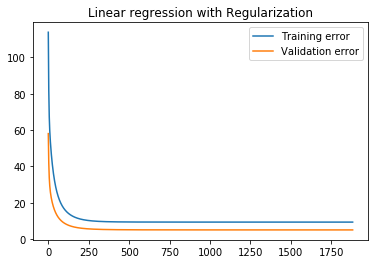

In [58]:
plt.plot([i for i in range(len(train_error_reg))], train_error_reg, label='Training error')
plt.plot([i for i in range(len(valid_error_reg))], valid_error_reg, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Linear regression with Regularization')

In [59]:
theta_reg

array([ 0.00108637, -0.05951755,  0.0724699 ,  0.00803078,  0.08493434,
       -0.20351108,  0.28402433, -0.01432481, -0.2674148 ,  0.2554659 ,
       -0.18401797, -0.20834366,  0.08049423, -0.42613694])

In [60]:
pred_y = np.matmul(X[test_set], theta_reg)

In [61]:
print("T and V error: ", train_error_reg[-1], valid_error_reg[-1])

T and V error:  9.37960186191688 5.081209718939029


In [62]:
print("RME on test set: ", np.linalg.norm(pred_y-y[test_set]))

RME on test set:  4.788753076524253


# L1 regularization

In [63]:
model_reg = linear_model.Lasso(normalize=True, tol=0.000001)

In [64]:
parameters = {'alpha': np.array([(i/100.0) for i in range(1, 2001)])}

In [65]:
train_gridcv  = GridSearchCV(model_reg, parameters, cv=5, verbose=10, scoring=make_scorer(mean_absolute_error))

In [66]:
train_gridcv.fit(X[remaining_sample], y[remaining_sample])

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
[CV] alpha=0.01 ......................................................
[CV] ............. alpha=0.01, score=0.3052571708281289, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............ alpha=0.01, score=0.40563632988796006, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .............. alpha=0.01, score=0.694290803346523, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............. alpha=0.01, score=0.5997678012641631, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ............. alpha=0.01, score=0.5721166976565263, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] ............ alpha=0.02, score=0.32813573942443164, total=   0.0s
[CV] alpha=0.02 ......................................................
[CV] ......

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s


[CV] ............. alpha=0.12, score=0.7043052015663263, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] ............... alpha=0.12, score=1.03032763729842, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] ............... alpha=0.12, score=0.84105595662054, total=   0.0s
[CV] alpha=0.12 ......................................................
[CV] .............. alpha=0.12, score=0.848140872274223, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] ............ alpha=0.13, score=0.43473127328861444, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] ............. alpha=0.13, score=0.7043052015663263, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] ............... alpha=0.13, score=1.03032763729842, total=   0.0s
[CV] alpha=0.13 ......................................................
[CV] .

[CV] .............. alpha=0.35, score=0.848140872274223, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ............ alpha=0.36, score=0.43473127328861444, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ............. alpha=0.36, score=0.7043052015663263, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ............... alpha=0.36, score=1.03032763729842, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] ............... alpha=0.36, score=0.84105595662054, total=   0.0s
[CV] alpha=0.36 ......................................................
[CV] .............. alpha=0.36, score=0.848140872274223, total=   0.0s
[CV] alpha=0.37 ......................................................
[CV] ............ alpha=0.37, score=0.43473127328861444, total=   0.0s
[CV] alpha=0.37 ......................................................
[CV] .

[CV] ............... alpha=0.59, score=1.03032763729842, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] ............... alpha=0.59, score=0.84105595662054, total=   0.0s
[CV] alpha=0.59 ......................................................
[CV] .............. alpha=0.59, score=0.848140872274223, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ............. alpha=0.6, score=0.43473127328861444, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .............. alpha=0.6, score=0.7043052015663263, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ................ alpha=0.6, score=1.03032763729842, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] ................ alpha=0.6, score=0.84105595662054, total=   0.0s
[CV] alpha=0.6 .......................................................
[CV] .

[CV] ............... alpha=0.82, score=1.03032763729842, total=   0.0s
[CV] alpha=0.82 ......................................................
[CV] ............... alpha=0.82, score=0.84105595662054, total=   0.0s
[CV] alpha=0.82 ......................................................
[CV] .............. alpha=0.82, score=0.848140872274223, total=   0.0s
[CV] alpha=0.83 ......................................................
[CV] ............ alpha=0.83, score=0.43473127328861444, total=   0.0s
[CV] alpha=0.83 ......................................................
[CV] ............. alpha=0.83, score=0.7043052015663263, total=   0.0s
[CV] alpha=0.83 ......................................................
[CV] ............... alpha=0.83, score=1.03032763729842, total=   0.0s
[CV] alpha=0.83 ......................................................
[CV] ............... alpha=0.83, score=0.84105595662054, total=   0.0s
[CV] alpha=0.83 ......................................................
[CV] .

[CV] ............ alpha=1.04, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.04 ......................................................
[CV] ............. alpha=1.04, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.04 ......................................................
[CV] ............... alpha=1.04, score=1.03032763729842, total=   0.0s
[CV] alpha=1.04 ......................................................
[CV] ............... alpha=1.04, score=0.84105595662054, total=   0.0s
[CV] alpha=1.04 ......................................................
[CV] .............. alpha=1.04, score=0.848140872274223, total=   0.0s
[CV] alpha=1.05 ......................................................
[CV] ............ alpha=1.05, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.05 ......................................................
[CV] ............. alpha=1.05, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.05 ......................................................
[CV] .

[CV] ............ alpha=1.17, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.17 ......................................................
[CV] ............. alpha=1.17, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.17 ......................................................
[CV] ............... alpha=1.17, score=1.03032763729842, total=   0.0s
[CV] alpha=1.17 ......................................................
[CV] ............... alpha=1.17, score=0.84105595662054, total=   0.0s
[CV] alpha=1.17 ......................................................
[CV] .............. alpha=1.17, score=0.848140872274223, total=   0.0s
[CV] alpha=1.18 ......................................................
[CV] ............ alpha=1.18, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.18 ......................................................
[CV] ............. alpha=1.18, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.18 ......................................................
[CV] .

[CV] ............... alpha=1.28, score=0.84105595662054, total=   0.0s
[CV] alpha=1.28 ......................................................
[CV] .............. alpha=1.28, score=0.848140872274223, total=   0.0s
[CV] alpha=1.29 ......................................................
[CV] ............ alpha=1.29, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.29 ......................................................
[CV] ............. alpha=1.29, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.29 ......................................................
[CV] ............... alpha=1.29, score=1.03032763729842, total=   0.0s
[CV] alpha=1.29 ......................................................
[CV] ............... alpha=1.29, score=0.84105595662054, total=   0.0s
[CV] alpha=1.29 ......................................................
[CV] .............. alpha=1.29, score=0.848140872274223, total=   0.0s
[CV] alpha=1.3 .......................................................
[CV] .

[CV] .............. alpha=1.4, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] ................ alpha=1.4, score=1.03032763729842, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] ................ alpha=1.4, score=0.84105595662054, total=   0.0s
[CV] alpha=1.4 .......................................................
[CV] ............... alpha=1.4, score=0.848140872274223, total=   0.0s
[CV] alpha=1.41 ......................................................
[CV] ............ alpha=1.41, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.41 ......................................................
[CV] ............. alpha=1.41, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.41 ......................................................
[CV] ............... alpha=1.41, score=1.03032763729842, total=   0.0s
[CV] alpha=1.41 ......................................................
[CV] .

[CV] ............ alpha=1.52, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.52 ......................................................
[CV] ............. alpha=1.52, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.52 ......................................................
[CV] ............... alpha=1.52, score=1.03032763729842, total=   0.0s
[CV] alpha=1.52 ......................................................
[CV] ............... alpha=1.52, score=0.84105595662054, total=   0.0s
[CV] alpha=1.52 ......................................................
[CV] .............. alpha=1.52, score=0.848140872274223, total=   0.0s
[CV] alpha=1.53 ......................................................
[CV] ............ alpha=1.53, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.53 ......................................................
[CV] ............. alpha=1.53, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.53 ......................................................
[CV] .

[CV] ............... alpha=1.64, score=1.03032763729842, total=   0.0s
[CV] alpha=1.64 ......................................................
[CV] ............... alpha=1.64, score=0.84105595662054, total=   0.0s
[CV] alpha=1.64 ......................................................
[CV] .............. alpha=1.64, score=0.848140872274223, total=   0.0s
[CV] alpha=1.65 ......................................................
[CV] ............ alpha=1.65, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.65 ......................................................
[CV] ............. alpha=1.65, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.65 ......................................................
[CV] ............... alpha=1.65, score=1.03032763729842, total=   0.0s
[CV] alpha=1.65 ......................................................
[CV] ............... alpha=1.65, score=0.84105595662054, total=   0.0s
[CV] alpha=1.65 ......................................................
[CV] .

[CV] ............... alpha=1.76, score=1.03032763729842, total=   0.0s
[CV] alpha=1.76 ......................................................
[CV] ............... alpha=1.76, score=0.84105595662054, total=   0.0s
[CV] alpha=1.76 ......................................................
[CV] .............. alpha=1.76, score=0.848140872274223, total=   0.0s
[CV] alpha=1.77 ......................................................
[CV] ............ alpha=1.77, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.77 ......................................................
[CV] ............. alpha=1.77, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.77 ......................................................
[CV] ............... alpha=1.77, score=1.03032763729842, total=   0.0s
[CV] alpha=1.77 ......................................................
[CV] ............... alpha=1.77, score=0.84105595662054, total=   0.0s
[CV] alpha=1.77 ......................................................
[CV] .

[CV] .............. alpha=1.98, score=0.848140872274223, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............ alpha=1.99, score=0.43473127328861444, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............. alpha=1.99, score=0.7043052015663263, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............... alpha=1.99, score=1.03032763729842, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] ............... alpha=1.99, score=0.84105595662054, total=   0.0s
[CV] alpha=1.99 ......................................................
[CV] .............. alpha=1.99, score=0.848140872274223, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ............. alpha=2.0, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] .

[CV] ............... alpha=2.1, score=0.848140872274223, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............ alpha=2.11, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............. alpha=2.11, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............... alpha=2.11, score=1.03032763729842, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] ............... alpha=2.11, score=0.84105595662054, total=   0.0s
[CV] alpha=2.11 ......................................................
[CV] .............. alpha=2.11, score=0.848140872274223, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] ............ alpha=2.12, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.12 ......................................................
[CV] .

[CV] ............ alpha=2.23, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] ............. alpha=2.23, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] ............... alpha=2.23, score=1.03032763729842, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] ............... alpha=2.23, score=0.84105595662054, total=   0.0s
[CV] alpha=2.23 ......................................................
[CV] .............. alpha=2.23, score=0.848140872274223, total=   0.0s
[CV] alpha=2.24 ......................................................
[CV] ............ alpha=2.24, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.24 ......................................................
[CV] ............. alpha=2.24, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.24 ......................................................
[CV] .

[CV] alpha=2.44 ......................................................
[CV] ............... alpha=2.44, score=0.84105595662054, total=   0.0s
[CV] alpha=2.44 ......................................................
[CV] .............. alpha=2.44, score=0.848140872274223, total=   0.0s
[CV] alpha=2.45 ......................................................
[CV] ............ alpha=2.45, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.45 ......................................................
[CV] ............. alpha=2.45, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.45 ......................................................
[CV] ............... alpha=2.45, score=1.03032763729842, total=   0.0s
[CV] alpha=2.45 ......................................................
[CV] ............... alpha=2.45, score=0.84105595662054, total=   0.0s
[CV] alpha=2.45 ......................................................
[CV] .............. alpha=2.45, score=0.848140872274223, total=   0.0s
[CV] a

[CV] ............. alpha=2.66, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.66 ......................................................
[CV] ............... alpha=2.66, score=1.03032763729842, total=   0.0s
[CV] alpha=2.66 ......................................................
[CV] ............... alpha=2.66, score=0.84105595662054, total=   0.0s
[CV] alpha=2.66 ......................................................
[CV] .............. alpha=2.66, score=0.848140872274223, total=   0.0s
[CV] alpha=2.67 ......................................................
[CV] ............ alpha=2.67, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.67 ......................................................
[CV] ............. alpha=2.67, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.67 ......................................................
[CV] ............... alpha=2.67, score=1.03032763729842, total=   0.0s
[CV] alpha=2.67 ......................................................
[CV] .

[CV] ............ alpha=2.85, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.85 ......................................................
[CV] ............. alpha=2.85, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.85 ......................................................
[CV] ............... alpha=2.85, score=1.03032763729842, total=   0.0s
[CV] alpha=2.85 ......................................................
[CV] ............... alpha=2.85, score=0.84105595662054, total=   0.0s
[CV] alpha=2.85 ......................................................
[CV] .............. alpha=2.85, score=0.848140872274223, total=   0.0s
[CV] alpha=2.86 ......................................................
[CV] ............ alpha=2.86, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.86 ......................................................
[CV] ............. alpha=2.86, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.86 ......................................................
[CV] .

[CV] ............... alpha=2.96, score=0.84105595662054, total=   0.0s
[CV] alpha=2.96 ......................................................
[CV] .............. alpha=2.96, score=0.848140872274223, total=   0.0s
[CV] alpha=2.97 ......................................................
[CV] ............ alpha=2.97, score=0.43473127328861444, total=   0.0s
[CV] alpha=2.97 ......................................................
[CV] ............. alpha=2.97, score=0.7043052015663263, total=   0.0s
[CV] alpha=2.97 ......................................................
[CV] ............... alpha=2.97, score=1.03032763729842, total=   0.0s
[CV] alpha=2.97 ......................................................
[CV] ............... alpha=2.97, score=0.84105595662054, total=   0.0s
[CV] alpha=2.97 ......................................................
[CV] .............. alpha=2.97, score=0.848140872274223, total=   0.0s
[CV] alpha=2.98 ......................................................
[CV] .

[CV] ............... alpha=3.09, score=1.03032763729842, total=   0.0s
[CV] alpha=3.09 ......................................................
[CV] ............... alpha=3.09, score=0.84105595662054, total=   0.0s
[CV] alpha=3.09 ......................................................
[CV] .............. alpha=3.09, score=0.848140872274223, total=   0.0s
[CV] alpha=3.1 .......................................................
[CV] ............. alpha=3.1, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.1 .......................................................
[CV] .............. alpha=3.1, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.1 .......................................................
[CV] ................ alpha=3.1, score=1.03032763729842, total=   0.0s
[CV] alpha=3.1 .......................................................
[CV] ................ alpha=3.1, score=0.84105595662054, total=   0.0s
[CV] alpha=3.1 .......................................................
[CV] .

[CV] ............ alpha=3.33, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.33 ......................................................
[CV] ............. alpha=3.33, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.33 ......................................................
[CV] ............... alpha=3.33, score=1.03032763729842, total=   0.0s
[CV] alpha=3.33 ......................................................
[CV] ............... alpha=3.33, score=0.84105595662054, total=   0.0s
[CV] alpha=3.33 ......................................................
[CV] .............. alpha=3.33, score=0.848140872274223, total=   0.0s
[CV] alpha=3.34 ......................................................
[CV] ............ alpha=3.34, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.34 ......................................................
[CV] ............. alpha=3.34, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.34 ......................................................
[CV] .

[CV] ............ alpha=3.46, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.46 ......................................................
[CV] ............. alpha=3.46, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.46 ......................................................
[CV] ............... alpha=3.46, score=1.03032763729842, total=   0.0s
[CV] alpha=3.46 ......................................................
[CV] ............... alpha=3.46, score=0.84105595662054, total=   0.0s
[CV] alpha=3.46 ......................................................
[CV] .............. alpha=3.46, score=0.848140872274223, total=   0.0s
[CV] alpha=3.47 ......................................................
[CV] ............ alpha=3.47, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.47 ......................................................
[CV] ............. alpha=3.47, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.47 ......................................................
[CV] .

[CV] .............. alpha=3.68, score=0.848140872274223, total=   0.0s
[CV] alpha=3.69 ......................................................
[CV] ............ alpha=3.69, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.69 ......................................................
[CV] ............. alpha=3.69, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.69 ......................................................
[CV] ............... alpha=3.69, score=1.03032763729842, total=   0.0s
[CV] alpha=3.69 ......................................................
[CV] ............... alpha=3.69, score=0.84105595662054, total=   0.0s
[CV] alpha=3.69 ......................................................
[CV] .............. alpha=3.69, score=0.848140872274223, total=   0.0s
[CV] alpha=3.7 .......................................................
[CV] ............. alpha=3.7, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.7 .......................................................
[CV] .

[CV] ............ alpha=3.92, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.92 ......................................................
[CV] ............. alpha=3.92, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.92 ......................................................
[CV] ............... alpha=3.92, score=1.03032763729842, total=   0.0s
[CV] alpha=3.92 ......................................................
[CV] ............... alpha=3.92, score=0.84105595662054, total=   0.0s
[CV] alpha=3.92 ......................................................
[CV] .............. alpha=3.92, score=0.848140872274223, total=   0.0s
[CV] alpha=3.93 ......................................................
[CV] ............ alpha=3.93, score=0.43473127328861444, total=   0.0s
[CV] alpha=3.93 ......................................................
[CV] ............. alpha=3.93, score=0.7043052015663263, total=   0.0s
[CV] alpha=3.93 ......................................................
[CV] .

[CV] ............ alpha=4.13, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.13 ......................................................
[CV] ............. alpha=4.13, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.13 ......................................................
[CV] ............... alpha=4.13, score=1.03032763729842, total=   0.0s
[CV] alpha=4.13 ......................................................
[CV] ............... alpha=4.13, score=0.84105595662054, total=   0.0s
[CV] alpha=4.13 ......................................................
[CV] .............. alpha=4.13, score=0.848140872274223, total=   0.0s
[CV] alpha=4.14 ......................................................
[CV] ............ alpha=4.14, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.14 ......................................................
[CV] ............. alpha=4.14, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.14 ......................................................
[CV] .

[CV] ............ alpha=4.35, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.35 ......................................................
[CV] ............. alpha=4.35, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.35 ......................................................
[CV] ............... alpha=4.35, score=1.03032763729842, total=   0.0s
[CV] alpha=4.35 ......................................................
[CV] ............... alpha=4.35, score=0.84105595662054, total=   0.0s
[CV] alpha=4.35 ......................................................
[CV] .............. alpha=4.35, score=0.848140872274223, total=   0.0s
[CV] alpha=4.36 ......................................................
[CV] ............ alpha=4.36, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.36 ......................................................
[CV] ............. alpha=4.36, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.36 ......................................................
[CV] .

[CV] ............ alpha=4.57, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.57 ......................................................
[CV] ............. alpha=4.57, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.57 ......................................................
[CV] ............... alpha=4.57, score=1.03032763729842, total=   0.0s
[CV] alpha=4.57 ......................................................
[CV] ............... alpha=4.57, score=0.84105595662054, total=   0.0s
[CV] alpha=4.57 ......................................................
[CV] .............. alpha=4.57, score=0.848140872274223, total=   0.0s
[CV] alpha=4.58 ......................................................
[CV] ............ alpha=4.58, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.58 ......................................................
[CV] ............. alpha=4.58, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.58 ......................................................
[CV] .

[CV] .............. alpha=4.68, score=0.848140872274223, total=   0.0s
[CV] alpha=4.69 ......................................................
[CV] ............ alpha=4.69, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.69 ......................................................
[CV] ............. alpha=4.69, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.69 ......................................................
[CV] ............... alpha=4.69, score=1.03032763729842, total=   0.0s
[CV] alpha=4.69 ......................................................
[CV] ............... alpha=4.69, score=0.84105595662054, total=   0.0s
[CV] alpha=4.69 ......................................................
[CV] .............. alpha=4.69, score=0.848140872274223, total=   0.0s
[CV] alpha=4.7 .......................................................
[CV] ............. alpha=4.7, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.7 .......................................................
[CV] .

[CV] ............... alpha=4.9, score=0.848140872274223, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] ............ alpha=4.91, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] ............. alpha=4.91, score=0.7043052015663263, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] ............... alpha=4.91, score=1.03032763729842, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] ............... alpha=4.91, score=0.84105595662054, total=   0.0s
[CV] alpha=4.91 ......................................................
[CV] .............. alpha=4.91, score=0.848140872274223, total=   0.0s
[CV] alpha=4.92 ......................................................
[CV] ............ alpha=4.92, score=0.43473127328861444, total=   0.0s
[CV] alpha=4.92 ......................................................
[CV] .

[CV] ............. alpha=5.03, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] ............... alpha=5.03, score=1.03032763729842, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] ............... alpha=5.03, score=0.84105595662054, total=   0.0s
[CV] alpha=5.03 ......................................................
[CV] .............. alpha=5.03, score=0.848140872274223, total=   0.0s
[CV] alpha=5.04 ......................................................
[CV] ............ alpha=5.04, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.04 ......................................................
[CV] ............. alpha=5.04, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.04 ......................................................
[CV] ............... alpha=5.04, score=1.03032763729842, total=   0.0s
[CV] alpha=5.04 ......................................................
[CV] .

[CV] .............. alpha=5.25, score=0.848140872274223, total=   0.0s
[CV] alpha=5.26 ......................................................
[CV] ............ alpha=5.26, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.26 ......................................................
[CV] ............. alpha=5.26, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.26 ......................................................
[CV] ............... alpha=5.26, score=1.03032763729842, total=   0.0s
[CV] alpha=5.26 ......................................................
[CV] ............... alpha=5.26, score=0.84105595662054, total=   0.0s
[CV] alpha=5.26 ......................................................
[CV] .............. alpha=5.26, score=0.848140872274223, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] ............ alpha=5.27, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.27 ......................................................
[CV] .

[CV] ............ alpha=5.38, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.38 ......................................................
[CV] ............. alpha=5.38, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.38 ......................................................
[CV] ............... alpha=5.38, score=1.03032763729842, total=   0.0s
[CV] alpha=5.38 ......................................................
[CV] ............... alpha=5.38, score=0.84105595662054, total=   0.0s
[CV] alpha=5.38 ......................................................
[CV] .............. alpha=5.38, score=0.848140872274223, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............ alpha=5.39, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] ............. alpha=5.39, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.39 ......................................................
[CV] .

[CV] ................ alpha=5.5, score=0.84105595662054, total=   0.0s
[CV] alpha=5.5 .......................................................
[CV] ............... alpha=5.5, score=0.848140872274223, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] ............ alpha=5.51, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] ............. alpha=5.51, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] ............... alpha=5.51, score=1.03032763729842, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] ............... alpha=5.51, score=0.84105595662054, total=   0.0s
[CV] alpha=5.51 ......................................................
[CV] .............. alpha=5.51, score=0.848140872274223, total=   0.0s
[CV] alpha=5.52 ......................................................
[CV] .

[CV] ............. alpha=5.62, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.62 ......................................................
[CV] ............... alpha=5.62, score=1.03032763729842, total=   0.0s
[CV] alpha=5.62 ......................................................
[CV] ............... alpha=5.62, score=0.84105595662054, total=   0.0s
[CV] alpha=5.62 ......................................................
[CV] .............. alpha=5.62, score=0.848140872274223, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] ............ alpha=5.63, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] ............. alpha=5.63, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] ............... alpha=5.63, score=1.03032763729842, total=   0.0s
[CV] alpha=5.63 ......................................................
[CV] .

[CV] .............. alpha=5.74, score=0.848140872274223, total=   0.0s
[CV] alpha=5.75 ......................................................
[CV] ............ alpha=5.75, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.75 ......................................................
[CV] ............. alpha=5.75, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.75 ......................................................
[CV] ............... alpha=5.75, score=1.03032763729842, total=   0.0s
[CV] alpha=5.75 ......................................................
[CV] ............... alpha=5.75, score=0.84105595662054, total=   0.0s
[CV] alpha=5.75 ......................................................
[CV] .............. alpha=5.75, score=0.848140872274223, total=   0.0s
[CV] alpha=5.76 ......................................................
[CV] ............ alpha=5.76, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.76 ......................................................
[CV] .

[CV] ............... alpha=5.97, score=0.84105595662054, total=   0.0s
[CV] alpha=5.97 ......................................................
[CV] .............. alpha=5.97, score=0.848140872274223, total=   0.0s
[CV] alpha=5.98 ......................................................
[CV] ............ alpha=5.98, score=0.43473127328861444, total=   0.0s
[CV] alpha=5.98 ......................................................
[CV] ............. alpha=5.98, score=0.7043052015663263, total=   0.0s
[CV] alpha=5.98 ......................................................
[CV] ............... alpha=5.98, score=1.03032763729842, total=   0.0s
[CV] alpha=5.98 ......................................................
[CV] ............... alpha=5.98, score=0.84105595662054, total=   0.0s
[CV] alpha=5.98 ......................................................
[CV] .............. alpha=5.98, score=0.848140872274223, total=   0.0s
[CV] alpha=5.99 ......................................................
[CV] .

[CV] ............. alpha=6.2, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.2 .......................................................
[CV] .............. alpha=6.2, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.2 .......................................................
[CV] ................ alpha=6.2, score=1.03032763729842, total=   0.0s
[CV] alpha=6.2 .......................................................
[CV] ................ alpha=6.2, score=0.84105595662054, total=   0.0s
[CV] alpha=6.2 .......................................................
[CV] ............... alpha=6.2, score=0.848140872274223, total=   0.0s
[CV] alpha=6.21 ......................................................
[CV] ............ alpha=6.21, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.21 ......................................................
[CV] ............. alpha=6.21, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.21 ......................................................
[CV] .

[CV] ................ alpha=6.4, score=0.84105595662054, total=   0.0s
[CV] alpha=6.4 .......................................................
[CV] ............... alpha=6.4, score=0.848140872274223, total=   0.0s
[CV] alpha=6.41 ......................................................
[CV] ............ alpha=6.41, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.41 ......................................................
[CV] ............. alpha=6.41, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.41 ......................................................
[CV] ............... alpha=6.41, score=1.03032763729842, total=   0.0s
[CV] alpha=6.41 ......................................................
[CV] ............... alpha=6.41, score=0.84105595662054, total=   0.0s
[CV] alpha=6.41 ......................................................
[CV] .............. alpha=6.41, score=0.848140872274223, total=   0.0s
[CV] alpha=6.42 ......................................................
[CV] .

[CV] ............... alpha=6.6, score=0.848140872274223, total=   0.0s
[CV] alpha=6.61 ......................................................
[CV] ............ alpha=6.61, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.61 ......................................................
[CV] ............. alpha=6.61, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.61 ......................................................
[CV] ............... alpha=6.61, score=1.03032763729842, total=   0.0s
[CV] alpha=6.61 ......................................................
[CV] ............... alpha=6.61, score=0.84105595662054, total=   0.0s
[CV] alpha=6.61 ......................................................
[CV] .............. alpha=6.61, score=0.848140872274223, total=   0.0s
[CV] alpha=6.62 ......................................................
[CV] ............ alpha=6.62, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.62 ......................................................
[CV] .

[CV] ............... alpha=6.72, score=1.03032763729842, total=   0.0s
[CV] alpha=6.72 ......................................................
[CV] ............... alpha=6.72, score=0.84105595662054, total=   0.0s
[CV] alpha=6.72 ......................................................
[CV] .............. alpha=6.72, score=0.848140872274223, total=   0.0s
[CV] alpha=6.73 ......................................................
[CV] ............ alpha=6.73, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.73 ......................................................
[CV] ............. alpha=6.73, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.73 ......................................................
[CV] ............... alpha=6.73, score=1.03032763729842, total=   0.0s
[CV] alpha=6.73 ......................................................
[CV] ............... alpha=6.73, score=0.84105595662054, total=   0.0s
[CV] alpha=6.73 ......................................................
[CV] .

[CV] ............ alpha=6.84, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.84 ......................................................
[CV] ............. alpha=6.84, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.84 ......................................................
[CV] ............... alpha=6.84, score=1.03032763729842, total=   0.0s
[CV] alpha=6.84 ......................................................
[CV] ............... alpha=6.84, score=0.84105595662054, total=   0.0s
[CV] alpha=6.84 ......................................................
[CV] .............. alpha=6.84, score=0.848140872274223, total=   0.0s
[CV] alpha=6.85 ......................................................
[CV] ............ alpha=6.85, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.85 ......................................................
[CV] ............. alpha=6.85, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.85 ......................................................
[CV] .

[CV] ............... alpha=6.95, score=0.84105595662054, total=   0.0s
[CV] alpha=6.95 ......................................................
[CV] .............. alpha=6.95, score=0.848140872274223, total=   0.0s
[CV] alpha=6.96 ......................................................
[CV] ............ alpha=6.96, score=0.43473127328861444, total=   0.0s
[CV] alpha=6.96 ......................................................
[CV] ............. alpha=6.96, score=0.7043052015663263, total=   0.0s
[CV] alpha=6.96 ......................................................
[CV] ............... alpha=6.96, score=1.03032763729842, total=   0.0s
[CV] alpha=6.96 ......................................................
[CV] ............... alpha=6.96, score=0.84105595662054, total=   0.0s
[CV] alpha=6.96 ......................................................
[CV] .............. alpha=6.96, score=0.848140872274223, total=   0.0s
[CV] alpha=6.97 ......................................................
[CV] .

[CV] ............ alpha=7.19, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] ............. alpha=7.19, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] ............... alpha=7.19, score=1.03032763729842, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] ............... alpha=7.19, score=0.84105595662054, total=   0.0s
[CV] alpha=7.19 ......................................................
[CV] .............. alpha=7.19, score=0.848140872274223, total=   0.0s
[CV] alpha=7.2 .......................................................
[CV] ............. alpha=7.2, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.2 .......................................................
[CV] .............. alpha=7.2, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.2 .......................................................
[CV] .

[CV] ............. alpha=7.41, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.41 ......................................................
[CV] ............... alpha=7.41, score=1.03032763729842, total=   0.0s
[CV] alpha=7.41 ......................................................
[CV] ............... alpha=7.41, score=0.84105595662054, total=   0.0s
[CV] alpha=7.41 ......................................................
[CV] .............. alpha=7.41, score=0.848140872274223, total=   0.0s
[CV] alpha=7.42 ......................................................
[CV] ............ alpha=7.42, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.42 ......................................................
[CV] ............. alpha=7.42, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.42 ......................................................
[CV] ............... alpha=7.42, score=1.03032763729842, total=   0.0s
[CV] alpha=7.42 ......................................................
[CV] .

[CV] .............. alpha=7.52, score=0.848140872274223, total=   0.0s
[CV] alpha=7.53 ......................................................
[CV] ............ alpha=7.53, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.53 ......................................................
[CV] ............. alpha=7.53, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.53 ......................................................
[CV] ............... alpha=7.53, score=1.03032763729842, total=   0.0s
[CV] alpha=7.53 ......................................................
[CV] ............... alpha=7.53, score=0.84105595662054, total=   0.0s
[CV] alpha=7.53 ......................................................
[CV] .............. alpha=7.53, score=0.848140872274223, total=   0.0s
[CV] alpha=7.54 ......................................................
[CV] ............ alpha=7.54, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.54 ......................................................
[CV] .

[CV] ............... alpha=7.74, score=1.03032763729842, total=   0.0s
[CV] alpha=7.74 ......................................................
[CV] ............... alpha=7.74, score=0.84105595662054, total=   0.0s
[CV] alpha=7.74 ......................................................
[CV] .............. alpha=7.74, score=0.848140872274223, total=   0.0s
[CV] alpha=7.75 ......................................................
[CV] ............ alpha=7.75, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.75 ......................................................
[CV] ............. alpha=7.75, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.75 ......................................................
[CV] ............... alpha=7.75, score=1.03032763729842, total=   0.0s
[CV] alpha=7.75 ......................................................
[CV] ............... alpha=7.75, score=0.84105595662054, total=   0.0s
[CV] alpha=7.75 ......................................................
[CV] .

[CV] ............ alpha=7.86, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.86 ......................................................
[CV] ............. alpha=7.86, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.86 ......................................................
[CV] ............... alpha=7.86, score=1.03032763729842, total=   0.0s
[CV] alpha=7.86 ......................................................
[CV] ............... alpha=7.86, score=0.84105595662054, total=   0.0s
[CV] alpha=7.86 ......................................................
[CV] .............. alpha=7.86, score=0.848140872274223, total=   0.0s
[CV] alpha=7.87 ......................................................
[CV] ............ alpha=7.87, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.87 ......................................................
[CV] ............. alpha=7.87, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.87 ......................................................
[CV] .

[CV] .............. alpha=7.97, score=0.848140872274223, total=   0.0s
[CV] alpha=7.98 ......................................................
[CV] ............ alpha=7.98, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.98 ......................................................
[CV] ............. alpha=7.98, score=0.7043052015663263, total=   0.0s
[CV] alpha=7.98 ......................................................
[CV] ............... alpha=7.98, score=1.03032763729842, total=   0.0s
[CV] alpha=7.98 ......................................................
[CV] ............... alpha=7.98, score=0.84105595662054, total=   0.0s
[CV] alpha=7.98 ......................................................
[CV] .............. alpha=7.98, score=0.848140872274223, total=   0.0s
[CV] alpha=7.99 ......................................................
[CV] ............ alpha=7.99, score=0.43473127328861444, total=   0.0s
[CV] alpha=7.99 ......................................................
[CV] .

[CV] ............... alpha=8.09, score=1.03032763729842, total=   0.0s
[CV] alpha=8.09 ......................................................
[CV] ............... alpha=8.09, score=0.84105595662054, total=   0.0s
[CV] alpha=8.09 ......................................................
[CV] .............. alpha=8.09, score=0.848140872274223, total=   0.0s
[CV] alpha=8.1 .......................................................
[CV] ............. alpha=8.1, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.1 .......................................................
[CV] .............. alpha=8.1, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.1 .......................................................
[CV] ................ alpha=8.1, score=1.03032763729842, total=   0.0s
[CV] alpha=8.1 .......................................................
[CV] ................ alpha=8.1, score=0.84105595662054, total=   0.0s
[CV] alpha=8.1 .......................................................
[CV] .

[CV] ............. alpha=8.22, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.22 ......................................................
[CV] ............... alpha=8.22, score=1.03032763729842, total=   0.0s
[CV] alpha=8.22 ......................................................
[CV] ............... alpha=8.22, score=0.84105595662054, total=   0.0s
[CV] alpha=8.22 ......................................................
[CV] .............. alpha=8.22, score=0.848140872274223, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] ............ alpha=8.23, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] ............. alpha=8.23, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] ............... alpha=8.23, score=1.03032763729842, total=   0.0s
[CV] alpha=8.23 ......................................................
[CV] .

[CV] .............. alpha=8.33, score=0.848140872274223, total=   0.0s
[CV] alpha=8.34 ......................................................
[CV] ............ alpha=8.34, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.34 ......................................................
[CV] ............. alpha=8.34, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.34 ......................................................
[CV] ............... alpha=8.34, score=1.03032763729842, total=   0.0s
[CV] alpha=8.34 ......................................................
[CV] ............... alpha=8.34, score=0.84105595662054, total=   0.0s
[CV] alpha=8.34 ......................................................
[CV] .............. alpha=8.34, score=0.848140872274223, total=   0.0s
[CV] alpha=8.35 ......................................................
[CV] ............ alpha=8.35, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.35 ......................................................
[CV] .

[CV] .............. alpha=8.45, score=0.848140872274223, total=   0.0s
[CV] alpha=8.46 ......................................................
[CV] ............ alpha=8.46, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.46 ......................................................
[CV] ............. alpha=8.46, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.46 ......................................................
[CV] ............... alpha=8.46, score=1.03032763729842, total=   0.0s
[CV] alpha=8.46 ......................................................
[CV] ............... alpha=8.46, score=0.84105595662054, total=   0.0s
[CV] alpha=8.46 ......................................................
[CV] .............. alpha=8.46, score=0.848140872274223, total=   0.0s
[CV] alpha=8.47 ......................................................
[CV] ............ alpha=8.47, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.47 ......................................................
[CV] .

[CV] ............. alpha=8.58, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.58 ......................................................
[CV] ............... alpha=8.58, score=1.03032763729842, total=   0.0s
[CV] alpha=8.58 ......................................................
[CV] ............... alpha=8.58, score=0.84105595662054, total=   0.0s
[CV] alpha=8.58 ......................................................
[CV] .............. alpha=8.58, score=0.848140872274223, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] ............ alpha=8.59, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] ............. alpha=8.59, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] ............... alpha=8.59, score=1.03032763729842, total=   0.0s
[CV] alpha=8.59 ......................................................
[CV] .

[CV] ............. alpha=8.7, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.7 .......................................................
[CV] .............. alpha=8.7, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.7 .......................................................
[CV] ................ alpha=8.7, score=1.03032763729842, total=   0.0s
[CV] alpha=8.7 .......................................................
[CV] ................ alpha=8.7, score=0.84105595662054, total=   0.0s
[CV] alpha=8.7 .......................................................
[CV] ............... alpha=8.7, score=0.848140872274223, total=   0.0s
[CV] alpha=8.71 ......................................................
[CV] ............ alpha=8.71, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.71 ......................................................
[CV] ............. alpha=8.71, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.71 ......................................................
[CV] .

[CV] ............ alpha=8.83, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.83 ......................................................
[CV] ............. alpha=8.83, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.83 ......................................................
[CV] ............... alpha=8.83, score=1.03032763729842, total=   0.0s
[CV] alpha=8.83 ......................................................
[CV] ............... alpha=8.83, score=0.84105595662054, total=   0.0s
[CV] alpha=8.83 ......................................................
[CV] .............. alpha=8.83, score=0.848140872274223, total=   0.0s
[CV] alpha=8.84 ......................................................
[CV] ............ alpha=8.84, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.84 ......................................................
[CV] ............. alpha=8.84, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.84 ......................................................
[CV] .

[CV] ............... alpha=8.94, score=0.84105595662054, total=   0.0s
[CV] alpha=8.94 ......................................................
[CV] .............. alpha=8.94, score=0.848140872274223, total=   0.0s
[CV] alpha=8.95 ......................................................
[CV] ............ alpha=8.95, score=0.43473127328861444, total=   0.0s
[CV] alpha=8.95 ......................................................
[CV] ............. alpha=8.95, score=0.7043052015663263, total=   0.0s
[CV] alpha=8.95 ......................................................
[CV] ............... alpha=8.95, score=1.03032763729842, total=   0.0s
[CV] alpha=8.95 ......................................................
[CV] ............... alpha=8.95, score=0.84105595662054, total=   0.0s
[CV] alpha=8.95 ......................................................
[CV] .............. alpha=8.95, score=0.848140872274223, total=   0.0s
[CV] alpha=8.96 ......................................................
[CV] .

[CV] ............. alpha=9.08, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.08 ......................................................
[CV] ............... alpha=9.08, score=1.03032763729842, total=   0.0s
[CV] alpha=9.08 ......................................................
[CV] ............... alpha=9.08, score=0.84105595662054, total=   0.0s
[CV] alpha=9.08 ......................................................
[CV] .............. alpha=9.08, score=0.848140872274223, total=   0.0s
[CV] alpha=9.09 ......................................................
[CV] ............ alpha=9.09, score=0.43473127328861444, total=   0.0s
[CV] alpha=9.09 ......................................................
[CV] ............. alpha=9.09, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.09 ......................................................
[CV] ............... alpha=9.09, score=1.03032763729842, total=   0.0s
[CV] alpha=9.09 ......................................................
[CV] .

[CV] .............. alpha=9.31, score=0.848140872274223, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............ alpha=9.32, score=0.43473127328861444, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............. alpha=9.32, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............... alpha=9.32, score=1.03032763729842, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] ............... alpha=9.32, score=0.84105595662054, total=   0.0s
[CV] alpha=9.32 ......................................................
[CV] .............. alpha=9.32, score=0.848140872274223, total=   0.0s
[CV] alpha=9.33 ......................................................
[CV] ............ alpha=9.33, score=0.43473127328861444, total=   0.0s
[CV] alpha=9.33 ......................................................
[CV] .

[CV] ............. alpha=9.44, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.44 ......................................................
[CV] ............... alpha=9.44, score=1.03032763729842, total=   0.0s
[CV] alpha=9.44 ......................................................
[CV] ............... alpha=9.44, score=0.84105595662054, total=   0.0s
[CV] alpha=9.44 ......................................................
[CV] .............. alpha=9.44, score=0.848140872274223, total=   0.0s
[CV] alpha=9.45 ......................................................
[CV] ............ alpha=9.45, score=0.43473127328861444, total=   0.0s
[CV] alpha=9.45 ......................................................
[CV] ............. alpha=9.45, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.45 ......................................................
[CV] ............... alpha=9.45, score=1.03032763729842, total=   0.0s
[CV] alpha=9.45 ......................................................
[CV] .

[CV] ............... alpha=9.56, score=0.84105595662054, total=   0.0s
[CV] alpha=9.56 ......................................................
[CV] .............. alpha=9.56, score=0.848140872274223, total=   0.0s
[CV] alpha=9.57 ......................................................
[CV] ............ alpha=9.57, score=0.43473127328861444, total=   0.0s
[CV] alpha=9.57 ......................................................
[CV] ............. alpha=9.57, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.57 ......................................................
[CV] ............... alpha=9.57, score=1.03032763729842, total=   0.0s
[CV] alpha=9.57 ......................................................
[CV] ............... alpha=9.57, score=0.84105595662054, total=   0.0s
[CV] alpha=9.57 ......................................................
[CV] .............. alpha=9.57, score=0.848140872274223, total=   0.0s
[CV] alpha=9.58 ......................................................
[CV] .

[CV] ............. alpha=9.79, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.79 ......................................................
[CV] ............... alpha=9.79, score=1.03032763729842, total=   0.0s
[CV] alpha=9.79 ......................................................
[CV] ............... alpha=9.79, score=0.84105595662054, total=   0.0s
[CV] alpha=9.79 ......................................................
[CV] .............. alpha=9.79, score=0.848140872274223, total=   0.0s
[CV] alpha=9.8 .......................................................
[CV] ............. alpha=9.8, score=0.43473127328861444, total=   0.0s
[CV] alpha=9.8 .......................................................
[CV] .............. alpha=9.8, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.8 .......................................................
[CV] ................ alpha=9.8, score=1.03032763729842, total=   0.0s
[CV] alpha=9.8 .......................................................
[CV] .

[CV] ............... alpha=9.91, score=0.84105595662054, total=   0.0s
[CV] alpha=9.91 ......................................................
[CV] .............. alpha=9.91, score=0.848140872274223, total=   0.0s
[CV] alpha=9.92 ......................................................
[CV] ............ alpha=9.92, score=0.43473127328861444, total=   0.0s
[CV] alpha=9.92 ......................................................
[CV] ............. alpha=9.92, score=0.7043052015663263, total=   0.0s
[CV] alpha=9.92 ......................................................
[CV] ............... alpha=9.92, score=1.03032763729842, total=   0.0s
[CV] alpha=9.92 ......................................................
[CV] ............... alpha=9.92, score=0.84105595662054, total=   0.0s
[CV] alpha=9.92 ......................................................
[CV] .............. alpha=9.92, score=0.848140872274223, total=   0.0s
[CV] alpha=9.93 ......................................................
[CV] .

[CV] .............. alpha=10.13, score=1.03032763729842, total=   0.0s
[CV] alpha=10.13 .....................................................
[CV] .............. alpha=10.13, score=0.84105595662054, total=   0.0s
[CV] alpha=10.13 .....................................................
[CV] ............. alpha=10.13, score=0.848140872274223, total=   0.0s
[CV] alpha=10.14 .....................................................
[CV] ........... alpha=10.14, score=0.43473127328861444, total=   0.0s
[CV] alpha=10.14 .....................................................
[CV] ............ alpha=10.14, score=0.7043052015663263, total=   0.0s
[CV] alpha=10.14 .....................................................
[CV] .............. alpha=10.14, score=1.03032763729842, total=   0.0s
[CV] alpha=10.14 .....................................................
[CV] .............. alpha=10.14, score=0.84105595662054, total=   0.0s
[CV] alpha=10.14 .....................................................
[CV] .

[CV] .............. alpha=10.34, score=1.03032763729842, total=   0.0s
[CV] alpha=10.34 .....................................................
[CV] .............. alpha=10.34, score=0.84105595662054, total=   0.0s
[CV] alpha=10.34 .....................................................
[CV] ............. alpha=10.34, score=0.848140872274223, total=   0.0s
[CV] alpha=10.35 .....................................................
[CV] ........... alpha=10.35, score=0.43473127328861444, total=   0.0s
[CV] alpha=10.35 .....................................................
[CV] ............ alpha=10.35, score=0.7043052015663263, total=   0.0s
[CV] alpha=10.35 .....................................................
[CV] .............. alpha=10.35, score=1.03032763729842, total=   0.0s
[CV] alpha=10.35 .....................................................
[CV] .............. alpha=10.35, score=0.84105595662054, total=   0.0s
[CV] alpha=10.35 .....................................................
[CV] .

[CV] ............ alpha=10.55, score=0.7043052015663263, total=   0.0s
[CV] alpha=10.55 .....................................................
[CV] .............. alpha=10.55, score=1.03032763729842, total=   0.0s
[CV] alpha=10.55 .....................................................
[CV] .............. alpha=10.55, score=0.84105595662054, total=   0.0s
[CV] alpha=10.55 .....................................................
[CV] ............. alpha=10.55, score=0.848140872274223, total=   0.0s
[CV] alpha=10.56 .....................................................
[CV] ........... alpha=10.56, score=0.43473127328861444, total=   0.0s
[CV] alpha=10.56 .....................................................
[CV] ............ alpha=10.56, score=0.7043052015663263, total=   0.0s
[CV] alpha=10.56 .....................................................
[CV] .............. alpha=10.56, score=1.03032763729842, total=   0.0s
[CV] alpha=10.56 .....................................................
[CV] .

[CV] ............ alpha=10.77, score=0.7043052015663263, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] .............. alpha=10.77, score=1.03032763729842, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] .............. alpha=10.77, score=0.84105595662054, total=   0.0s
[CV] alpha=10.77 .....................................................
[CV] ............. alpha=10.77, score=0.848140872274223, total=   0.0s
[CV] alpha=10.78 .....................................................
[CV] ........... alpha=10.78, score=0.43473127328861444, total=   0.0s
[CV] alpha=10.78 .....................................................
[CV] ............ alpha=10.78, score=0.7043052015663263, total=   0.0s
[CV] alpha=10.78 .....................................................
[CV] .............. alpha=10.78, score=1.03032763729842, total=   0.0s
[CV] alpha=10.78 .....................................................
[CV] .

[CV] ............... alpha=11.0, score=1.03032763729842, total=   0.0s
[CV] alpha=11.0 ......................................................
[CV] ............... alpha=11.0, score=0.84105595662054, total=   0.0s
[CV] alpha=11.0 ......................................................
[CV] .............. alpha=11.0, score=0.848140872274223, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] ........... alpha=11.01, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] ............ alpha=11.01, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] .............. alpha=11.01, score=1.03032763729842, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] .............. alpha=11.01, score=0.84105595662054, total=   0.0s
[CV] alpha=11.01 .....................................................
[CV] .

[CV] ............. alpha=11.23, score=0.848140872274223, total=   0.0s
[CV] alpha=11.24 .....................................................
[CV] ........... alpha=11.24, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.24 .....................................................
[CV] ............ alpha=11.24, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.24 .....................................................
[CV] .............. alpha=11.24, score=1.03032763729842, total=   0.0s
[CV] alpha=11.24 .....................................................
[CV] .............. alpha=11.24, score=0.84105595662054, total=   0.0s
[CV] alpha=11.24 .....................................................
[CV] ............. alpha=11.24, score=0.848140872274223, total=   0.0s
[CV] alpha=11.25 .....................................................
[CV] ........... alpha=11.25, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.25 .....................................................
[CV] .

[CV] .............. alpha=11.35, score=0.84105595662054, total=   0.0s
[CV] alpha=11.35 .....................................................
[CV] ............. alpha=11.35, score=0.848140872274223, total=   0.0s
[CV] alpha=11.36 .....................................................
[CV] ........... alpha=11.36, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.36 .....................................................
[CV] ............ alpha=11.36, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.36 .....................................................
[CV] .............. alpha=11.36, score=1.03032763729842, total=   0.0s
[CV] alpha=11.36 .....................................................
[CV] .............. alpha=11.36, score=0.84105595662054, total=   0.0s
[CV] alpha=11.36 .....................................................
[CV] ............. alpha=11.36, score=0.848140872274223, total=   0.0s
[CV] alpha=11.37 .....................................................
[CV] .

[CV] ............ alpha=11.47, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.47 .....................................................
[CV] .............. alpha=11.47, score=1.03032763729842, total=   0.0s
[CV] alpha=11.47 .....................................................
[CV] .............. alpha=11.47, score=0.84105595662054, total=   0.0s
[CV] alpha=11.47 .....................................................
[CV] ............. alpha=11.47, score=0.848140872274223, total=   0.0s
[CV] alpha=11.48 .....................................................
[CV] ........... alpha=11.48, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.48 .....................................................
[CV] ............ alpha=11.48, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.48 .....................................................
[CV] .............. alpha=11.48, score=1.03032763729842, total=   0.0s
[CV] alpha=11.48 .....................................................
[CV] .

[CV] ............. alpha=11.68, score=0.848140872274223, total=   0.0s
[CV] alpha=11.69 .....................................................
[CV] ........... alpha=11.69, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.69 .....................................................
[CV] ............ alpha=11.69, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.69 .....................................................
[CV] .............. alpha=11.69, score=1.03032763729842, total=   0.0s
[CV] alpha=11.69 .....................................................
[CV] .............. alpha=11.69, score=0.84105595662054, total=   0.0s
[CV] alpha=11.69 .....................................................
[CV] ............. alpha=11.69, score=0.848140872274223, total=   0.0s
[CV] alpha=11.7 ......................................................
[CV] ............ alpha=11.7, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.7 ......................................................
[CV] .

[CV] ............ alpha=11.91, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.91 .....................................................
[CV] .............. alpha=11.91, score=1.03032763729842, total=   0.0s
[CV] alpha=11.91 .....................................................
[CV] .............. alpha=11.91, score=0.84105595662054, total=   0.0s
[CV] alpha=11.91 .....................................................
[CV] ............. alpha=11.91, score=0.848140872274223, total=   0.0s
[CV] alpha=11.92 .....................................................
[CV] ........... alpha=11.92, score=0.43473127328861444, total=   0.0s
[CV] alpha=11.92 .....................................................
[CV] ............ alpha=11.92, score=0.7043052015663263, total=   0.0s
[CV] alpha=11.92 .....................................................
[CV] .............. alpha=11.92, score=1.03032763729842, total=   0.0s
[CV] alpha=11.92 .....................................................
[CV] .

[CV] ............ alpha=12.03, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.03 .....................................................
[CV] .............. alpha=12.03, score=1.03032763729842, total=   0.0s
[CV] alpha=12.03 .....................................................
[CV] .............. alpha=12.03, score=0.84105595662054, total=   0.0s
[CV] alpha=12.03 .....................................................
[CV] ............. alpha=12.03, score=0.848140872274223, total=   0.0s
[CV] alpha=12.04 .....................................................
[CV] ........... alpha=12.04, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.04 .....................................................
[CV] ............ alpha=12.04, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.04 .....................................................
[CV] .............. alpha=12.04, score=1.03032763729842, total=   0.0s
[CV] alpha=12.04 .....................................................
[CV] .

[CV] ........... alpha=12.26, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.26 .....................................................
[CV] ............ alpha=12.26, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.26 .....................................................
[CV] .............. alpha=12.26, score=1.03032763729842, total=   0.0s
[CV] alpha=12.26 .....................................................
[CV] .............. alpha=12.26, score=0.84105595662054, total=   0.0s
[CV] alpha=12.26 .....................................................
[CV] ............. alpha=12.26, score=0.848140872274223, total=   0.0s
[CV] alpha=12.27 .....................................................
[CV] ........... alpha=12.27, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.27 .....................................................
[CV] ............ alpha=12.27, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.27 .....................................................
[CV] .

[CV] .............. alpha=12.38, score=1.03032763729842, total=   0.0s
[CV] alpha=12.38 .....................................................
[CV] .............. alpha=12.38, score=0.84105595662054, total=   0.0s
[CV] alpha=12.38 .....................................................
[CV] ............. alpha=12.38, score=0.848140872274223, total=   0.0s
[CV] alpha=12.39 .....................................................
[CV] ........... alpha=12.39, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.39 .....................................................
[CV] ............ alpha=12.39, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.39 .....................................................
[CV] .............. alpha=12.39, score=1.03032763729842, total=   0.0s
[CV] alpha=12.39 .....................................................
[CV] .............. alpha=12.39, score=0.84105595662054, total=   0.0s
[CV] alpha=12.39 .....................................................
[CV] .

[CV] ............ alpha=12.6, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.6 ......................................................
[CV] ............. alpha=12.6, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.6 ......................................................
[CV] ............... alpha=12.6, score=1.03032763729842, total=   0.0s
[CV] alpha=12.6 ......................................................
[CV] ............... alpha=12.6, score=0.84105595662054, total=   0.0s
[CV] alpha=12.6 ......................................................
[CV] .............. alpha=12.6, score=0.848140872274223, total=   0.0s
[CV] alpha=12.61 .....................................................
[CV] ........... alpha=12.61, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.61 .....................................................
[CV] ............ alpha=12.61, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.61 .....................................................
[CV] .

[CV] ............ alpha=12.72, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.72 .....................................................
[CV] .............. alpha=12.72, score=1.03032763729842, total=   0.0s
[CV] alpha=12.72 .....................................................
[CV] .............. alpha=12.72, score=0.84105595662054, total=   0.0s
[CV] alpha=12.72 .....................................................
[CV] ............. alpha=12.72, score=0.848140872274223, total=   0.0s
[CV] alpha=12.73 .....................................................
[CV] ........... alpha=12.73, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.73 .....................................................
[CV] ............ alpha=12.73, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.73 .....................................................
[CV] .............. alpha=12.73, score=1.03032763729842, total=   0.0s
[CV] alpha=12.73 .....................................................
[CV] .

[CV] ........... alpha=12.84, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.84 .....................................................
[CV] ............ alpha=12.84, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.84 .....................................................
[CV] .............. alpha=12.84, score=1.03032763729842, total=   0.0s
[CV] alpha=12.84 .....................................................
[CV] .............. alpha=12.84, score=0.84105595662054, total=   0.0s
[CV] alpha=12.84 .....................................................
[CV] ............. alpha=12.84, score=0.848140872274223, total=   0.0s
[CV] alpha=12.85 .....................................................
[CV] ........... alpha=12.85, score=0.43473127328861444, total=   0.0s
[CV] alpha=12.85 .....................................................
[CV] ............ alpha=12.85, score=0.7043052015663263, total=   0.0s
[CV] alpha=12.85 .....................................................
[CV] .

[CV] ............. alpha=13.06, score=0.848140872274223, total=   0.0s
[CV] alpha=13.07 .....................................................
[CV] ........... alpha=13.07, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.07 .....................................................
[CV] ............ alpha=13.07, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.07 .....................................................
[CV] .............. alpha=13.07, score=1.03032763729842, total=   0.0s
[CV] alpha=13.07 .....................................................
[CV] .............. alpha=13.07, score=0.84105595662054, total=   0.0s
[CV] alpha=13.07 .....................................................
[CV] ............. alpha=13.07, score=0.848140872274223, total=   0.0s
[CV] alpha=13.08 .....................................................
[CV] ........... alpha=13.08, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.08 .....................................................
[CV] .

[CV] .............. alpha=13.18, score=1.03032763729842, total=   0.0s
[CV] alpha=13.18 .....................................................
[CV] .............. alpha=13.18, score=0.84105595662054, total=   0.0s
[CV] alpha=13.18 .....................................................
[CV] ............. alpha=13.18, score=0.848140872274223, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] ........... alpha=13.19, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] ............ alpha=13.19, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] .............. alpha=13.19, score=1.03032763729842, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] .............. alpha=13.19, score=0.84105595662054, total=   0.0s
[CV] alpha=13.19 .....................................................
[CV] .

[CV] ............. alpha=13.41, score=0.848140872274223, total=   0.0s
[CV] alpha=13.42 .....................................................
[CV] ........... alpha=13.42, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.42 .....................................................
[CV] ............ alpha=13.42, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.42 .....................................................
[CV] .............. alpha=13.42, score=1.03032763729842, total=   0.0s
[CV] alpha=13.42 .....................................................
[CV] .............. alpha=13.42, score=0.84105595662054, total=   0.0s
[CV] alpha=13.42 .....................................................
[CV] ............. alpha=13.42, score=0.848140872274223, total=   0.0s
[CV] alpha=13.43 .....................................................
[CV] ........... alpha=13.43, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.43 .....................................................
[CV] .

[CV] ........... alpha=13.65, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.65 .....................................................
[CV] ............ alpha=13.65, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.65 .....................................................
[CV] .............. alpha=13.65, score=1.03032763729842, total=   0.0s
[CV] alpha=13.65 .....................................................
[CV] .............. alpha=13.65, score=0.84105595662054, total=   0.0s
[CV] alpha=13.65 .....................................................
[CV] ............. alpha=13.65, score=0.848140872274223, total=   0.0s
[CV] alpha=13.66 .....................................................
[CV] ........... alpha=13.66, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.66 .....................................................
[CV] ............ alpha=13.66, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.66 .....................................................
[CV] .

[CV] ........... alpha=13.77, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.77 .....................................................
[CV] ............ alpha=13.77, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.77 .....................................................
[CV] .............. alpha=13.77, score=1.03032763729842, total=   0.0s
[CV] alpha=13.77 .....................................................
[CV] .............. alpha=13.77, score=0.84105595662054, total=   0.0s
[CV] alpha=13.77 .....................................................
[CV] ............. alpha=13.77, score=0.848140872274223, total=   0.0s
[CV] alpha=13.78 .....................................................
[CV] ........... alpha=13.78, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.78 .....................................................
[CV] ............ alpha=13.78, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.78 .....................................................
[CV] .

[CV] .............. alpha=13.89, score=1.03032763729842, total=   0.0s
[CV] alpha=13.89 .....................................................
[CV] .............. alpha=13.89, score=0.84105595662054, total=   0.0s
[CV] alpha=13.89 .....................................................
[CV] ............. alpha=13.89, score=0.848140872274223, total=   0.0s
[CV] alpha=13.9 ......................................................
[CV] ............ alpha=13.9, score=0.43473127328861444, total=   0.0s
[CV] alpha=13.9 ......................................................
[CV] ............. alpha=13.9, score=0.7043052015663263, total=   0.0s
[CV] alpha=13.9 ......................................................
[CV] ............... alpha=13.9, score=1.03032763729842, total=   0.0s
[CV] alpha=13.9 ......................................................
[CV] ............... alpha=13.9, score=0.84105595662054, total=   0.0s
[CV] alpha=13.9 ......................................................
[CV] .

[CV] ........... alpha=14.01, score=0.43473127328861444, total=   0.0s
[CV] alpha=14.01 .....................................................
[CV] ............ alpha=14.01, score=0.7043052015663263, total=   0.0s
[CV] alpha=14.01 .....................................................
[CV] .............. alpha=14.01, score=1.03032763729842, total=   0.0s
[CV] alpha=14.01 .....................................................
[CV] .............. alpha=14.01, score=0.84105595662054, total=   0.0s
[CV] alpha=14.01 .....................................................
[CV] ............. alpha=14.01, score=0.848140872274223, total=   0.0s
[CV] alpha=14.02 .....................................................
[CV] ........... alpha=14.02, score=0.43473127328861444, total=   0.0s
[CV] alpha=14.02 .....................................................
[CV] ............ alpha=14.02, score=0.7043052015663263, total=   0.0s
[CV] alpha=14.02 .....................................................
[CV] .

[CV] ............. alpha=14.12, score=0.848140872274223, total=   0.0s
[CV] alpha=14.13 .....................................................
[CV] ........... alpha=14.13, score=0.43473127328861444, total=   0.0s
[CV] alpha=14.13 .....................................................
[CV] ............ alpha=14.13, score=0.7043052015663263, total=   0.0s
[CV] alpha=14.13 .....................................................
[CV] .............. alpha=14.13, score=1.03032763729842, total=   0.0s
[CV] alpha=14.13 .....................................................
[CV] .............. alpha=14.13, score=0.84105595662054, total=   0.0s
[CV] alpha=14.13 .....................................................
[CV] ............. alpha=14.13, score=0.848140872274223, total=   0.0s
[CV] alpha=14.14 .....................................................
[CV] ........... alpha=14.14, score=0.43473127328861444, total=   0.0s
[CV] alpha=14.14 .....................................................
[CV] .

[CV] ............ alpha=14.35, score=0.7043052015663263, total=   0.0s
[CV] alpha=14.35 .....................................................
[CV] .............. alpha=14.35, score=1.03032763729842, total=   0.0s
[CV] alpha=14.35 .....................................................
[CV] .............. alpha=14.35, score=0.84105595662054, total=   0.0s
[CV] alpha=14.35 .....................................................
[CV] ............. alpha=14.35, score=0.848140872274223, total=   0.0s
[CV] alpha=14.36 .....................................................
[CV] ........... alpha=14.36, score=0.43473127328861444, total=   0.0s
[CV] alpha=14.36 .....................................................
[CV] ............ alpha=14.36, score=0.7043052015663263, total=   0.0s
[CV] alpha=14.36 .....................................................
[CV] .............. alpha=14.36, score=1.03032763729842, total=   0.0s
[CV] alpha=14.36 .....................................................
[CV] .

[CV] .............. alpha=14.58, score=1.03032763729842, total=   0.0s
[CV] alpha=14.58 .....................................................
[CV] .............. alpha=14.58, score=0.84105595662054, total=   0.0s
[CV] alpha=14.58 .....................................................
[CV] ............. alpha=14.58, score=0.848140872274223, total=   0.0s
[CV] alpha=14.59 .....................................................
[CV] ........... alpha=14.59, score=0.43473127328861444, total=   0.0s
[CV] alpha=14.59 .....................................................
[CV] ............ alpha=14.59, score=0.7043052015663263, total=   0.0s
[CV] alpha=14.59 .....................................................
[CV] .............. alpha=14.59, score=1.03032763729842, total=   0.0s
[CV] alpha=14.59 .....................................................
[CV] .............. alpha=14.59, score=0.84105595662054, total=   0.0s
[CV] alpha=14.59 .....................................................
[CV] .

[CV] .............. alpha=14.81, score=0.84105595662054, total=   0.0s
[CV] alpha=14.81 .....................................................
[CV] ............. alpha=14.81, score=0.848140872274223, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] ........... alpha=14.82, score=0.43473127328861444, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] ............ alpha=14.82, score=0.7043052015663263, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] .............. alpha=14.82, score=1.03032763729842, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] .............. alpha=14.82, score=0.84105595662054, total=   0.0s
[CV] alpha=14.82 .....................................................
[CV] ............. alpha=14.82, score=0.848140872274223, total=   0.0s
[CV] alpha=14.83 .....................................................
[CV] .

[CV] ........... alpha=15.05, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.05 .....................................................
[CV] ............ alpha=15.05, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.05 .....................................................
[CV] .............. alpha=15.05, score=1.03032763729842, total=   0.0s
[CV] alpha=15.05 .....................................................
[CV] .............. alpha=15.05, score=0.84105595662054, total=   0.0s
[CV] alpha=15.05 .....................................................
[CV] ............. alpha=15.05, score=0.848140872274223, total=   0.0s
[CV] alpha=15.06 .....................................................
[CV] ........... alpha=15.06, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.06 .....................................................
[CV] ............ alpha=15.06, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.06 .....................................................
[CV] .

[CV] ............. alpha=15.16, score=0.848140872274223, total=   0.0s
[CV] alpha=15.17 .....................................................
[CV] ........... alpha=15.17, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.17 .....................................................
[CV] ............ alpha=15.17, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.17 .....................................................
[CV] .............. alpha=15.17, score=1.03032763729842, total=   0.0s
[CV] alpha=15.17 .....................................................
[CV] .............. alpha=15.17, score=0.84105595662054, total=   0.0s
[CV] alpha=15.17 .....................................................
[CV] ............. alpha=15.17, score=0.848140872274223, total=   0.0s
[CV] alpha=15.18 .....................................................
[CV] ........... alpha=15.18, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.18 .....................................................
[CV] .

[CV] ............. alpha=15.38, score=0.848140872274223, total=   0.0s
[CV] alpha=15.39 .....................................................
[CV] ........... alpha=15.39, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.39 .....................................................
[CV] ............ alpha=15.39, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.39 .....................................................
[CV] .............. alpha=15.39, score=1.03032763729842, total=   0.0s
[CV] alpha=15.39 .....................................................
[CV] .............. alpha=15.39, score=0.84105595662054, total=   0.0s
[CV] alpha=15.39 .....................................................
[CV] ............. alpha=15.39, score=0.848140872274223, total=   0.0s
[CV] alpha=15.4 ......................................................
[CV] ............ alpha=15.4, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.4 ......................................................
[CV] .

[CV] ........... alpha=15.62, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.62 .....................................................
[CV] ............ alpha=15.62, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.62 .....................................................
[CV] .............. alpha=15.62, score=1.03032763729842, total=   0.0s
[CV] alpha=15.62 .....................................................
[CV] .............. alpha=15.62, score=0.84105595662054, total=   0.0s
[CV] alpha=15.62 .....................................................
[CV] ............. alpha=15.62, score=0.848140872274223, total=   0.0s
[CV] alpha=15.63 .....................................................
[CV] ........... alpha=15.63, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.63 .....................................................
[CV] ............ alpha=15.63, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.63 .....................................................
[CV] .

[CV] ............ alpha=15.85, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.85 .....................................................
[CV] .............. alpha=15.85, score=1.03032763729842, total=   0.0s
[CV] alpha=15.85 .....................................................
[CV] .............. alpha=15.85, score=0.84105595662054, total=   0.0s
[CV] alpha=15.85 .....................................................
[CV] ............. alpha=15.85, score=0.848140872274223, total=   0.0s
[CV] alpha=15.86 .....................................................
[CV] ........... alpha=15.86, score=0.43473127328861444, total=   0.0s
[CV] alpha=15.86 .....................................................
[CV] ............ alpha=15.86, score=0.7043052015663263, total=   0.0s
[CV] alpha=15.86 .....................................................
[CV] .............. alpha=15.86, score=1.03032763729842, total=   0.0s
[CV] alpha=15.86 .....................................................
[CV] .

[CV] .............. alpha=16.07, score=1.03032763729842, total=   0.0s
[CV] alpha=16.07 .....................................................
[CV] .............. alpha=16.07, score=0.84105595662054, total=   0.0s
[CV] alpha=16.07 .....................................................
[CV] ............. alpha=16.07, score=0.848140872274223, total=   0.0s
[CV] alpha=16.08 .....................................................
[CV] ........... alpha=16.08, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.08 .....................................................
[CV] ............ alpha=16.08, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.08 .....................................................
[CV] .............. alpha=16.08, score=1.03032763729842, total=   0.0s
[CV] alpha=16.08 .....................................................
[CV] .............. alpha=16.08, score=0.84105595662054, total=   0.0s
[CV] alpha=16.08 .....................................................
[CV] .

[CV] ............ alpha=16.19, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.19 .....................................................
[CV] .............. alpha=16.19, score=1.03032763729842, total=   0.0s
[CV] alpha=16.19 .....................................................
[CV] .............. alpha=16.19, score=0.84105595662054, total=   0.0s
[CV] alpha=16.19 .....................................................
[CV] ............. alpha=16.19, score=0.848140872274223, total=   0.0s
[CV] alpha=16.2 ......................................................
[CV] ............ alpha=16.2, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.2 ......................................................
[CV] ............. alpha=16.2, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.2 ......................................................
[CV] ............... alpha=16.2, score=1.03032763729842, total=   0.0s
[CV] alpha=16.2 ......................................................
[CV] .

[CV] ............ alpha=16.31, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.31 .....................................................
[CV] .............. alpha=16.31, score=1.03032763729842, total=   0.0s
[CV] alpha=16.31 .....................................................
[CV] .............. alpha=16.31, score=0.84105595662054, total=   0.0s
[CV] alpha=16.31 .....................................................
[CV] ............. alpha=16.31, score=0.848140872274223, total=   0.0s
[CV] alpha=16.32 .....................................................
[CV] ........... alpha=16.32, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.32 .....................................................
[CV] ............ alpha=16.32, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.32 .....................................................
[CV] .............. alpha=16.32, score=1.03032763729842, total=   0.0s
[CV] alpha=16.32 .....................................................
[CV] .

[CV] .............. alpha=16.43, score=1.03032763729842, total=   0.0s
[CV] alpha=16.43 .....................................................
[CV] .............. alpha=16.43, score=0.84105595662054, total=   0.0s
[CV] alpha=16.43 .....................................................
[CV] ............. alpha=16.43, score=0.848140872274223, total=   0.0s
[CV] alpha=16.44 .....................................................
[CV] ........... alpha=16.44, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.44 .....................................................
[CV] ............ alpha=16.44, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.44 .....................................................
[CV] .............. alpha=16.44, score=1.03032763729842, total=   0.0s
[CV] alpha=16.44 .....................................................
[CV] .............. alpha=16.44, score=0.84105595662054, total=   0.0s
[CV] alpha=16.44 .....................................................
[CV] .

[CV] ........... alpha=16.65, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.65 .....................................................
[CV] ............ alpha=16.65, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.65 .....................................................
[CV] .............. alpha=16.65, score=1.03032763729842, total=   0.0s
[CV] alpha=16.65 .....................................................
[CV] .............. alpha=16.65, score=0.84105595662054, total=   0.0s
[CV] alpha=16.65 .....................................................
[CV] ............. alpha=16.65, score=0.848140872274223, total=   0.0s
[CV] alpha=16.66 .....................................................
[CV] ........... alpha=16.66, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.66 .....................................................
[CV] ............ alpha=16.66, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.66 .....................................................
[CV] .

[CV] ............. alpha=16.76, score=0.848140872274223, total=   0.0s
[CV] alpha=16.77 .....................................................
[CV] ........... alpha=16.77, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.77 .....................................................
[CV] ............ alpha=16.77, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.77 .....................................................
[CV] .............. alpha=16.77, score=1.03032763729842, total=   0.0s
[CV] alpha=16.77 .....................................................
[CV] .............. alpha=16.77, score=0.84105595662054, total=   0.0s
[CV] alpha=16.77 .....................................................
[CV] ............. alpha=16.77, score=0.848140872274223, total=   0.0s
[CV] alpha=16.78 .....................................................
[CV] ........... alpha=16.78, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.78 .....................................................
[CV] .

[CV] .............. alpha=16.88, score=0.84105595662054, total=   0.0s
[CV] alpha=16.88 .....................................................
[CV] ............. alpha=16.88, score=0.848140872274223, total=   0.0s
[CV] alpha=16.89 .....................................................
[CV] ........... alpha=16.89, score=0.43473127328861444, total=   0.0s
[CV] alpha=16.89 .....................................................
[CV] ............ alpha=16.89, score=0.7043052015663263, total=   0.0s
[CV] alpha=16.89 .....................................................
[CV] .............. alpha=16.89, score=1.03032763729842, total=   0.0s
[CV] alpha=16.89 .....................................................
[CV] .............. alpha=16.89, score=0.84105595662054, total=   0.0s
[CV] alpha=16.89 .....................................................
[CV] ............. alpha=16.89, score=0.848140872274223, total=   0.0s
[CV] alpha=16.9 ......................................................
[CV] .

[CV] ............... alpha=17.0, score=1.03032763729842, total=   0.0s
[CV] alpha=17.0 ......................................................
[CV] ............... alpha=17.0, score=0.84105595662054, total=   0.0s
[CV] alpha=17.0 ......................................................
[CV] .............. alpha=17.0, score=0.848140872274223, total=   0.0s
[CV] alpha=17.01 .....................................................
[CV] ........... alpha=17.01, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.01 .....................................................
[CV] ............ alpha=17.01, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.01 .....................................................
[CV] .............. alpha=17.01, score=1.03032763729842, total=   0.0s
[CV] alpha=17.01 .....................................................
[CV] .............. alpha=17.01, score=0.84105595662054, total=   0.0s
[CV] alpha=17.01 .....................................................
[CV] .

[CV] ........... alpha=17.12, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.12 .....................................................
[CV] ............ alpha=17.12, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.12 .....................................................
[CV] .............. alpha=17.12, score=1.03032763729842, total=   0.0s
[CV] alpha=17.12 .....................................................
[CV] .............. alpha=17.12, score=0.84105595662054, total=   0.0s
[CV] alpha=17.12 .....................................................
[CV] ............. alpha=17.12, score=0.848140872274223, total=   0.0s
[CV] alpha=17.13 .....................................................
[CV] ........... alpha=17.13, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.13 .....................................................
[CV] ............ alpha=17.13, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.13 .....................................................
[CV] .

[CV] .............. alpha=17.23, score=0.84105595662054, total=   0.0s
[CV] alpha=17.23 .....................................................
[CV] ............. alpha=17.23, score=0.848140872274223, total=   0.0s
[CV] alpha=17.24 .....................................................
[CV] ........... alpha=17.24, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.24 .....................................................
[CV] ............ alpha=17.24, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.24 .....................................................
[CV] .............. alpha=17.24, score=1.03032763729842, total=   0.0s
[CV] alpha=17.24 .....................................................
[CV] .............. alpha=17.24, score=0.84105595662054, total=   0.0s
[CV] alpha=17.24 .....................................................
[CV] ............. alpha=17.24, score=0.848140872274223, total=   0.0s
[CV] alpha=17.25 .....................................................
[CV] .

[CV] ............ alpha=17.46, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.46 .....................................................
[CV] .............. alpha=17.46, score=1.03032763729842, total=   0.0s
[CV] alpha=17.46 .....................................................
[CV] .............. alpha=17.46, score=0.84105595662054, total=   0.0s
[CV] alpha=17.46 .....................................................
[CV] ............. alpha=17.46, score=0.848140872274223, total=   0.0s
[CV] alpha=17.47 .....................................................
[CV] ........... alpha=17.47, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.47 .....................................................
[CV] ............ alpha=17.47, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.47 .....................................................
[CV] .............. alpha=17.47, score=1.03032763729842, total=   0.0s
[CV] alpha=17.47 .....................................................
[CV] .

[CV] ........... alpha=17.58, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.58 .....................................................
[CV] ............ alpha=17.58, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.58 .....................................................
[CV] .............. alpha=17.58, score=1.03032763729842, total=   0.0s
[CV] alpha=17.58 .....................................................
[CV] .............. alpha=17.58, score=0.84105595662054, total=   0.0s
[CV] alpha=17.58 .....................................................
[CV] ............. alpha=17.58, score=0.848140872274223, total=   0.0s
[CV] alpha=17.59 .....................................................
[CV] ........... alpha=17.59, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.59 .....................................................
[CV] ............ alpha=17.59, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.59 .....................................................
[CV] .

[CV] ............. alpha=17.7, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.7 ......................................................
[CV] ............... alpha=17.7, score=1.03032763729842, total=   0.0s
[CV] alpha=17.7 ......................................................
[CV] ............... alpha=17.7, score=0.84105595662054, total=   0.0s
[CV] alpha=17.7 ......................................................
[CV] .............. alpha=17.7, score=0.848140872274223, total=   0.0s
[CV] alpha=17.71 .....................................................
[CV] ........... alpha=17.71, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.71 .....................................................
[CV] ............ alpha=17.71, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.71 .....................................................
[CV] .............. alpha=17.71, score=1.03032763729842, total=   0.0s
[CV] alpha=17.71 .....................................................
[CV] .

[CV] ............. alpha=17.81, score=0.848140872274223, total=   0.0s
[CV] alpha=17.82 .....................................................
[CV] ........... alpha=17.82, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.82 .....................................................
[CV] ............ alpha=17.82, score=0.7043052015663263, total=   0.0s
[CV] alpha=17.82 .....................................................
[CV] .............. alpha=17.82, score=1.03032763729842, total=   0.0s
[CV] alpha=17.82 .....................................................
[CV] .............. alpha=17.82, score=0.84105595662054, total=   0.0s
[CV] alpha=17.82 .....................................................
[CV] ............. alpha=17.82, score=0.848140872274223, total=   0.0s
[CV] alpha=17.83 .....................................................
[CV] ........... alpha=17.83, score=0.43473127328861444, total=   0.0s
[CV] alpha=17.83 .....................................................
[CV] .

[CV] ............ alpha=18.04, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.04 .....................................................
[CV] .............. alpha=18.04, score=1.03032763729842, total=   0.0s
[CV] alpha=18.04 .....................................................
[CV] .............. alpha=18.04, score=0.84105595662054, total=   0.0s
[CV] alpha=18.04 .....................................................
[CV] ............. alpha=18.04, score=0.848140872274223, total=   0.0s
[CV] alpha=18.05 .....................................................
[CV] ........... alpha=18.05, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.05 .....................................................
[CV] ............ alpha=18.05, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.05 .....................................................
[CV] .............. alpha=18.05, score=1.03032763729842, total=   0.0s
[CV] alpha=18.05 .....................................................
[CV] .

[CV] .............. alpha=18.16, score=1.03032763729842, total=   0.0s
[CV] alpha=18.16 .....................................................
[CV] .............. alpha=18.16, score=0.84105595662054, total=   0.0s
[CV] alpha=18.16 .....................................................
[CV] ............. alpha=18.16, score=0.848140872274223, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] ........... alpha=18.17, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] ............ alpha=18.17, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] .............. alpha=18.17, score=1.03032763729842, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] .............. alpha=18.17, score=0.84105595662054, total=   0.0s
[CV] alpha=18.17 .....................................................
[CV] .

[CV] .............. alpha=18.36, score=0.84105595662054, total=   0.0s
[CV] alpha=18.36 .....................................................
[CV] ............. alpha=18.36, score=0.848140872274223, total=   0.0s
[CV] alpha=18.37 .....................................................
[CV] ........... alpha=18.37, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.37 .....................................................
[CV] ............ alpha=18.37, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.37 .....................................................
[CV] .............. alpha=18.37, score=1.03032763729842, total=   0.0s
[CV] alpha=18.37 .....................................................
[CV] .............. alpha=18.37, score=0.84105595662054, total=   0.0s
[CV] alpha=18.37 .....................................................
[CV] ............. alpha=18.37, score=0.848140872274223, total=   0.0s
[CV] alpha=18.38 .....................................................
[CV] .

[CV] ........... alpha=18.58, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.58 .....................................................
[CV] ............ alpha=18.58, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.58 .....................................................
[CV] .............. alpha=18.58, score=1.03032763729842, total=   0.0s
[CV] alpha=18.58 .....................................................
[CV] .............. alpha=18.58, score=0.84105595662054, total=   0.0s
[CV] alpha=18.58 .....................................................
[CV] ............. alpha=18.58, score=0.848140872274223, total=   0.0s
[CV] alpha=18.59 .....................................................
[CV] ........... alpha=18.59, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.59 .....................................................
[CV] ............ alpha=18.59, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.59 .....................................................
[CV] .

[CV] ............ alpha=18.79, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.79 .....................................................
[CV] .............. alpha=18.79, score=1.03032763729842, total=   0.0s
[CV] alpha=18.79 .....................................................
[CV] .............. alpha=18.79, score=0.84105595662054, total=   0.0s
[CV] alpha=18.79 .....................................................
[CV] ............. alpha=18.79, score=0.848140872274223, total=   0.0s
[CV] alpha=18.8 ......................................................
[CV] ............ alpha=18.8, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.8 ......................................................
[CV] ............. alpha=18.8, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.8 ......................................................
[CV] ............... alpha=18.8, score=1.03032763729842, total=   0.0s
[CV] alpha=18.8 ......................................................
[CV] .

[CV] ........... alpha=18.91, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.91 .....................................................
[CV] ............ alpha=18.91, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.91 .....................................................
[CV] .............. alpha=18.91, score=1.03032763729842, total=   0.0s
[CV] alpha=18.91 .....................................................
[CV] .............. alpha=18.91, score=0.84105595662054, total=   0.0s
[CV] alpha=18.91 .....................................................
[CV] ............. alpha=18.91, score=0.848140872274223, total=   0.0s
[CV] alpha=18.92 .....................................................
[CV] ........... alpha=18.92, score=0.43473127328861444, total=   0.0s
[CV] alpha=18.92 .....................................................
[CV] ............ alpha=18.92, score=0.7043052015663263, total=   0.0s
[CV] alpha=18.92 .....................................................
[CV] .

[CV] ............ alpha=19.03, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.03 .....................................................
[CV] .............. alpha=19.03, score=1.03032763729842, total=   0.0s
[CV] alpha=19.03 .....................................................
[CV] .............. alpha=19.03, score=0.84105595662054, total=   0.0s
[CV] alpha=19.03 .....................................................
[CV] ............. alpha=19.03, score=0.848140872274223, total=   0.0s
[CV] alpha=19.04 .....................................................
[CV] ........... alpha=19.04, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.04 .....................................................
[CV] ............ alpha=19.04, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.04 .....................................................
[CV] .............. alpha=19.04, score=1.03032763729842, total=   0.0s
[CV] alpha=19.04 .....................................................
[CV] .

[CV] ............. alpha=19.25, score=0.848140872274223, total=   0.0s
[CV] alpha=19.26 .....................................................
[CV] ........... alpha=19.26, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.26 .....................................................
[CV] ............ alpha=19.26, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.26 .....................................................
[CV] .............. alpha=19.26, score=1.03032763729842, total=   0.0s
[CV] alpha=19.26 .....................................................
[CV] .............. alpha=19.26, score=0.84105595662054, total=   0.0s
[CV] alpha=19.26 .....................................................
[CV] ............. alpha=19.26, score=0.848140872274223, total=   0.0s
[CV] alpha=19.27 .....................................................
[CV] ........... alpha=19.27, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.27 .....................................................
[CV] .

[CV] ............ alpha=19.39, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.39 .....................................................
[CV] .............. alpha=19.39, score=1.03032763729842, total=   0.0s
[CV] alpha=19.39 .....................................................
[CV] .............. alpha=19.39, score=0.84105595662054, total=   0.0s
[CV] alpha=19.39 .....................................................
[CV] ............. alpha=19.39, score=0.848140872274223, total=   0.0s
[CV] alpha=19.4 ......................................................
[CV] ............ alpha=19.4, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.4 ......................................................
[CV] ............. alpha=19.4, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.4 ......................................................
[CV] ............... alpha=19.4, score=1.03032763729842, total=   0.0s
[CV] alpha=19.4 ......................................................
[CV] .

[CV] ........... alpha=19.51, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] ............ alpha=19.51, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] .............. alpha=19.51, score=1.03032763729842, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] .............. alpha=19.51, score=0.84105595662054, total=   0.0s
[CV] alpha=19.51 .....................................................
[CV] ............. alpha=19.51, score=0.848140872274223, total=   0.0s
[CV] alpha=19.52 .....................................................
[CV] ........... alpha=19.52, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.52 .....................................................
[CV] ............ alpha=19.52, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.52 .....................................................
[CV] .

[CV] .............. alpha=19.73, score=1.03032763729842, total=   0.0s
[CV] alpha=19.73 .....................................................
[CV] .............. alpha=19.73, score=0.84105595662054, total=   0.0s
[CV] alpha=19.73 .....................................................
[CV] ............. alpha=19.73, score=0.848140872274223, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] ........... alpha=19.74, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] ............ alpha=19.74, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] .............. alpha=19.74, score=1.03032763729842, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] .............. alpha=19.74, score=0.84105595662054, total=   0.0s
[CV] alpha=19.74 .....................................................
[CV] .

[CV] ........... alpha=19.95, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.95 .....................................................
[CV] ............ alpha=19.95, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.95 .....................................................
[CV] .............. alpha=19.95, score=1.03032763729842, total=   0.0s
[CV] alpha=19.95 .....................................................
[CV] .............. alpha=19.95, score=0.84105595662054, total=   0.0s
[CV] alpha=19.95 .....................................................
[CV] ............. alpha=19.95, score=0.848140872274223, total=   0.0s
[CV] alpha=19.96 .....................................................
[CV] ........... alpha=19.96, score=0.43473127328861444, total=   0.0s
[CV] alpha=19.96 .....................................................
[CV] ............ alpha=19.96, score=0.7043052015663263, total=   0.0s
[CV] alpha=19.96 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   36.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-06, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.000e-02, 2.000e-02, ..., 1.999e+01, 2.000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_error), verbose=10)

In [67]:
train_gridcv.best_estimator_

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=1e-06, warm_start=False)

In [68]:
train_gridcv.best_score_

0.7707424330499981

In [69]:
train_gridcv.best_params_

{'alpha': 0.05}

In [70]:
#init
n_reg = len(X_train[1])
m_reg = float(X_train.shape[0])
theta_reg = np.array([1.5 for i in range(n_reg)])
number_of_iterations_reg = 0
train_error_reg = []
valid_error_reg = []
y_hat_reg = np.zeros((len(y), 1))
err_reg = 1000000
alpha = 0.05
learning_rate_reg = 0.01
    
#Gradient Descent
while True:
#         print ("=========="*10)
#         print ("Iteration: ", number_of_iterations)

    prev_theta = theta_reg[:]

#         print ("Previous theta : ", prev_theta)
    number_of_iterations_reg += 1

    # Updating all thetas simultaneously
    for i in range(n_reg):
        theta_reg[i] = theta_reg[i] - (learning_rate_reg/m_reg)*input_func(X_train, y_train, theta_reg, i) + alpha/m_reg


#         print("New theta_0 :", theta)

    # Training Error
    y_hat_reg = np.matmul(X_train, theta_reg)
    new_err = np.linalg.norm(y_hat_reg-y_train)
    train_error_reg.append(new_err)
#         print ("Training Error: ", new_err)


    # Validation error
    y_hat_v = np.matmul(X_test, theta_reg)
    err_valid = np.linalg.norm(y_hat_v-y_test)
    valid_error_reg.append(err_valid)

    if (err_reg-new_err) <= 0.000001:
        break
    err_reg = new_err

Text(0.5,1,'Linear regression with Regularization')

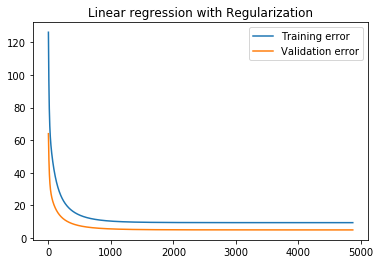

In [71]:
plt.plot([i for i in range(len(train_error_reg))], train_error_reg, label='Training error')
plt.plot([i for i in range(len(valid_error_reg))], valid_error_reg, label='Validation error')
plt.gca().legend(('Training error','Validation error'))
plt.title('Linear regression with Regularization')

In [72]:
theta_reg

array([ 0.0132239 , -0.03554431,  0.09748218,  0.06185791,  0.09848767,
       -0.17191719,  0.33610715,  0.01293424, -0.19695411,  0.29288631,
       -0.2350552 , -0.18483232,  0.11941901, -0.40194242])

In [73]:
pred_y = np.matmul(X[test_set], theta_reg)

In [74]:
print("T and V error: ", train_error_reg[-1], valid_error_reg[-1])

T and V error:  9.480276749318564 5.027730458844879


In [75]:
print("RME on test set: ", np.linalg.norm(pred_y-y[test_set]))

RME on test set:  5.025586626558315
